# EDA Case Study

<b> Authors: Kanishk Mehta, Adnan Ahmed
    </b>


**Email ID's**: kanishkmehta1995@gmail.com , adnanahmed348@gmail.com

The aim of this group case study is to apply EDA in a real business scenario. Besides an understanding of EDA, we shall also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Problem Statement Synthesis

It is hard for the company to give loans to people with no credit history. We work in a consumer finance company which specializes in lending various types of loans to urban customers. We have to analyze patterns in the data. This will ensure that the applicants are capable of repaying the loan are not rejected.

When a loan application is recieved, there are two main risks associated with the bank's decision:



<p> 1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company </p>
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The two scenarios that we are are concerned with are:
<br>1. The client with payment difficulties</br>
<br>2. Paid on Time (named "All other cases")</br>


<br>The four decisions that can be taken by client/ company comprise of the below selection:</br>
    <br><b>Approved:</b> The company has approved the loan application
    <br><b>Cancelled:</b> The client cancelled the loan application sometime during the approval. (Bad pricing or changed their mind)
    <br><b>Refused:</b> The company has refused the loan application
    <br><b>Unused Offer:</b> Loan has been cancelled by the client, but on different stage of progress

### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

### Datasets

<b>application_data.csv:</b> Contains all the information of the client at the time of application.The data is about whether a client has payment difficulties
<b>previous_application.csv:</b> Contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer<br>
<b>columns_description.csv:</b> Data dictionary which describes the meaning of the variables

### Results expected:
Analysis in the form of a presentation<br>
Missing Value Check (with explanation)<br>
Outlier Check (with explanation)<br>
Checking data Imbalance (Imabalance Ratio)<br>
Explain the results of univariate, segmented univariate and bivariate analysis<br>
Find top 10 correlations for Client with payment difficulties and all other cases<br>
Include visualizations (Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases)

### Evalutation Rubrics:
Identify and report the data quality issues (20%)<br>
Interpret variables correctly where required, mention them in the comments or text (20%)<br>
Address data-quality issues appropriately (10%)<br>
Data is in the right format (10%)<br>
String and date manipulation is done correctly (10%)<br>
The right problem is solved (50%)<br>
Univariate and Segmented Univariate analysis is done correctly (Identify 5 important driver variables) (50%)<br>
Business-driven, type-driven and data-driven metrics are created for the important variables and utilised for analysis (50%)<br>
Bivariate analysis is performed correctly and is able to identify the important combinations of driver variables (50%)<br>
The most useful insights are explained correctly in the comments (50%)<br>
The axes and important data points are labelled correctly (50%)<br>
The presentation has a clear structure, is not too long, and explains the most important results concisely (10%)<br>
The recommendations to solve the problems are realistic, actionable and coherent with the analysis (10%)<br>
If any assumptions are made, they are stated clearly (10%)<br>
Custom functions are used to perform repetitive tasks (10%)<br>

<font color= 'purple'>**Import the libraries**</font>


In [1]:
# Import the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import random as rd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticks

#Additional web scrapping libraries
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

%matplotlib inline

In [3]:
# To display the all the columns and get the max rows
pd.set_option('max_rows',None)
pd.set_option('display.max_columns',200)
sns.set_style('whitegrid')

## 1. Understanding the Data

###  <font color= 'purple'>**1.1 Loading the data set**</font>

In [4]:
#Location of the data sets.

path1 = r'C:\Users\Kanishk\Downloads\Work\upgrad\Files\Case Studies or projects\Case study 1\datasets\application_data.csv'

path2 = r'C:\Users\Kanishk\Downloads\Work\upgrad\Files\Case Studies or projects\Case study 1\datasets\previous_application.csv'

#### Applicaiton Dataset

In [5]:
#Loading the Application dataset

app = pd.read_csv(path1)

In [6]:
app.shape

(307511, 122)

In [7]:
# Check the shape of the data sets

print('Shape of the Application dataframe :',app.shape)

Shape of the Application dataframe : (307511, 122)


In [8]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [9]:
# Getting the information about variables and their respective data types.

app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [10]:
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## 2. Data Preparation

### <font color= 'purple'>**2.1 Missing values**</font>

**Strategy  for handling the missing values** : 

>- If the percentage of the missing values are `quite significant` for particular columns then we drop those columns.
>- If the percentage of the missing values are `insignificant` and we want to retain those columns then we can handle the missing values in those columns
>>- To handle those missing values for particular columns different approaches can be taken into account.
>>- Different kinds of columns such as categorical and numerical, moreover handling the two kinds of the columns requires different approaches
>>- To handle the missing data for the categorical column we can use mode if the number of missing values are not significant. If the number of missing values are somewhat significant then a separate category can be created to handle the missing values.
>>- For the Numerical variables mean,median and mode is generally used to impute the values if the missing values are significant in number and if the number of values are not significant we can drop those records/impute them.

#### Application Dataset

In [11]:
# Checking the columns for missing values
app.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [12]:
# Check the number of columns that have missing records
app.isna().sum()[app.isna().sum()>0].count()

67

In [13]:
# Conveting the absolute missing values count of the columns into percentage

missing_values_perc = (app.isna().sum() / app.shape[0])*100

In [14]:
missing_values_perc

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [15]:
cols = missing_values_perc.index.to_list()
vals = missing_values_perc.to_list()
missing = pd.DataFrame({'Columns':cols,'Missing_Perc':vals})
missing.sort_values(by='Missing_Perc')

Columns  Missing_Perc
0                      SK_ID_CURR      0.000000
33        HOUR_APPR_PROCESS_START      0.000000
35     REG_REGION_NOT_WORK_REGION      0.000000
36    LIVE_REGION_NOT_WORK_REGION      0.000000
37         REG_CITY_NOT_LIVE_CITY      0.000000
38         REG_CITY_NOT_WORK_CITY      0.000000
39        LIVE_CITY_NOT_WORK_CITY      0.000000
40              ORGANIZATION_TYPE      0.000000
115              FLAG_DOCUMENT_21      0.000000
114              FLAG_DOCUMENT_20      0.000000
113              FLAG_DOCUMENT_19      0.000000
112              FLAG_DOCUMENT_18      0.000000
111              FLAG_DOCUMENT_17      0.000000
110              FLAG_DOCUMENT_16      0.000000
109              FLAG_DOCUMENT_15      0.000000
108              FLAG_DOCUMENT_14      0.000000
107              FLAG_DOCUMENT_13      0.000000
106              FLAG_DOCUMENT_12      0.000000
105              FLAG_DOCUMENT_11      0.000000
104              FLAG_DOCUMENT_10      0.000000
103               FLAG_DOCUMENT_9      0.000000
102               FLAG_DOCUMENT_8      0.000000
101               FLAG_DOCUMENT_7      0.000000
100               FLAG_DOCUMENT_6      0.000000
99                FLAG_DOCUMENT_5      0.000000
98                FLAG_DOCUMENT_4      0.000000
97                FLAG_DOCUMENT_3      0.000000
96                FLAG_DOCUMENT_2      0.000000
32     WEEKDAY_APPR_PROCESS_START      0.000000
31    REGION_RATING_CLIENT_W_CITY      0.000000
34     REG_REGION_NOT_LIVE_REGION      0.000000
15              NAME_HOUSING_TYPE      0.000000
6                    CNT_CHILDREN      0.000000
12               NAME_INCOME_TYPE      0.000000
13            NAME_EDUCATION_TYPE      0.000000
14             NAME_FAMILY_STATUS      0.000000
30           REGION_RATING_CLIENT      0.000000
16     REGION_POPULATION_RELATIVE      0.000000
17                     DAYS_BIRTH      0.000000
18                  DAYS_EMPLOYED      0.000000
19              DAYS_REGISTRATION      0.000000
20                DAYS_ID_PUBLISH      0.000000
7                AMT_INCOME_TOTAL      0.000000
5                 FLAG_OWN_REALTY      0.000000
3                     CODE_GENDER      0.000000
2              NAME_CONTRACT_TYPE      0.000000
22                     FLAG_MOBIL      0.000000
23                 FLAG_EMP_PHONE      0.000000
24                FLAG_WORK_PHONE      0.000000
25               FLAG_CONT_MOBILE      0.000000
26                     FLAG_PHONE      0.000000
1                          TARGET      0.000000
27                     FLAG_EMAIL      0.000000
4                    FLAG_OWN_CAR      0.000000
8                      AMT_CREDIT      0.000000
95         DAYS_LAST_PHONE_CHANGE      0.000325
29                CNT_FAM_MEMBERS      0.000650
9                     AMT_ANNUITY      0.003902
10                AMT_GOODS_PRICE      0.090403
42                   EXT_SOURCE_2      0.214626
92       DEF_30_CNT_SOCIAL_CIRCLE      0.332021
94       DEF_60_CNT_SOCIAL_CIRCLE      0.332021
93       OBS_60_CNT_SOCIAL_CIRCLE      0.332021
91       OBS_30_CNT_SOCIAL_CIRCLE      0.332021
11                NAME_TYPE_SUITE      0.420148
116    AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
117     AMT_REQ_CREDIT_BUREAU_DAY     13.501631
119     AMT_REQ_CREDIT_BUREAU_MON     13.501631
118    AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
121    AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
120     AMT_REQ_CREDIT_BUREAU_QRT     13.501631
43                   EXT_SOURCE_3     19.825307
28                OCCUPATION_TYPE     31.345545
90            EMERGENCYSTATE_MODE     47.398304
88                 TOTALAREA_MODE     48.268517
60   YEARS_BEGINEXPLUATATION_MODE     48.781019
46    YEARS_BEGINEXPLUATATION_AVG     48.781019
74   YEARS_BEGINEXPLUATATION_MEDI     48.781019
51                  FLOORSMAX_AVG     49.760822
79                 FLOORSMAX_MEDI     49.760822
65                 FLOORSMAX_MODE     49.760822
87                 HOUSETYPE_MODE     50.176091
55                 LIVINGAREA_AVG     50.1

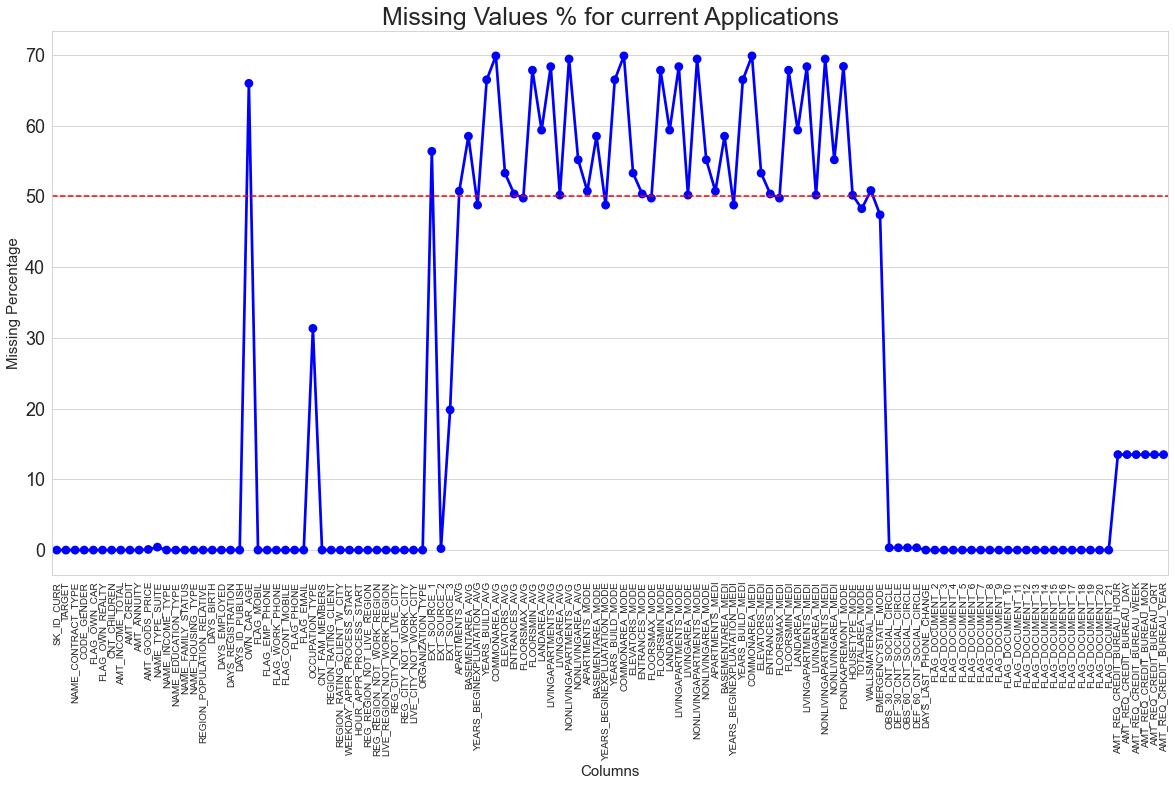

In [16]:
# Plotting missing value percentage for application dataset

fig = plt.figure(figsize=(20,10))

ax = sns.pointplot(data=missing,x='Columns',y='Missing_Perc',color='blue')

ax.axhline(50,color='r',linestyle='--')

plt.xlabel('Columns',fontsize=15)

plt.ylabel('Missing Percentage',fontsize=15)

plt.xticks(rotation=90)

plt.yticks(fontsize=18)

plt.title('Missing Values % for current Applications',fontsize=25)

plt.show()

In [17]:
# Checking the records with more than 40% of the missing values.
missing_more_than_50  =  missing_values_perc[missing_values_perc>=50]
missing_more_than_50

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [18]:
# Getting the names of the column variables which has more than 40% missing values
missing_more_than_50.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [19]:
# Columns which have the significant number of missing records(more likely to be equal or more than 40% ) are to be dropped.
app1  =  app.drop(columns=missing_more_than_50.index)
app1.shape

(307511, 81)

In [20]:
#Drop the columns which are not required

app1 = app1.drop(columns=['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
       'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2',
       'EXT_SOURCE_3','REGION_RATING_CLIENT_W_CITY','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI',
       'FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE'])

In [21]:
app1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

<font color='purple'>**Comment :**</font> The above are the columns which will be further used for data analysis. 

In [22]:
# Again to check the percentage of the missing values to handle them differently

(app1.isnull().sum()[app1.isnull().sum()>0] / app1.shape[0])*100

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [23]:
app1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120        Laborers              1.0                     2   
1             -291      Core staff              2.0                     1   
2            -2531        Laborers              1.0                     2   
3            -2437        Laborers              2.0                     2   
4            -3458      Core staff              1.0                     2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY                       10  Business Entity Type 3   
1                     MONDAY                       11                  School   
2                     MONDAY                        9              Government   
3                  WEDNESDAY                       17  Business Entity Type 3   
4                   THURSDAY                       11                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0     

**Amount Annuity Variable**

In [24]:
app1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<font color='purple'>**Comment :**</font> Since the number of missing values in the AMT_ANNUITY column are very less so we can go on and impute the missing data with the mean value but since the max value is very high, imputing the data with median values will be a better approach

**Goods Price Variable** 

In [25]:
app1.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<font color='purple'>**Comment :**</font> For AMT_GOODS_PRICE column it will be better if median is used because the column has the high values as the price can differ from product to product so imputing the missing values with median will be a better approach.

**NAME_TYPE_SUITE Variable**

In [26]:
# Check the NAME_TYPE_SUITE variable

app1.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [27]:
app1.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

<font color='purple'>**Comment**</font> : 'Unaccompained' holds approx 81% of the total values so imputing the missing values with the mode value will be a suitable approach.

**OCCUPATION_TYPE Variable**

In [28]:
# Check the OCCUPATION_TYPE variable

app1.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [29]:
# Checking the percentage of the missing data for OCCUPATION_TYPE variable
(app1.OCCUPATION_TYPE.isna().sum() / app1.shape[0])*100

31.345545362604916

<font color='purple'>**Comment** </font> : In the Occupation Type Variable there are approximately 31% of the missing values so imputing these values with the mode will not be a good idea. Since the percentage of the missing values are high, the missing data can be imputed by creating another category by the name 'Other'.

**CNT_FAM_MEMBERS variable**

In [30]:
app1.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

<font color='purple'>**Comment :**</font> For CNT_FAM_MEMBERS we cannot use the mean here for this one thus we impute the missing values with 0.0 as the values are missing at random.

**SK_ID_CURR Variable**

In [31]:
# To check client ID for duplicate values

app1.SK_ID_CURR.nunique()

307511

In [32]:
# Again checking the summary statistics for the numerical columns
app1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000    307509.000000   
mean        -4986.120328     -2994.202373         2.152665   
std          3522.886321      1509.450419         0.910682   
min        -24672.000000     -7197.000000         1.000000   
25%         -7479.500000     -4299.000000         2.000000   
50%         -4504.000000     -3254.000000         2.000000   
75%         -2010.000000     -1720.000000         3.000000   
max             0.000000         0.000000        20.000000   

       REGION_RATING_CLIENT  HOUR_APPR_PROCESS_START  \
count         307511.000000            307511.000000   
mean               2.052463                12.063419   
std                0.509034                 3.265832   
min                1.000000                 0.000000   
25%                2.000000                10.000000   
50%                2.000000                12.000000   
75%                2.000000                14.000000   
max                3.000000                23.000000   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.405292                  0.100049   
std                    2.379803                  0.362291   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000

<font color='purple'>**Comment :**</font> While looking at the summary statistics for the numerical columns, it can be seen that there are few columns with the negative values. It would be better if these values are converted to the positive so that it would not affect the analysis. 

### <font color='purple'>**2.2 Checking the Data Types**</font>

In [33]:
app1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [34]:
app1['DAYS_REGISTRATION'] = app1['DAYS_REGISTRATION'].astype('int64')

In [35]:
app1['AMT_REQ_CREDIT_BUREAU_YEAR'] =app1['AMT_REQ_CREDIT_BUREAU_YEAR'].astype('Int64') 
app1['AMT_REQ_CREDIT_BUREAU_QRT'] =app1['AMT_REQ_CREDIT_BUREAU_QRT'].astype('Int64') 
app1['AMT_REQ_CREDIT_BUREAU_WEEK'] =app1['AMT_REQ_CREDIT_BUREAU_WEEK'].astype('Int64') 
app1['AMT_REQ_CREDIT_BUREAU_MON'] =app1['AMT_REQ_CREDIT_BUREAU_MON'].astype('Int64') 
app1['AMT_REQ_CREDIT_BUREAU_DAY'] =app1['AMT_REQ_CREDIT_BUREAU_DAY'].astype('Int64') 
app1['AMT_REQ_CREDIT_BUREAU_HOUR'] =app1['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('Int64') 

In [36]:
app1['DEF_60_CNT_SOCIAL_CIRCLE'] =app1['DEF_60_CNT_SOCIAL_CIRCLE'].astype('Int64') 
app1['OBS_60_CNT_SOCIAL_CIRCLE'] =app1['OBS_60_CNT_SOCIAL_CIRCLE'].astype('Int64') 
app1['DEF_30_CNT_SOCIAL_CIRCLE'] =app1['DEF_30_CNT_SOCIAL_CIRCLE'].astype('Int64') 
app1['OBS_30_CNT_SOCIAL_CIRCLE'] =app1['OBS_30_CNT_SOCIAL_CIRCLE'].astype('Int64')  

In [37]:
app1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

<font color='purple'> **Comment** </font> : 
> 1. Some columns such as SOCIAL_CIRCLE type, AMT_REQ_CREDIT type, CNT_FAM_MEMBERS are having float datatype instead of integer datatype because of the missing values present in these columns so they can be converted to integer data type.

> 2. DAYS_REGISTRATION column is in float format instead of integer format so converting it into integer as it has no missing values. Rest all the numeric columns are correctly divided into integer and float.

### <font color='purple'>**2.2.1 Standardizing the values for Application Dataframe**</font>

**DAYS_BIRTH**

In [38]:
# Convert the Days_Birth column

app1.DAYS_BIRTH = app1.DAYS_BIRTH.abs()

**DAYS_EMPLOYED**

In [39]:
# Convert the DAYS_EMPLOYED column

app1.DAYS_EMPLOYED = app1.DAYS_EMPLOYED.abs()

**DAYS_REGISTRATION**

In [40]:
# Convert the DAYS_REGISTRATION column

app1.DAYS_REGISTRATION = app1.DAYS_REGISTRATION.abs()

**DAYS_ID_PUBLISH**

In [41]:
# Convert the DAYS_ID_PUBLISH column

app1.DAYS_ID_PUBLISH = app1.DAYS_ID_PUBLISH.abs()

**DAYS_BIRTH**

In [42]:
# Now to see if we can calculate the age of the client 

app1['Age_Range'] = (app1.DAYS_BIRTH / 365).round(2)
app1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY                       10  Business Entity Type 3   
1                     MONDAY                       11                  School   
2                     MONDAY                        9              Government   
3                  WEDNESDAY                       17  Business Entity Type 3   
4                   THURSDAY                       11                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         0                         0   
3                         2                         0   
4                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         0                         0   
3                         2                         0   
4                         0                         0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1                           0                          0   
2                           0     

<font color='purple'>**Comment :**</font> Since the client's ages are more of the float values so categorizing them by following binning method can help in further analysis.

In [43]:
# Taking the bins and the labels
bins = [0,30,40,50,60,100]
labels = ['<30','30-40','40-50','50-60','60+']

In [44]:
# Binnig the age column
app1['AGE_RANGE'] = pd.cut(app1.Age_Range,bins=bins,labels=labels)

In [45]:
# Removing Age_Range column after making bins out of it
app1.drop(columns='Age_Range',inplace=True)

**CODE_GENDER Column**

In [46]:
# Checking the Gender Column
app1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [47]:
app1.CODE_GENDER.replace('XNA',np.nan,inplace=True)

<font color='purple'>**Comment**</font> : Gender Column has 4 'XNA' values which are most probably the missing values and are less in number when compared to the other values. Hence, these values can be replaced and since the count of female values is the highest for gender column so 'XNA' can be replaced with 'Female'.

**ORGANIZATION_TYPE Variable**

In [48]:
app1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

<font color='purple'>**Comment**</font> : For ORGANIZATION_TYPE column there are 'XNA' values and 'other' column is also present, thus we can say that these XNA values are most probably the missing values. Moreover, these values are quite high, hence mode cannot be used here. The other way we can deal with these values is to either impute them with 'Unkown' category or we can ignore it while doing analysis.

### <font color= 'purple'>**2.3 Outlier Detection and Treatment**</font> 

In [49]:
# Setting the seaborn style
sns.set_style('white')

In [50]:
app1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000    307509.000000   
mean         4986.120327      2994.202373         2.152665   
std          3522.886321      1509.450419         0.910682   
min             0.000000         0.000000         1.000000   
25%          2010.000000      1720.000000         2.000000   
50%          4504.000000      3254.000000         2.000000   
75%          7479.500000      4299.000000         3.000000   
max         24672.000000      7197.000000        20.000000   

       REGION_RATING_CLIENT  HOUR_APPR_PROCESS_START  \
count         307511.000000            307511.000000   
mean               2.052463                12.063419   
std                0.509034                 3.265832   
min                1.000000                 0.000000   
25%                2.000000                10.000000   
50%                2.000000                12.000000   
75%                2.000000                14.000000   
max                3.000000                23.000000   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.405292                  0.100049   
std                    2.379803                  0.362291   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000

**AMT_INCOME_TOTAL Variable**

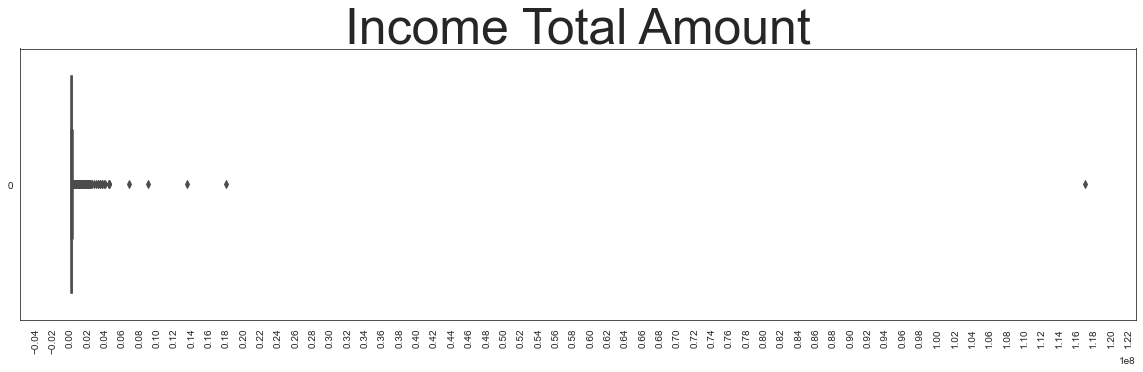

In [51]:
fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(data=app1.AMT_INCOME_TOTAL,orient='h',color='r')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticks.MultipleLocator(2000000))
ax.set_title('Income Total Amount',fontsize=50)
plt.xticks(rotation=90)
plt.show()

In [52]:
app1.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<font color='purple'>**Comment :**</font>As the max value is 1.17 X 10^8 which is infact a very high value but this is a valid value as income can vary from people to people. Hence, deleting the values can be an option but another better approach is to bin the values into categories then there it will be covered.

In [53]:
app1.AMT_INCOME_TOTAL.quantile([0.33,.34,.66,0.90,0.92,0.94,0.95,0.96,0.98,0.99,1])

0.33       117000.0
0.34       121500.0
0.66       180000.0
0.90       270000.0
0.92       292500.0
0.94       315000.0
0.95       337500.0
0.96       360000.0
0.98       427500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
bins = [0, 100000, 200000, 300000, 400000,200000000]
labels = ['Very Low','Low','Medium','High','Very High']

In [55]:
app1['INCOME_RANGE'] = pd.cut(app1.AMT_INCOME_TOTAL,bins=bins,labels=labels)

**AMT_ANNUITY Variable**

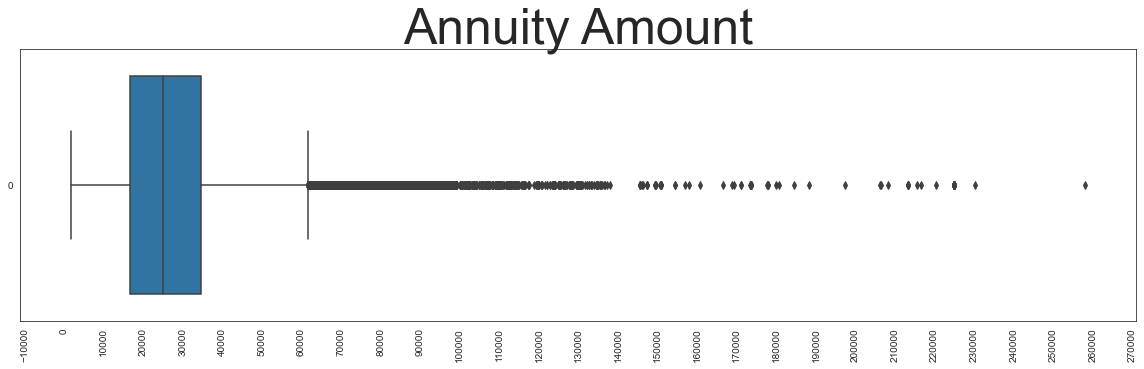

In [56]:
# Checking the AMT_ANNUITY variable

fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(data=app1.AMT_ANNUITY,orient='h')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticks.MultipleLocator(10000))
ax.set_title('Annuity Amount',fontsize=50)
plt.xticks(rotation=90)
plt.show()

In [57]:
app1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<font color='purple'>**Comment**</font>: There are outliers in the column AMT_ANNUITY so by taking bins the values can be a good approach to handle them.

In [58]:
app1['AMT_ANNUITY'].quantile([0.33,0.66,0.9,0.92,0.94,0.95,0.96,0.98,0.99,1.0])

0.33     19417.5
0.66     30483.0
0.90     45954.0
0.92     48465.0
0.94     51745.5
0.95     53325.0
0.96     55624.5
0.98     62964.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [59]:
# Setting up bins and labels for AMT_ANNUITY

bins = [0,10000,20000,30000,40000,500000]
labels = ['Very Low','Low','Medium','High','Very High']

app1['ANNUITY_RANGE'] = pd.cut(app1['AMT_ANNUITY'],bins=bins,labels=labels)

**AMT_GOODS_PRICE Variable**

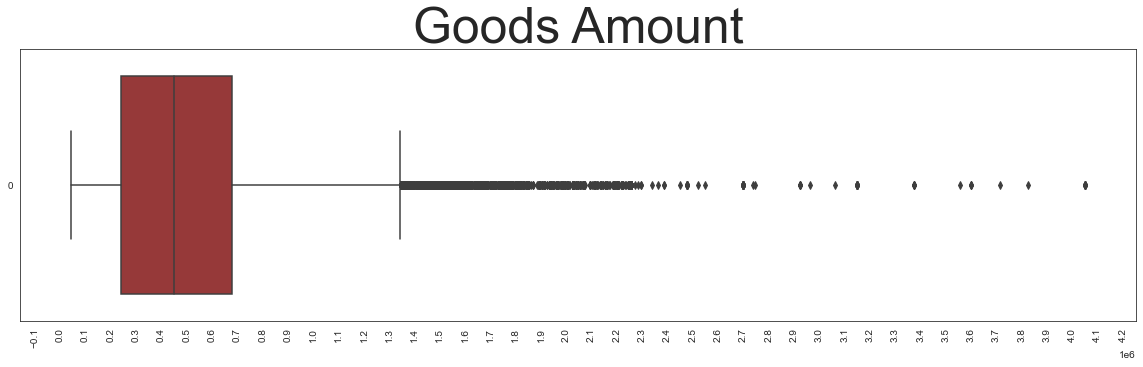

In [60]:
fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(data=app1.AMT_GOODS_PRICE,orient='h',color='brown')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticks.MultipleLocator(100000))
ax.set_title('Goods Amount',fontsize=50)
plt.xticks(rotation = 90)
plt.show()

In [61]:
app1.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [62]:
app1.AMT_GOODS_PRICE.quantile([0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.98,0.99,1])

0.75     679500.0
0.80     814500.0
0.85     900000.0
0.90    1093500.0
0.95    1305000.0
0.96    1350000.0
0.97    1354500.0
0.98    1575000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

<font color='purple'>**Comment**</font> : In the Goods Price column there are outliers present but these prices can vary from product to product. So, no action will be taken on this variable

**AMT_CREDIT Variable**

In [63]:
app1.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

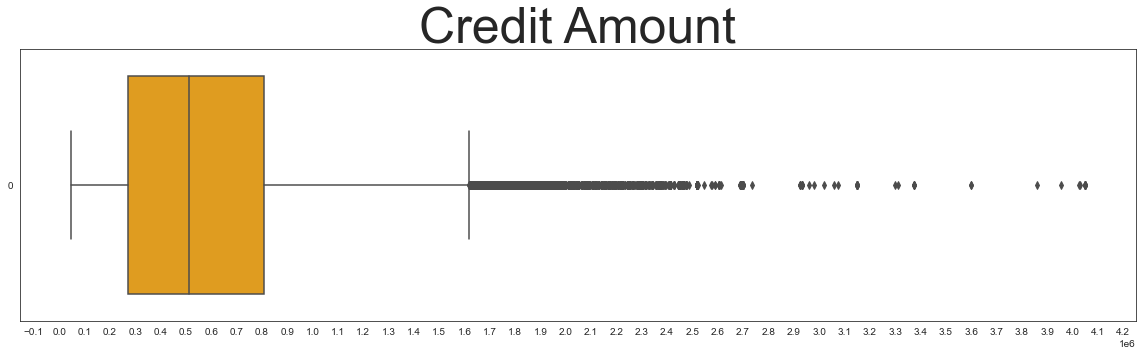

In [64]:
fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(data=app1.AMT_CREDIT,orient='h',color='orange')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticks.MultipleLocator(100000))
ax.set_title('Credit Amount',fontsize=50)
plt.show()

In [65]:
app1.AMT_CREDIT.quantile([0.20,.33,.66,.90,.92,.94,.95,.96,.98,.99,1])

0.20     254700.0
0.33     331920.0
0.66     675000.0
0.90    1133748.0
0.92    1255680.0
0.94    1305000.0
0.95    1350000.0
0.96    1436850.0
0.98    1661418.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

<font color='purple'> **Comment** </font> : There are outliers after the 99 percentile values i.e 1.8 x 10^6 and it can be seen these outliers are in chunk thus we want to retain then as well, so binning them will be a good option here.

In [66]:
# Creating bins and labels for AMT_CREDIT column
bins = [0,300000,600000,900000,1200000,5000000]
labels = ['Very Low','Low','Medium','High','Very High']

In [67]:
# Binning the AMT_CREDIT column
app1['CREDIT_RANGE'] = pd.cut(x=app1.AMT_CREDIT,bins=bins,labels=labels)

In [68]:
app1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY                       10  Business Entity Type 3   
1                     MONDAY                       11                  School   
2                     MONDAY                        9              Government   
3                  WEDNESDAY                       17  Business Entity Type 3   
4                   THURSDAY                       11                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         0                         0   
3                         2                         0   
4                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         0                         0   
3                         2                         0   
4                         0                         0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1                           0                          0   
2                           0     

**DAYS_BIRTH Variable**

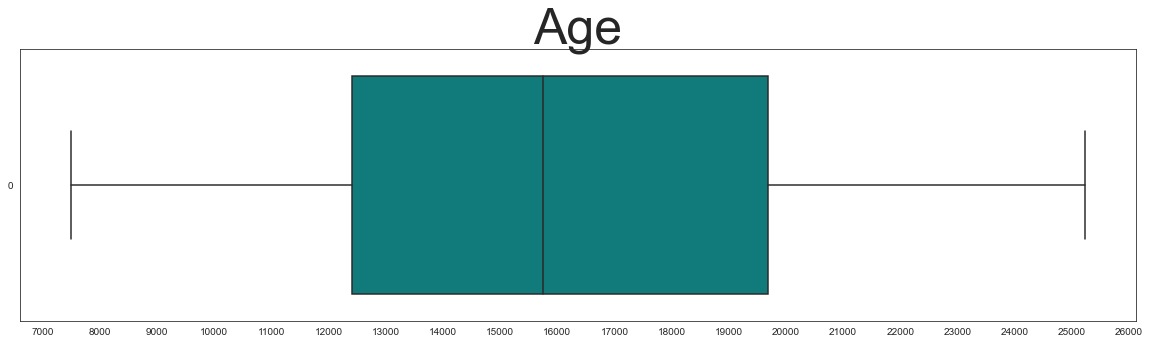

In [69]:
fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(data=app1.DAYS_BIRTH,orient='h',color='darkcyan')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticks.MultipleLocator(1000))
ax.set_title('Age',fontsize=50)
plt.show()

<font color='purple'>**Comment :**</font> By plotting the box plot for the client's Age column, it was found that there are no outliers in the DAYS_BIRTH column.

**DAYS_EMPLOYED Variable**

In [70]:
app1.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

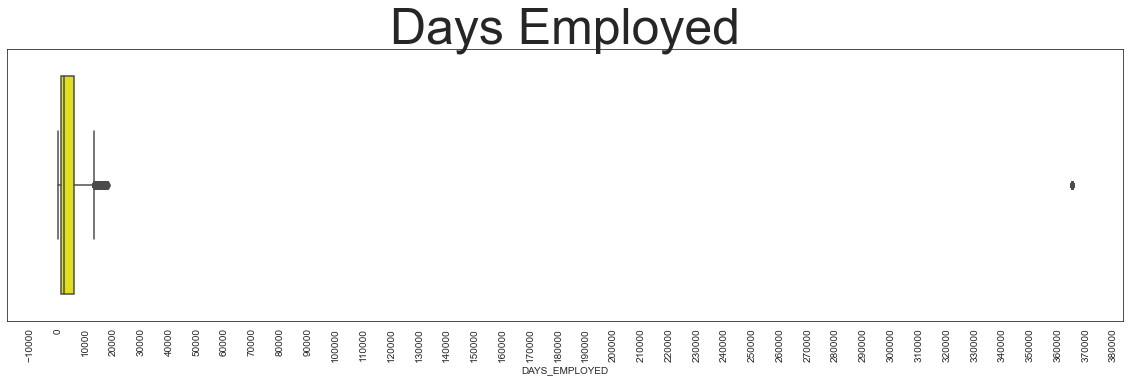

In [71]:
fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(app1.DAYS_EMPLOYED,orient='h',color='yellow')
ax.set_title('Days Employed',fontsize=50)
ax.xaxis.set_major_locator(ticks.MultipleLocator(10000))
plt.xticks(rotation=90)
plt.show()

In [72]:
years = 365243 / 365
years

1000.6657534246575

In [73]:
app1['DAYS_EMPLOYED'].quantile([.8,0.82,0.95,0.98,0.99,1.0])

0.80      9188.0
0.82    365243.0
0.95    365243.0
0.98    365243.0
0.99    365243.0
1.00    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [74]:
app1['DAYS_EMPLOYED'].value_counts().sort_index().tail(5)

17531         1
17546         1
17583         1
17912         1
365243    55374
Name: DAYS_EMPLOYED, dtype: int64

<font color='purple'> **Comment** </font>: For the Days Employed column, some records are having the value as 365243 which is not a possible value as in years it is nearly 1000 years, hence it is an invalid value. A better approach to handle these records is to replace these values with a near high value to last lowest percentile value like 20000 as last highest value is 17912.

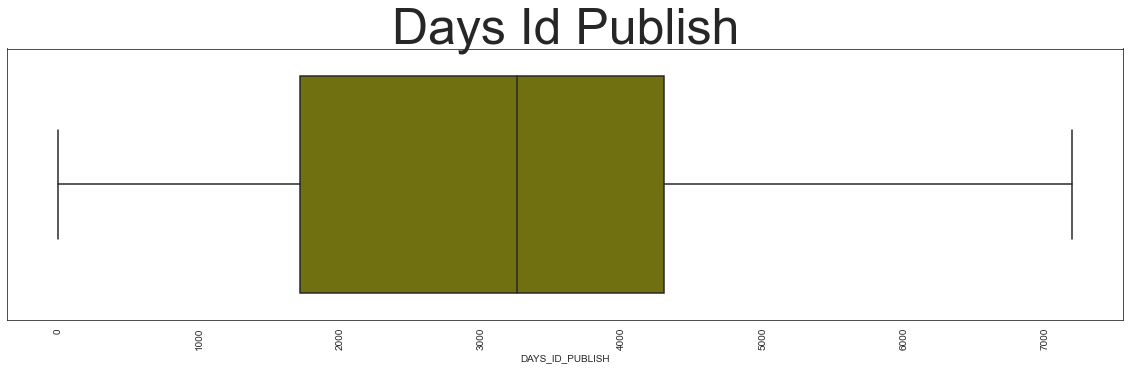

In [75]:
fig = plt.figure(figsize=(20,5))

ax = sns.boxplot(app1.DAYS_ID_PUBLISH,orient='h',color='olive')

ax.set_title('Days Id Publish',fontsize=50)

ax.xaxis.set_major_locator(ticks.MultipleLocator(1000))

plt.xticks(rotation=90)

plt.show()

<font color='purple'>**Comment**</font> : There are no outliers in the DAYS_ID_PUBLISH column so we can leave it as it is.

**SOCIAL_CIRCLE Variables**

In [76]:
app1.describe().loc[:,'OBS_30_CNT_SOCIAL_CIRCLE':'DEF_60_CNT_SOCIAL_CIRCLE']

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.405292                  0.100049  
std                    2.379803                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

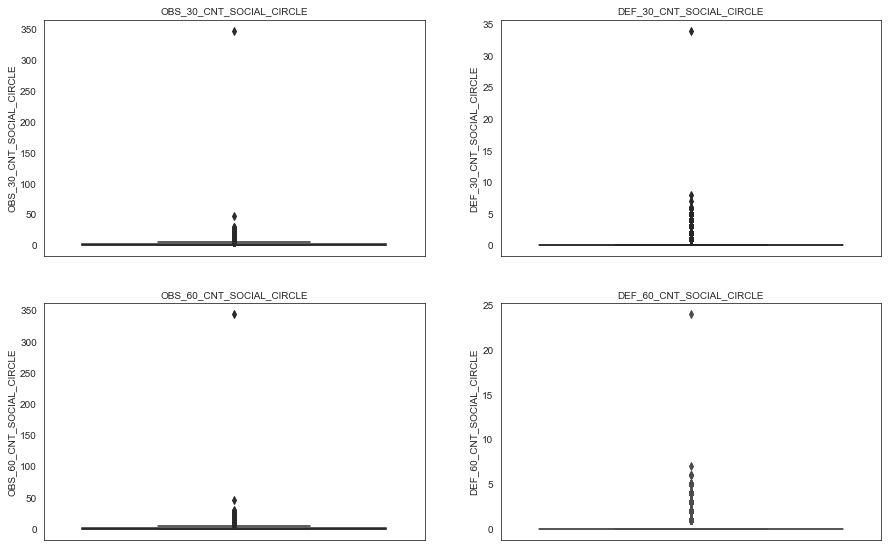

In [77]:
# Checking for the SOCIAL CIRCLE columns 

l=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
color=['red','yellow','black','blue','darkcyan','orange','green','olive','brown']

fig=plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace = .2, wspace=.2)

for i in enumerate(l):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(y=app1[i[1]],color=rd.choice(color))
    plt.title(i[1],fontsize=10)
plt.show()

In [78]:
app1[app1.DEF_60_CNT_SOCIAL_CIRCLE==24]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
148403      272071       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
148403               Y             0          202500.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
148403       9000.0         180000.0          Family    State servant   

       NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
148403    Higher education  Single / not married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
148403                    0.020246       10111           1917   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
148403               2306             2306      Core staff              1.0   

        REGION_RATING_CLIENT WEEKDAY_APPR_PROCESS_START  \
148403                     3                   THURSDAY   

        HOUR_APPR_PROCESS_START ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  \
148403                        9            Police                       348   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
148403                        34                       344   

        DEF_60_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_HOUR  \
148403                        24                           0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
148403                          0                           1   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
148403                          1                          0   

        AMT_REQ_CREDIT_BUREAU_YEAR AGE_RANGE INCOME_RANGE ANNUITY_RANGE  \
148403                           3       <30       Medium      Very Low   

       CREDIT_RANGE  
148403     Very Low

<font color='purple'>**Comment :**</font> The Social Circle columns have only one huge outlier and the entry index of that record is 148403. Since there exists only one record having the invalid value so we can drop this record.

## 3. ANALYSIS : Application Dataframe

### <font color='purple'>3.1 Data Imbalance Check</font>

In [2]:
# Checking the TARGET column for imbalance data in percentage
app1.TARGET.value_counts(normalize=True)*100

NameError: name 'app1' is not defined

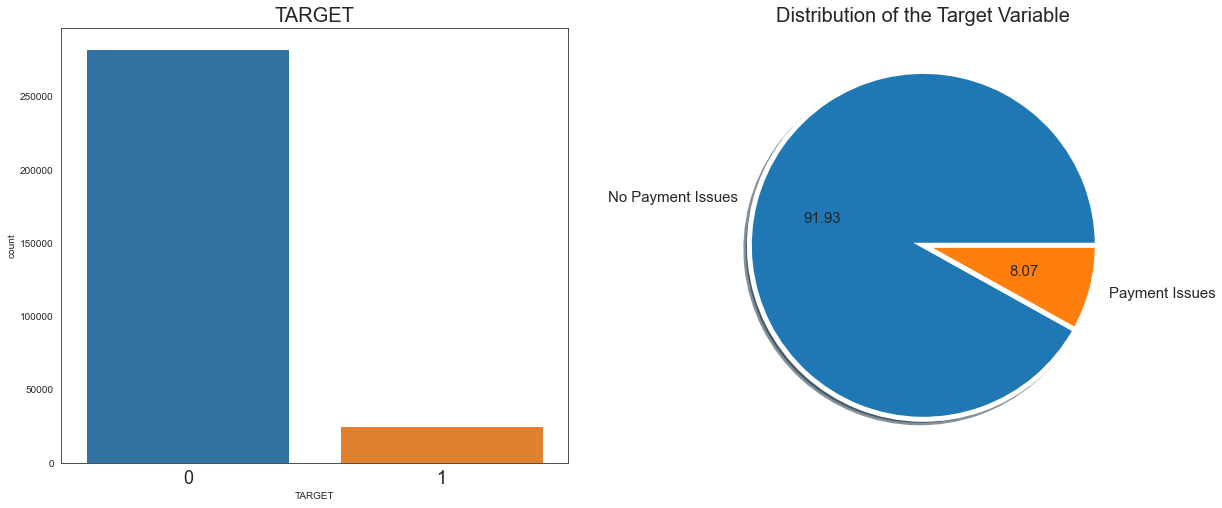

In [80]:
# Plotting the graphs

fig, (ax1,ax2) = plt.subplots(1,2,figsize =(20,8))

ax = sns.countplot(app1.TARGET,ax=ax1)

ax1.set_title('TARGET',fontsize=20)

plt.setp(ax1.xaxis.get_majorticklabels(),fontsize=18)

ax2 = plt.pie(x=app1.TARGET.value_counts(normalize=True),autopct='%.2f',textprops={'fontsize':15},shadow=True,labels=['No Payment Issues','Payment Issues'],wedgeprops = {'linewidth': 5}) 

plt.title('Distribution of the Target Variable',fontsize=20)

plt.show()

In [81]:
# Check the Imbalance Percentage

print('Imbalance Percentage is : %.2f'%(app1.TARGET.value_counts(normalize=True)[0]/app1.TARGET.value_counts(normalize=True)[1]))

Imbalance Percentage is : 11.39


<font color='purple'>**Comment**</font>: It can be seen from the TARGET column that 91.93% of the people have no payment issues and on the other hand 8.07% people are having payment difficulties. The imbalance percentage for the target variable is 11.39%.

In [82]:
app1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY                       10  Business Entity Type 3   
1                     MONDAY                       11                  School   
2                     MONDAY                        9              Government   
3                  WEDNESDAY                       17  Business Entity Type 3   
4                   THURSDAY                       11                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         0                         0   
3                         2                         0   
4                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         0                         0   
3                         2                         0   
4                         0                         0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1                           0                          0   
2                           0     

### <font color='purple'>**3.2 Categorical Variables**</font>

In [83]:
# Setting the style for the plots
sns.set_style(style = 'whitegrid',rc={"grid.linewidth": 5})

In [84]:
app1.nunique().sort_values()

TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
REGION_RATING_CLIENT               3
CREDIT_RANGE                       5
AMT_REQ_CREDIT_BUREAU_HOUR         5
ANNUITY_RANGE                      5
NAME_EDUCATION_TYPE                5
AGE_RANGE                          5
INCOME_RANGE                       5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_MON         24
A

<font color='purple'>**Comment**</font>: By checking the unique value count for each column, we can distinguish between categorical and numerical variables from the application dataset. We can say that the values less than 40 are categorical columns and values more than 40 are basically the continous variables.


In [85]:
# Function for univariate analysis
def plots(l,rows=1,cols=1,rot=90):
        
    if cols>1:
        fig, (ax1,ax2) = plt.subplots(nrows=rows,ncols=cols,figsize=(30,10))
        fig.subplots_adjust(hspace = .2, wspace=.2)
    
    else:
        fig, (ax1,ax2) = plt.subplots(nrows=rows,ncols=cols,figsize=(30,30))
        fig.subplots_adjust(hspace = .5, wspace=.1)
    
    
    # Subplot 1 : countplot 
    first = sns.countplot(data = app1 , hue = 'TARGET', palette='inferno',x=l,ax=ax1)
    first.set_title(l,fontsize=30)
    first.set_yscale('log')
    first.legend(labels=['Loan Repayers','Loan Defaulters'],fontsize=20)
    plt.setp(first.xaxis.get_majorticklabels(), rotation=rot,fontsize=25)
    plt.setp(first.yaxis.get_majorticklabels(),fontsize=18)


    # Percentage of the mean values for defaulters
    default_percentage = (app1.groupby(by=l)['TARGET'].mean()*100).sort_values()
    
    # Subplot 2 : barplot
    sec = sns.barplot(x=default_percentage.index,y=default_percentage,ax=ax2)
    sec.set_title(f'Default % in {l}',fontsize=30)
    sec.set_yscale('linear')
    plt.setp(sec.xaxis.get_majorticklabels(), rotation=rot,fontsize=25)
    plt.setp(sec.yaxis.get_majorticklabels(),fontsize=18)
    return None


### 3.2.1 Categorical Ordered Variables

The categorical Ordered columns are as follows :

1. NAME_EDUCATION_TYPE
2. CREDIT_RANGE
3. INCOME_RANGE
4. ANNUITY_RANGE

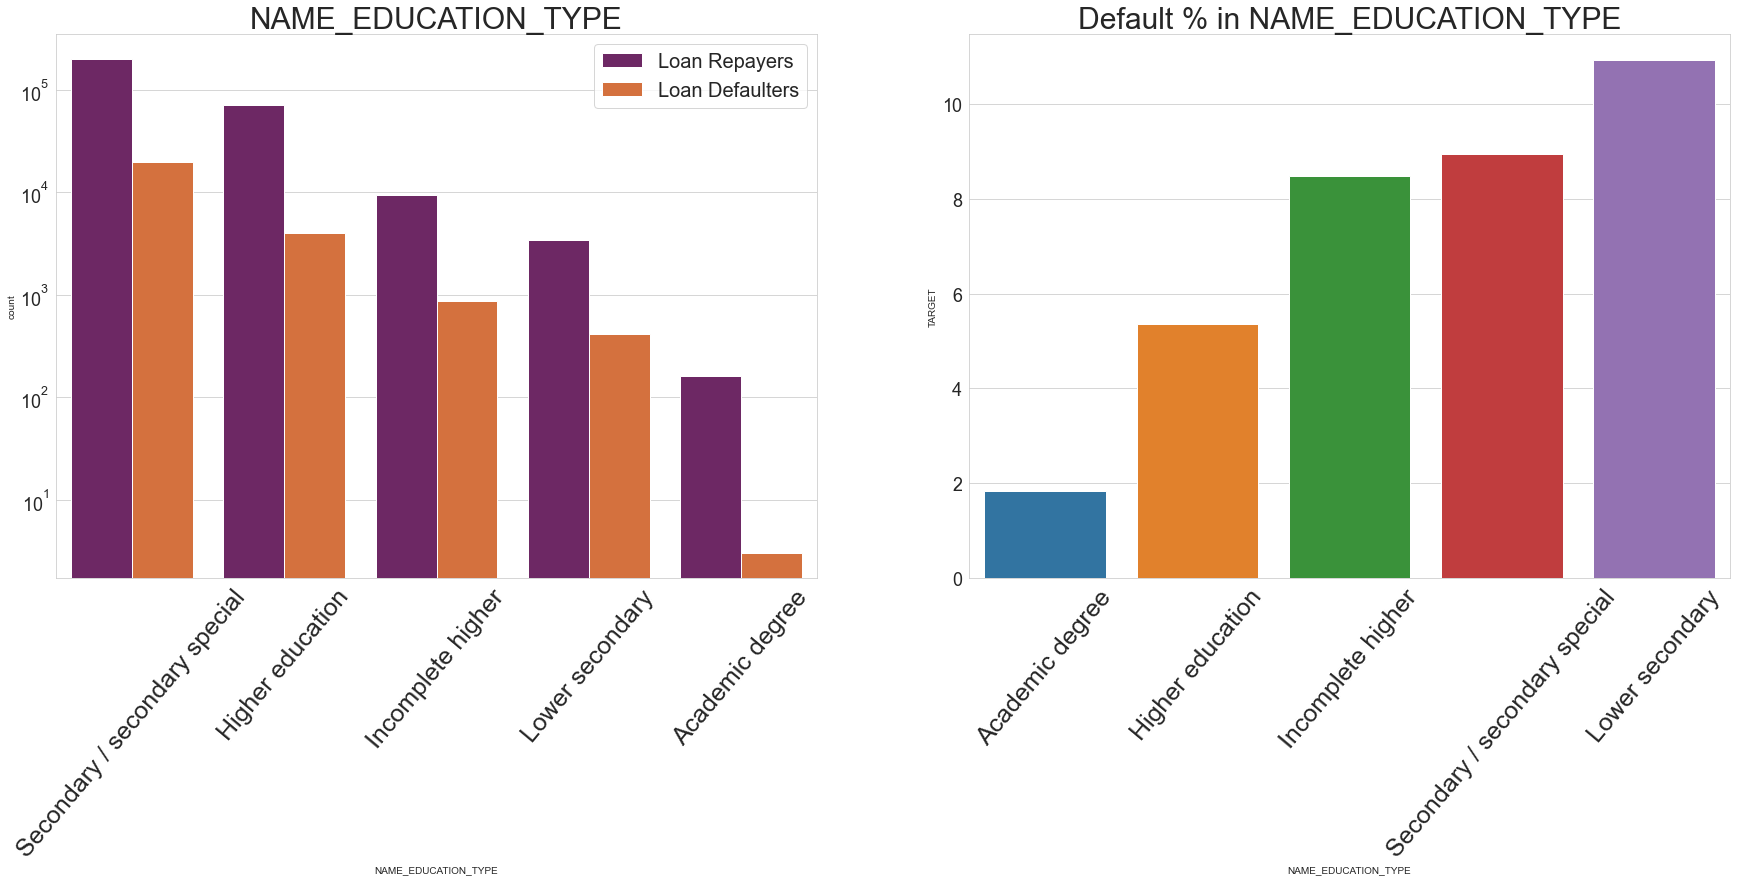

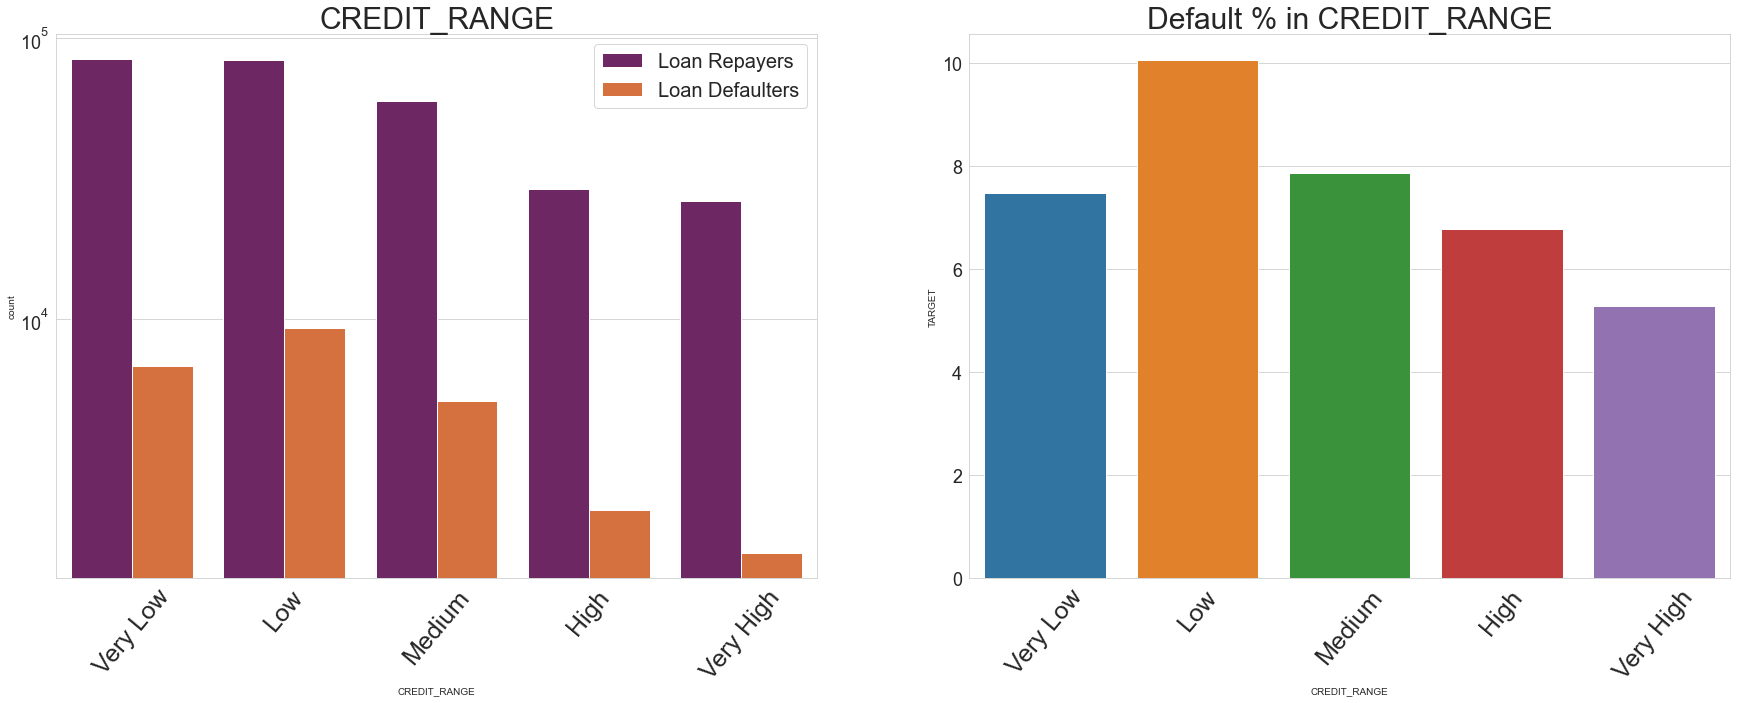

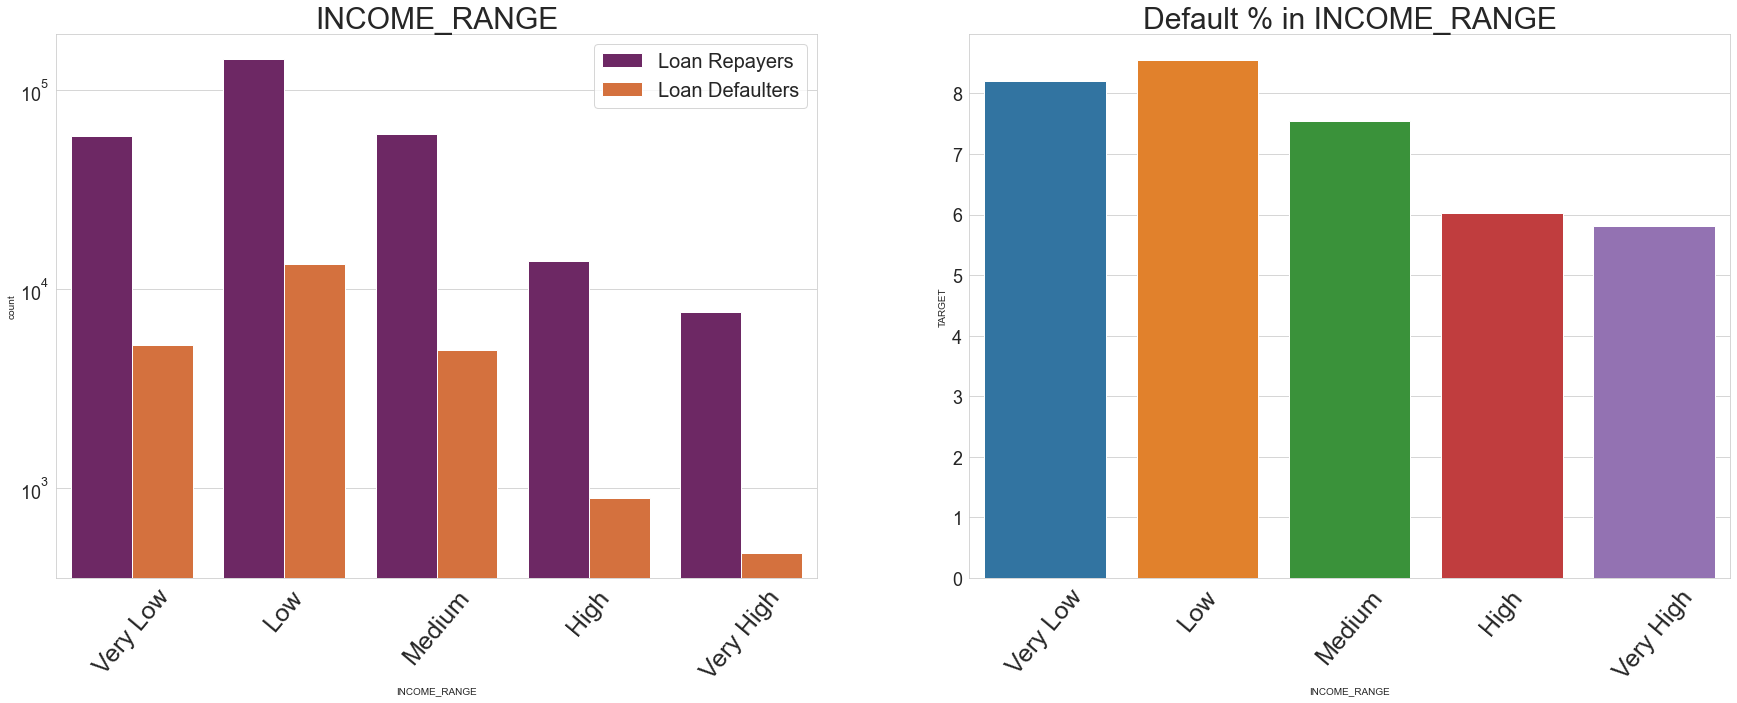

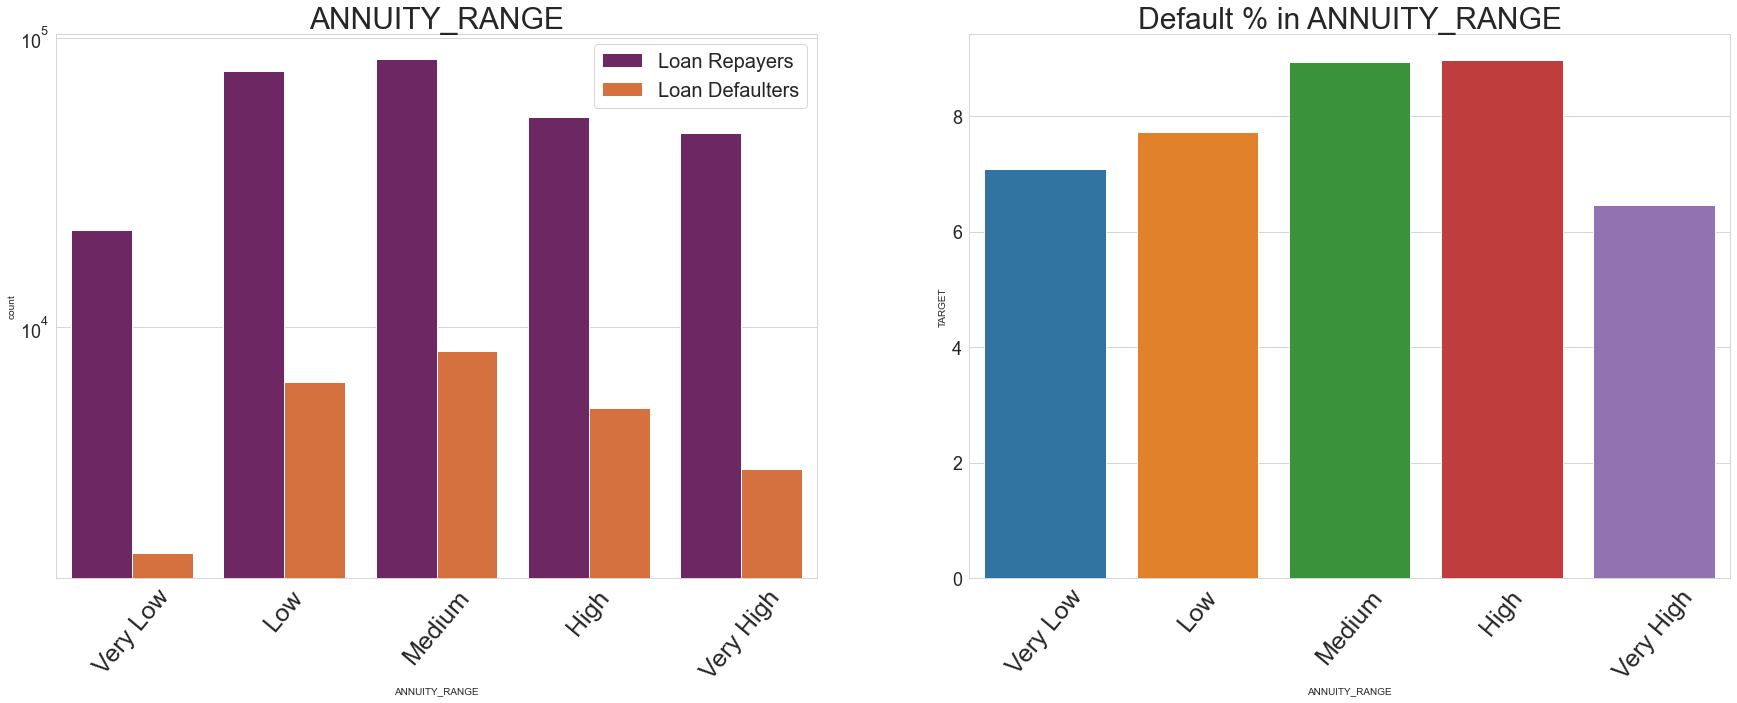

In [86]:
list_Cat_num = ['NAME_EDUCATION_TYPE','CREDIT_RANGE','INCOME_RANGE','ANNUITY_RANGE']

for i in list_Cat_num:
    plots(i,1,2,rot=50)

### <font color='purple'>**Comments**</font> :

> 1. When we talk about the clients with respect to their Education type, those clients that have education status as secondary/ special secondary are approaching more for the loans while clients with education status as lower secondary are most at default. There is another category of incomplete higher which can also be considered for the loans.

> 2. For the CREDIT_RANGE variable, clients having the very low and low credit amounts are taking the most loans and on the other hand clients with low credit amounts are generally likely to default more so bank should consider them less while giving out the loans. Bank should focus more on the clients who have taken very high credit amounts.

> 3. As it can be seen from the graphs, income ranges from very low to meduim has the highest number of applications but it is adviced to focus more on the clients with atleast medium ranged income values or greater than medium values.

> 4. For AMT_ANNUITY column, most of the applications are from the low or medium ranged AMT_ANNUITY values but on the other hand, medium ranged values should be considered less for loan approval as they are highly at default. So, bank should consider low or very high ranged AMT_ANNUITY valued customers for loans.


### 3.2.2 Categorical Unordered Variables

The unordered categorical columns are as follows :

1. AGE_RANGE
2. REGION_RATING_CLIENT
3. CNT_FAM_MEMBERS
4. CNT_CHILDREN
5. FLAG_OWN_CAR
6. FLAG_OWN_REALTY
7. CODE_GENDER
8. NAME_CONTRACT_TYPE
9. NAME_INCOME_TYPE
10. NAME_FAMILY_STATUS
11. NAME_HOUSING_TYPE
12. OCCUPATION_TYPE

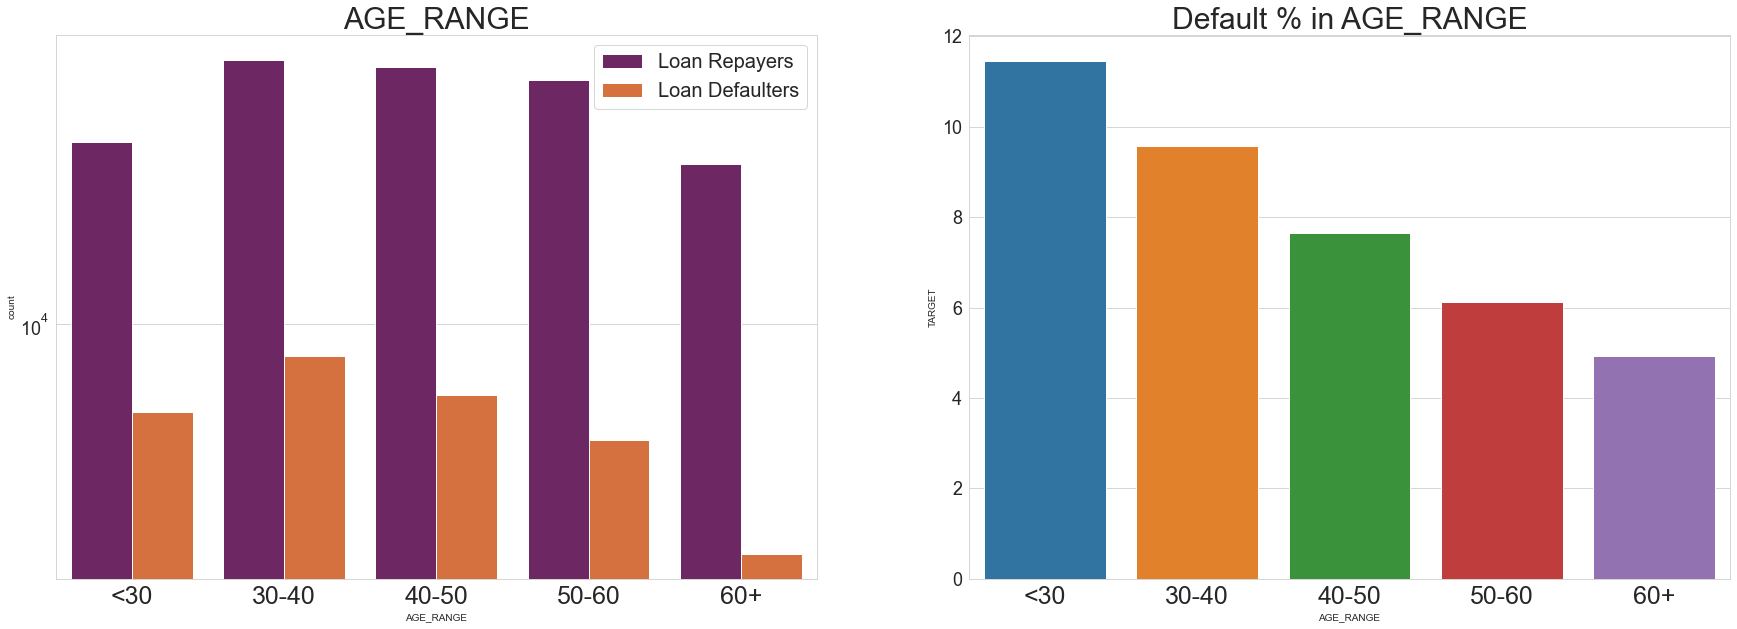

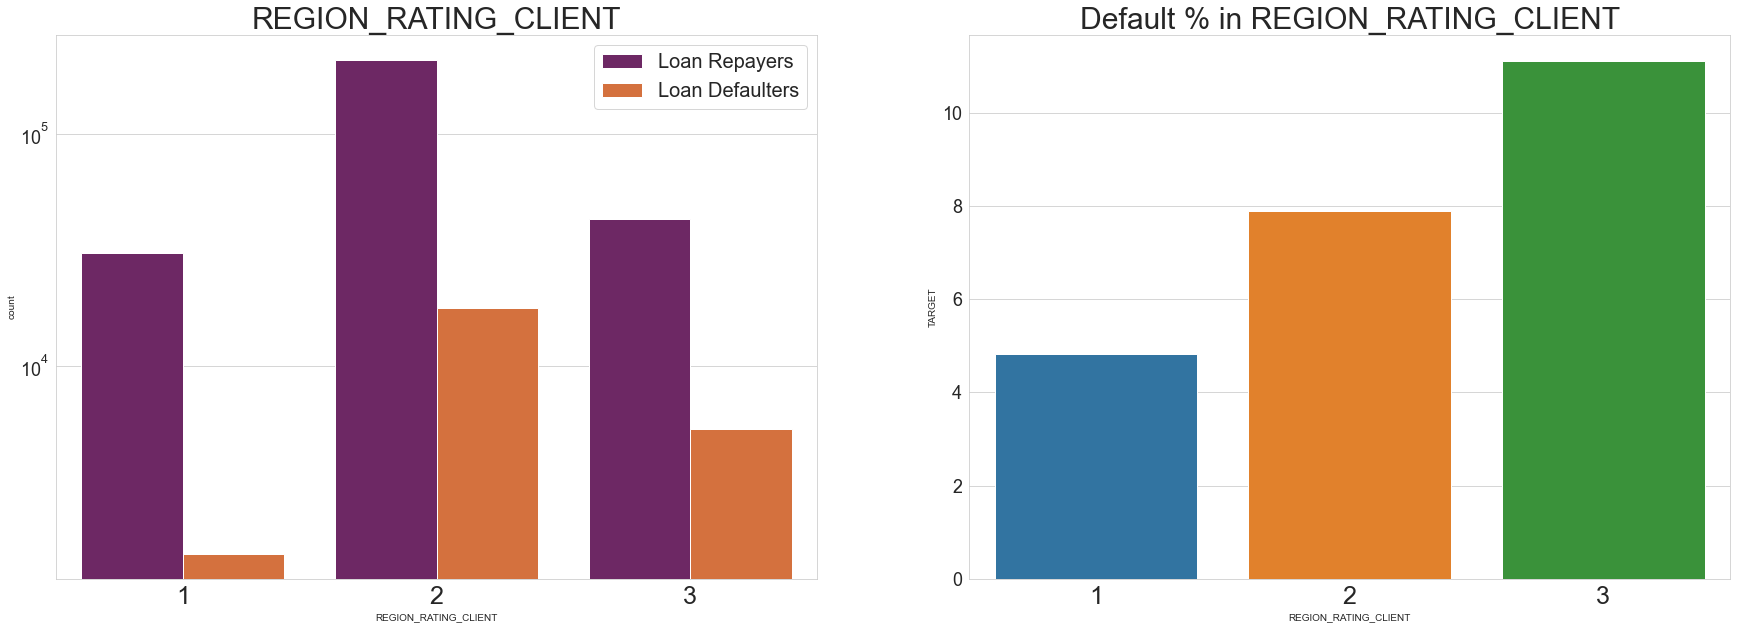

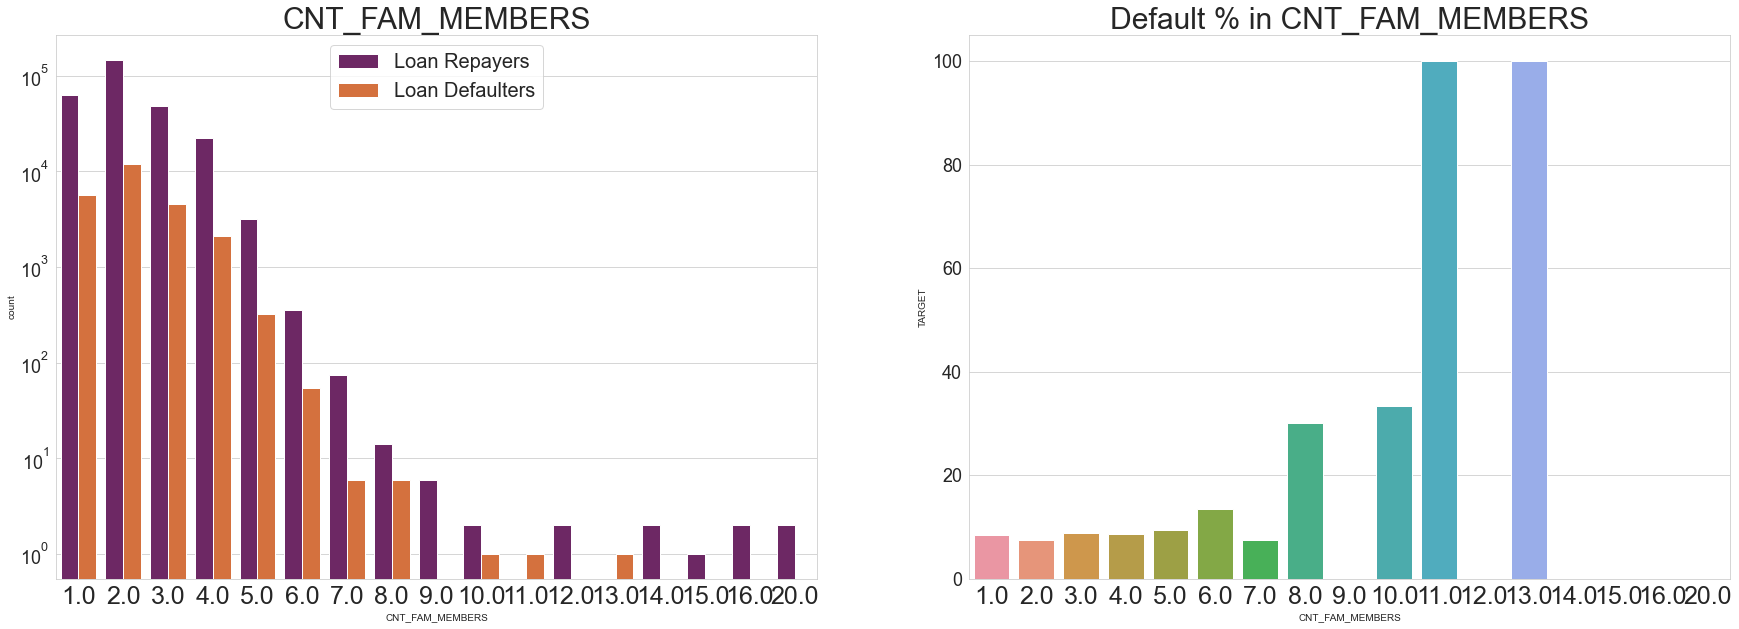

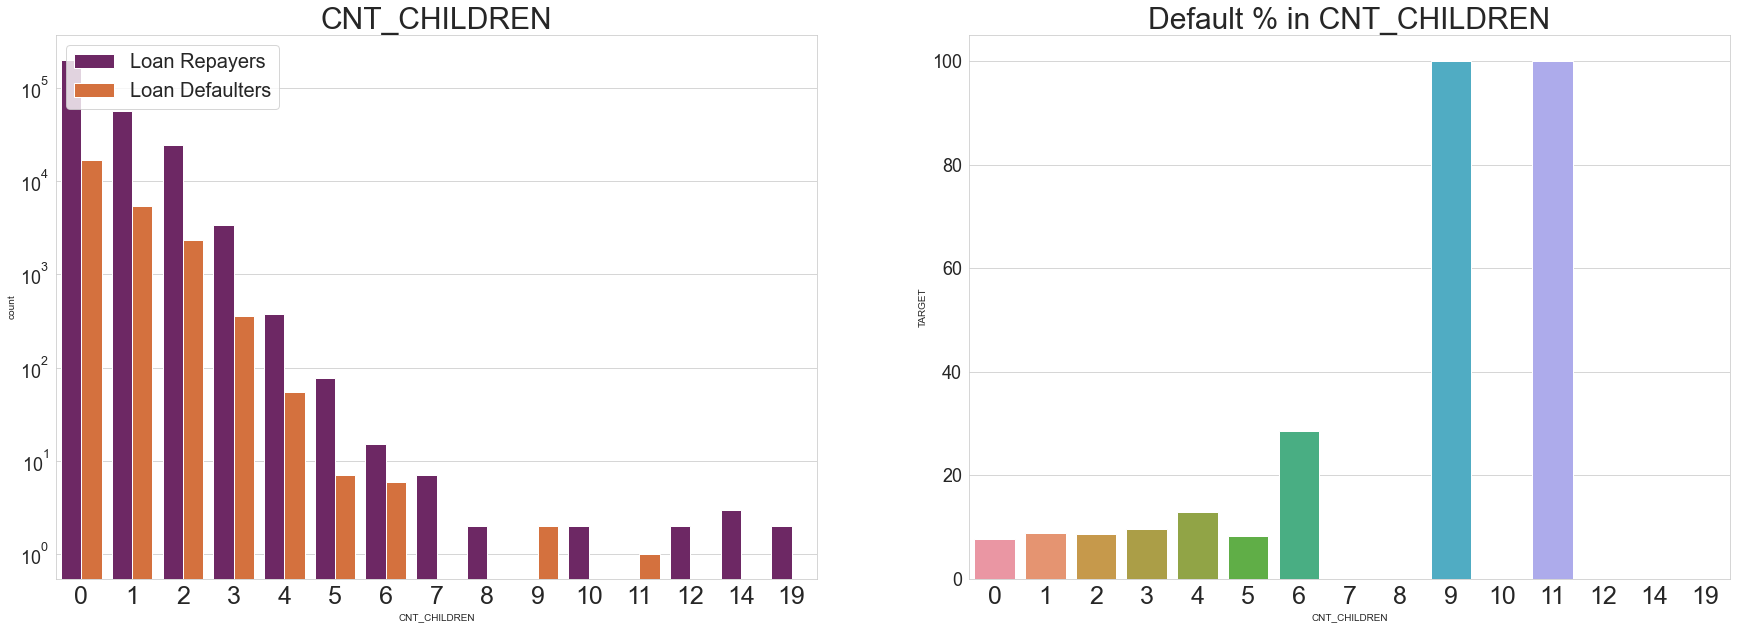

In [87]:
list_categories = ['AGE_RANGE','REGION_RATING_CLIENT','CNT_FAM_MEMBERS','CNT_CHILDREN']

for i in list_categories:
    plots(i,1,2,rot=0)

### <font color='purple'>**Comments**</font> :

> 1. In the AGE_RANGE variable, clients of age group lower than or equal to 30 have the maximum payment defaults. Clients with age group between 30 to 50 have taken the most number of loans and are preferred to target as they have less number of loan defaults.

> 2. It can be seen from the REGION_RATING_CLIENT variable that clients from  the regions where rating is 2 are taking the maximum number of the loans and have lesser loan default ratio than other regions, thus it can be considered to target. Moreover, clients from region as rating 3 are pretty much more prone to default.

> 3. The clients having the 11 and 13 family members have the highest default rate of 100% and most of the loans are taken by those clients who have less family members.

> 4. Clients having no children are the ones who have taken the most number of loans, on the other hand clients having 9 and 11 children are defaulting the most.

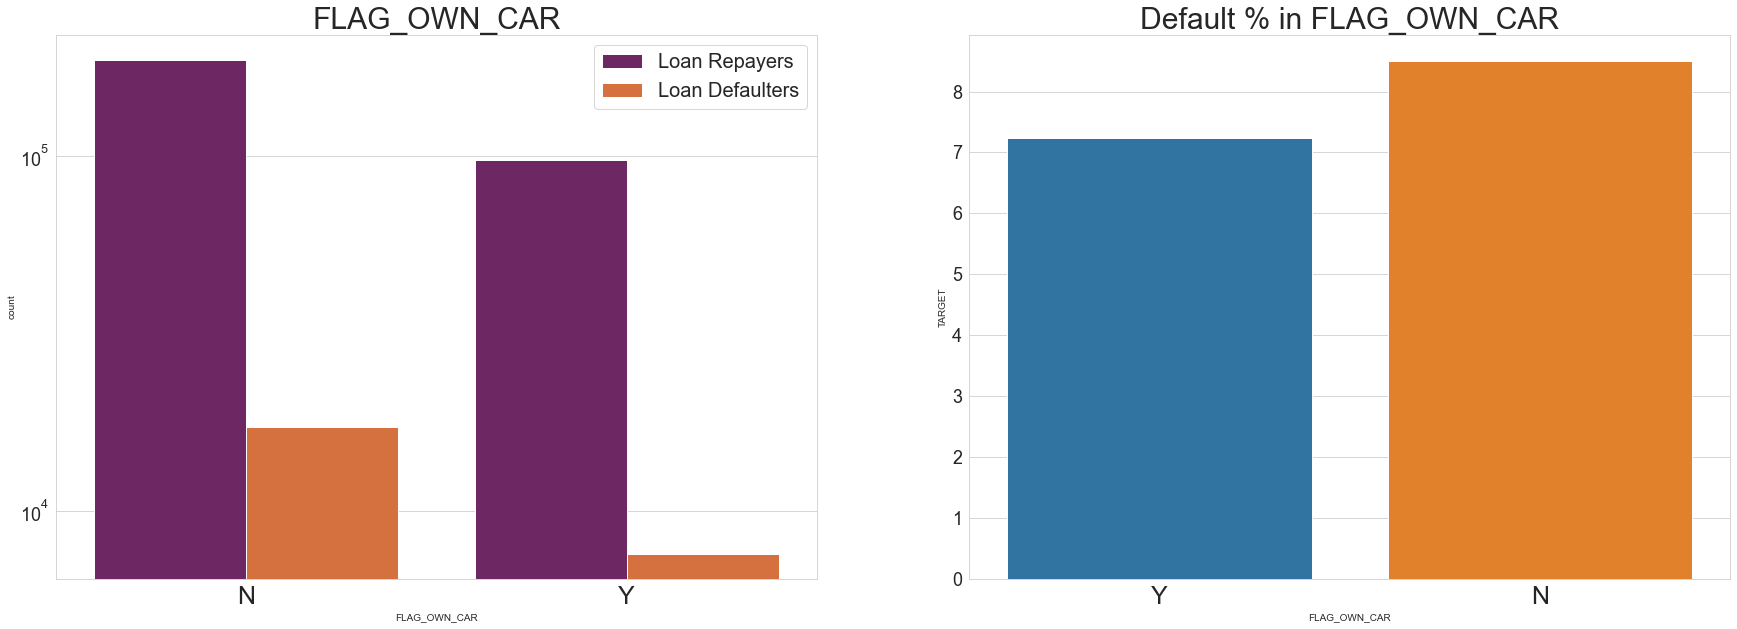

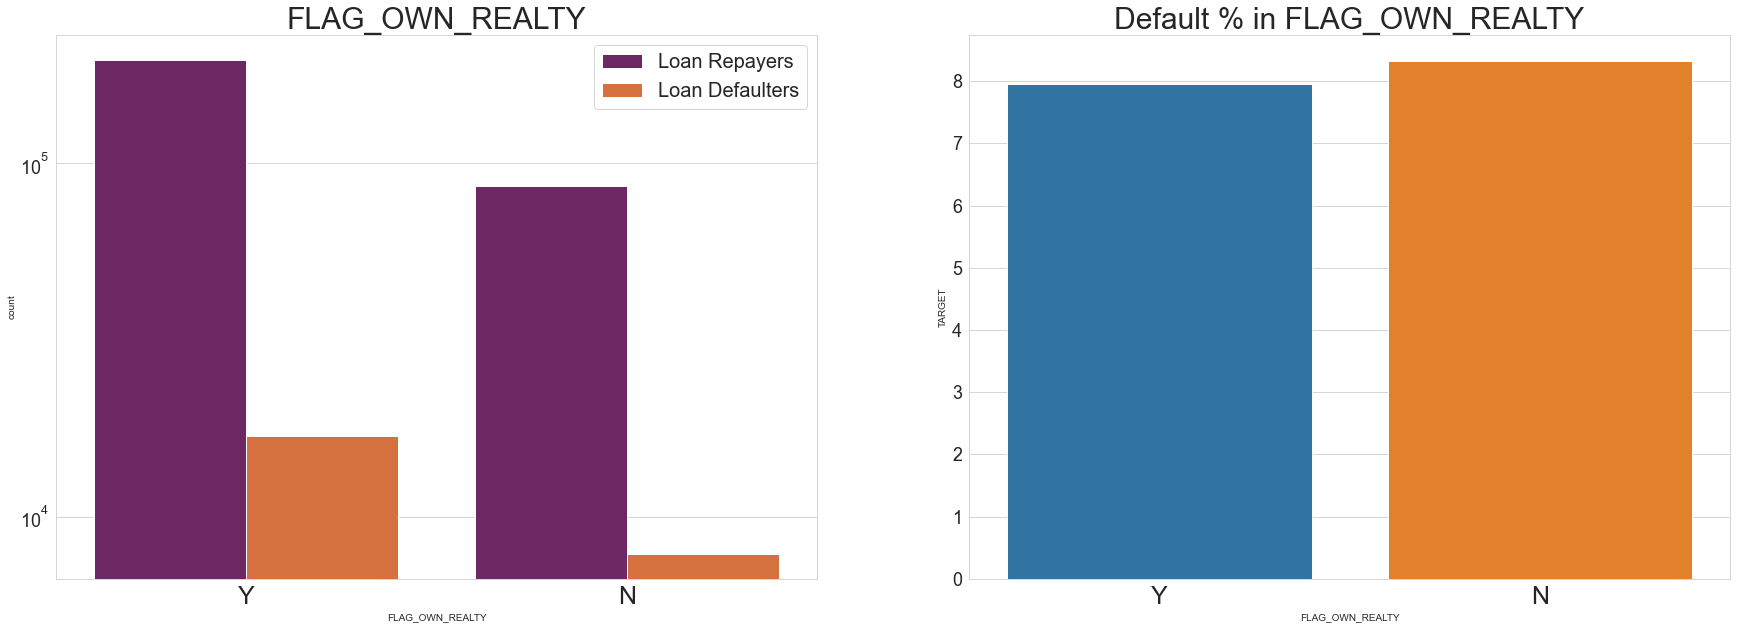

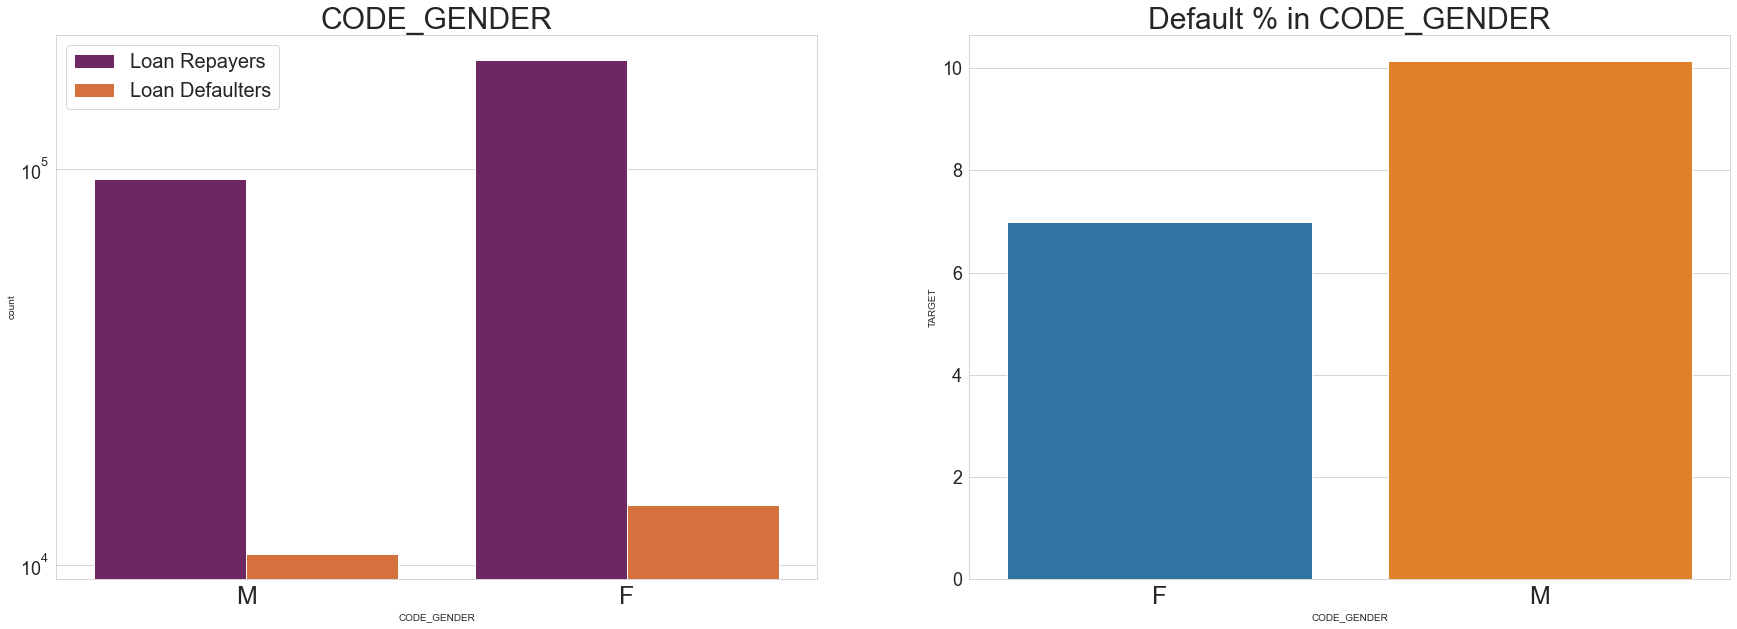

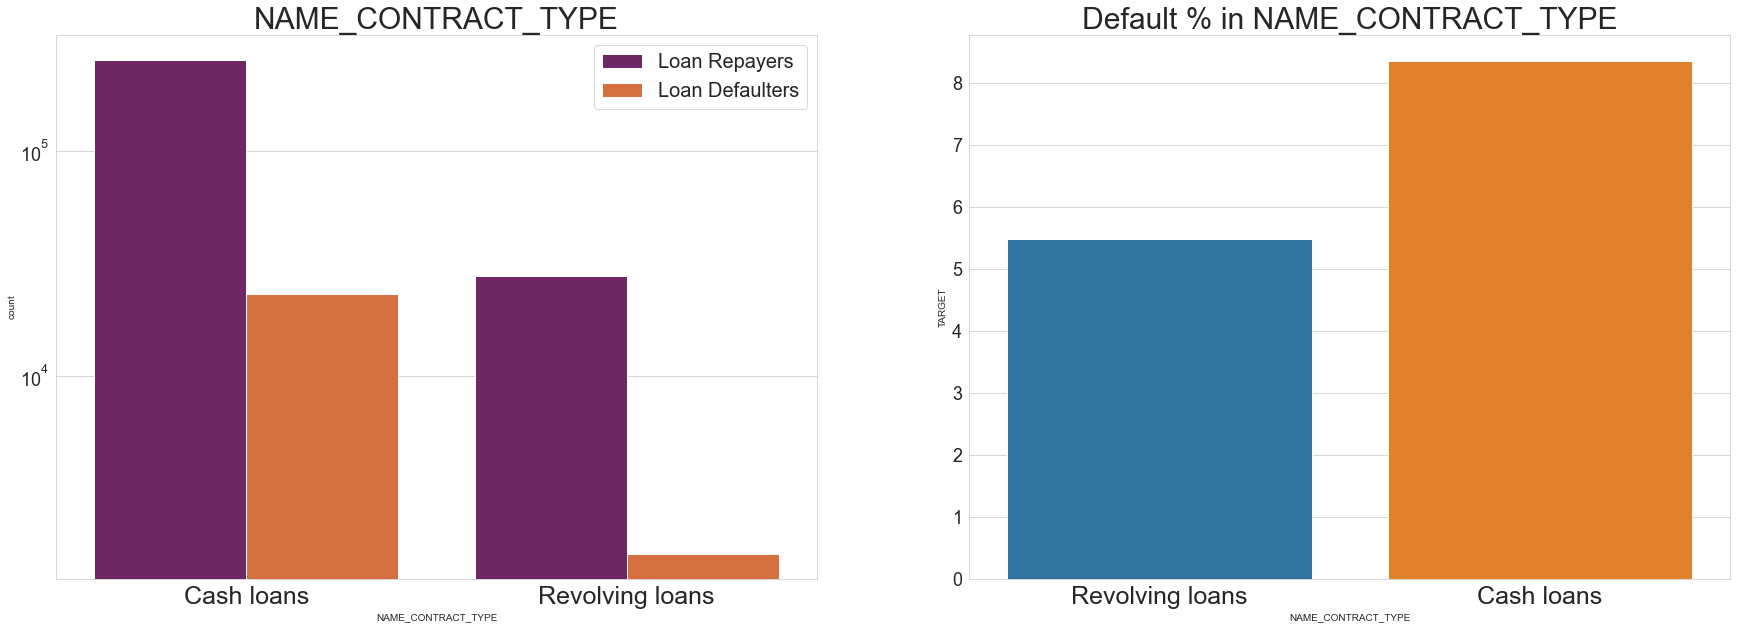

In [88]:
list_categories = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','CODE_GENDER','NAME_CONTRACT_TYPE']

for val in list_categories:
    plots(val,1,2,rot=0)

### <font color='purple'>**Comments**</font> :

> 1. Clients having their own flat/house are much likely to repay the loans than those who do not and same can be observed for those who has their own vehicals.

> 2. As it can be seen from the graphs, females are taking more loans than males and are doing much better than the males in repaying the loans while males have taken less number of loans as compared to the females and on the other hand, their defaulting percentage is high.

> 3. It seems clients are interested more towards the cash loans type contract and are defaulting more on the loans while the revolving loan type contract are performing much better.

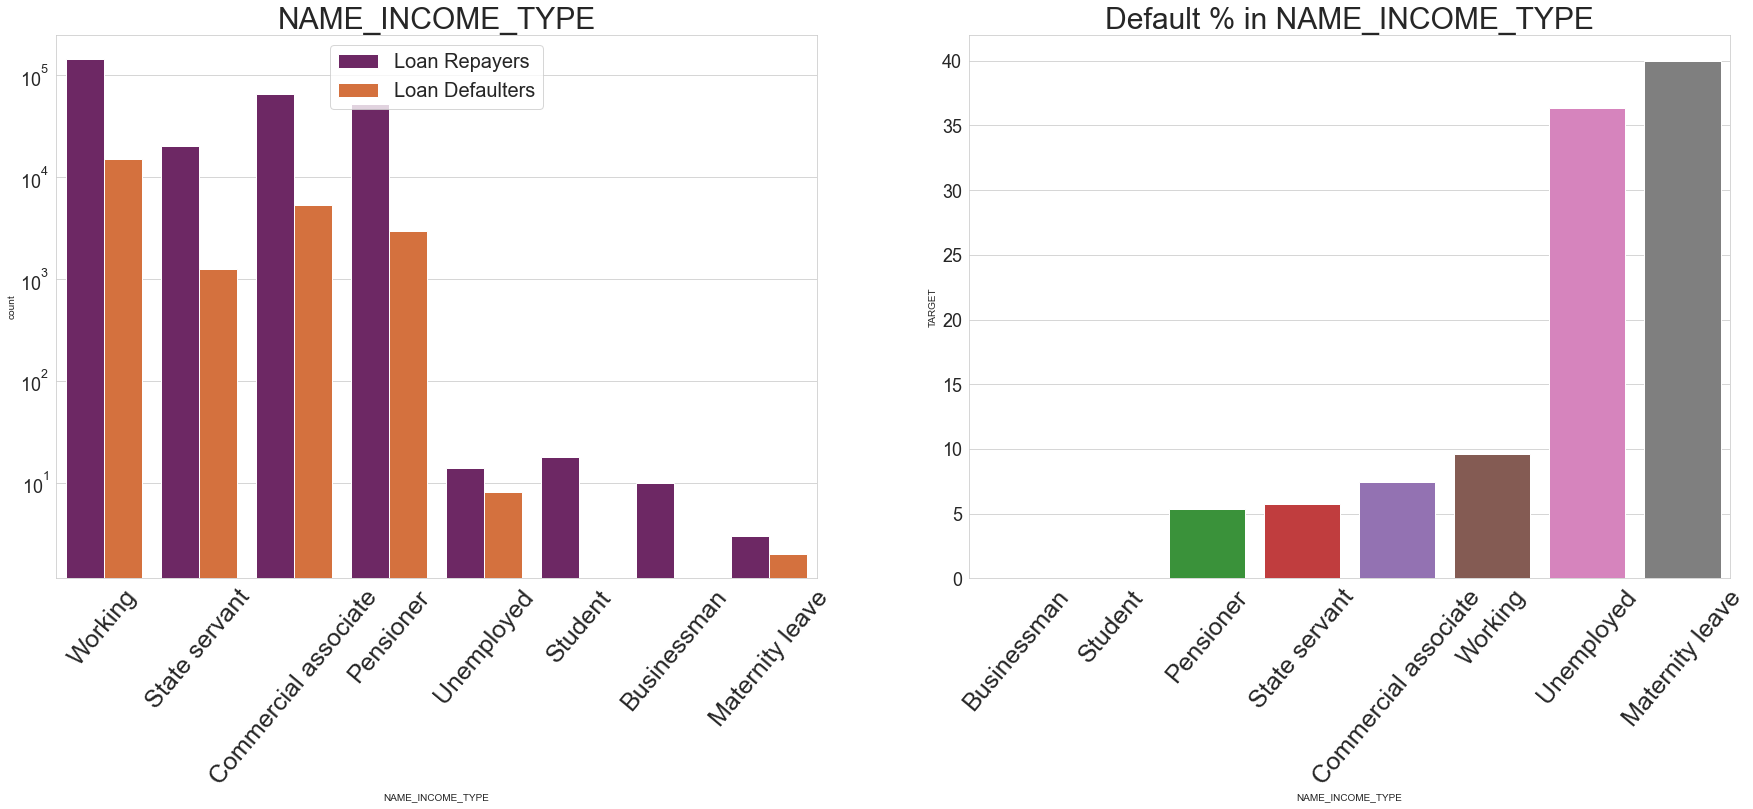

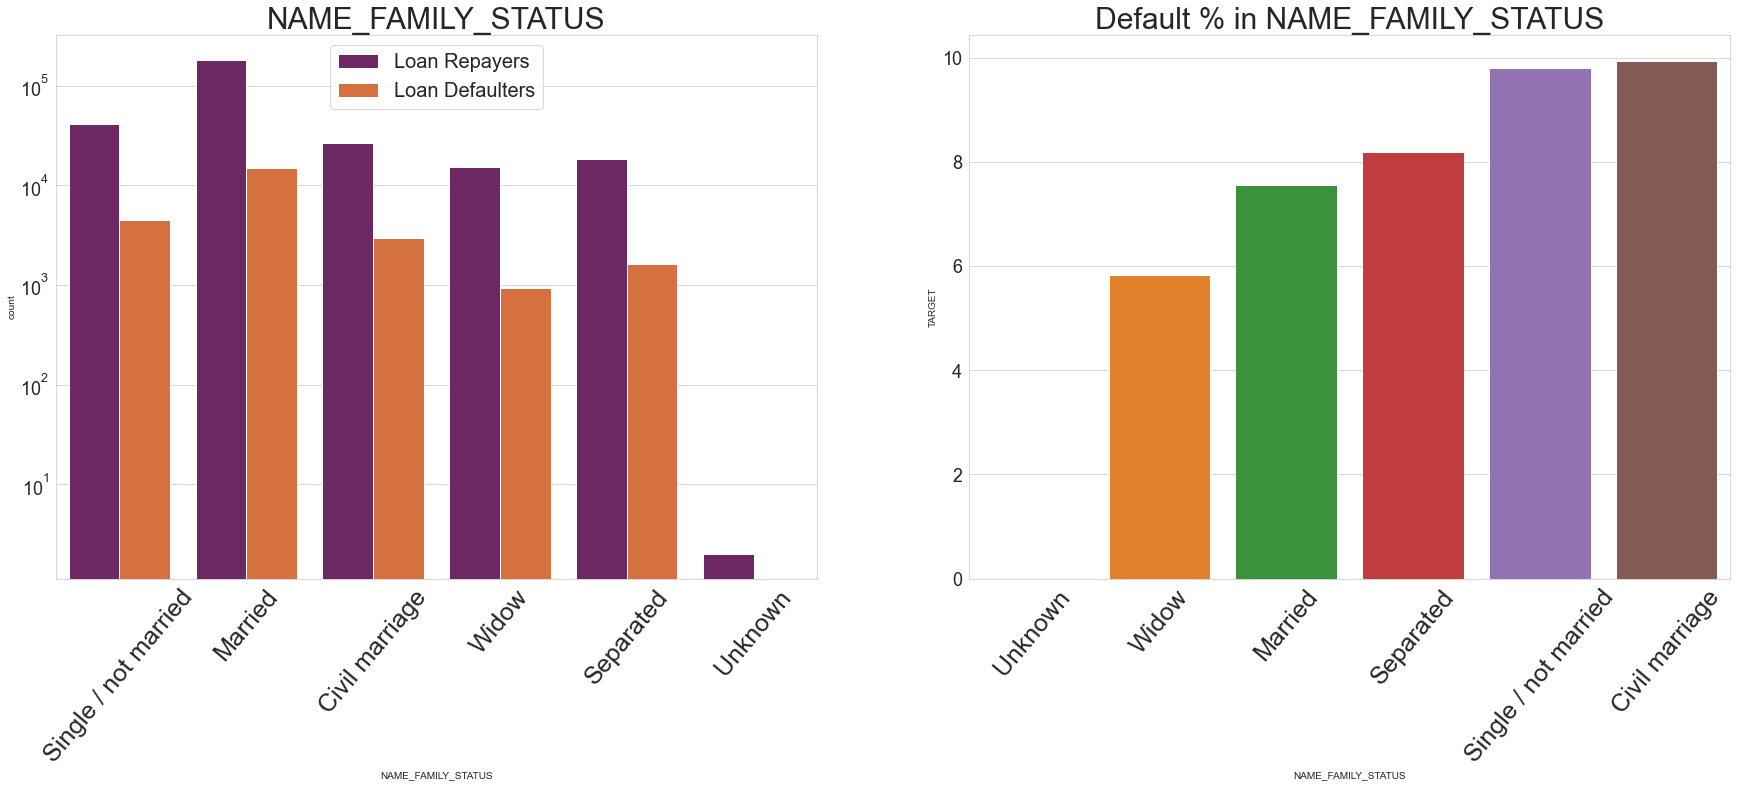

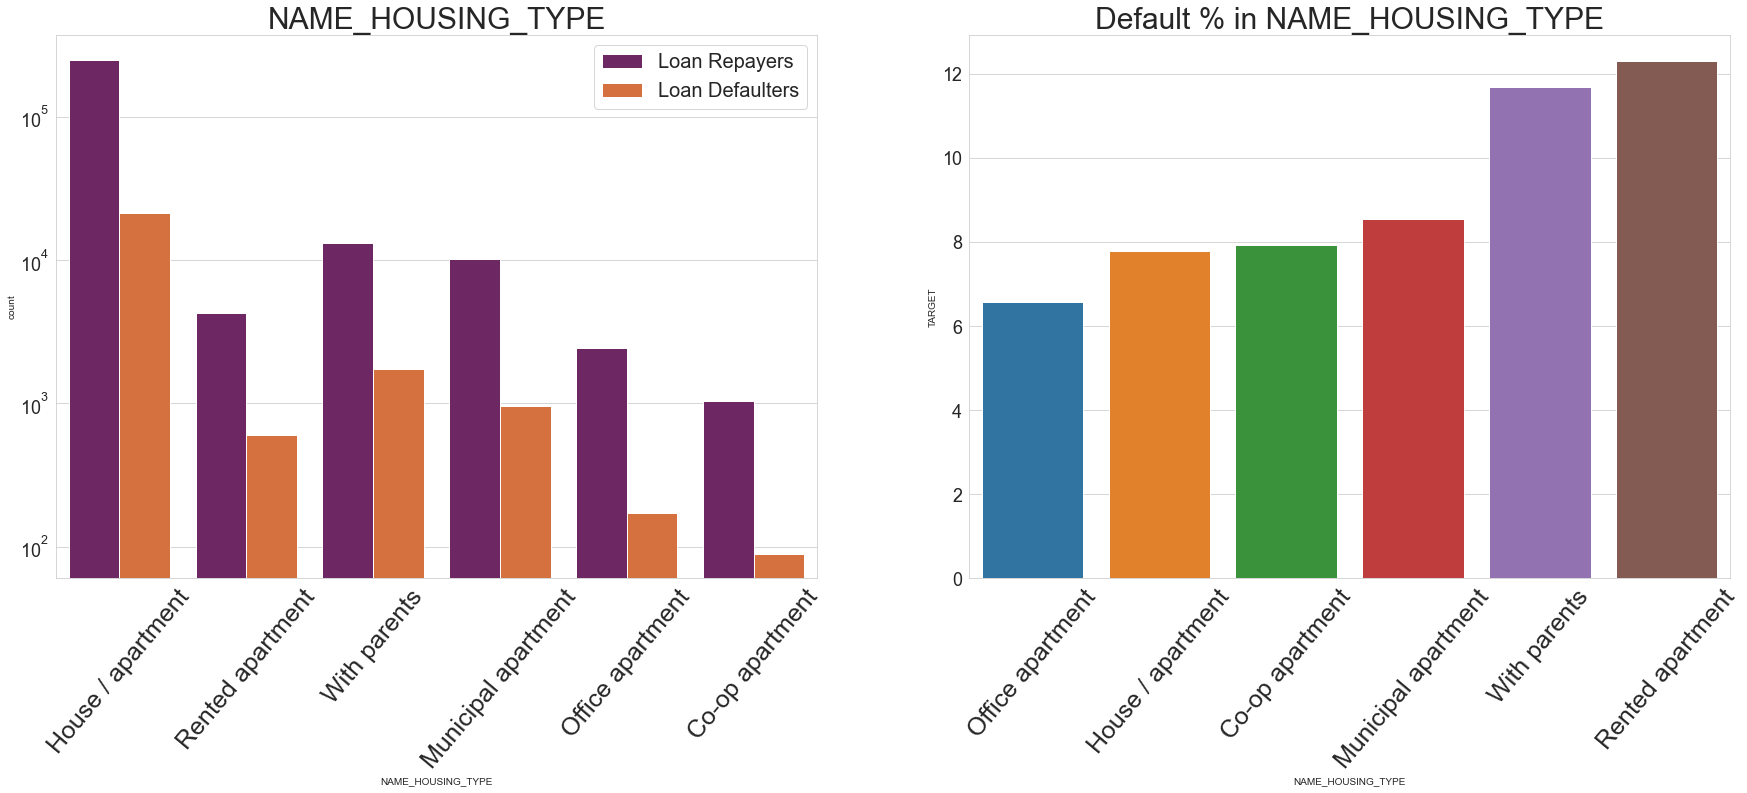

In [89]:
list_categories = ['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

for i in list_categories:
    plots(i,1,2,rot=50)

### <font color='purple'>**Comments**</font> :


> 1. In the NAME_INCOME_TYPE variable, clients who are either businessman or student are pretty much likely to repay the loans and also for the working clients. While considering the clients who are Unemployed or are on Maternity Leave should be less likely be the ones for giving out the loan.

> 2. Clients that are single or hold civil marriage as their family status must be considered less while giving out loans because they are the ones with high default ratio. For the clients with the separated family status should be chosen very carefully when giving out loans. Married clients are approaching the bank more for the loans and can be considered to give out loans.

> 3. The clients that have own their own house/apartment or are using office apartment should be considered more often while giving out loans as clients living in the rented apartments are very risky to be considered for giving loans.



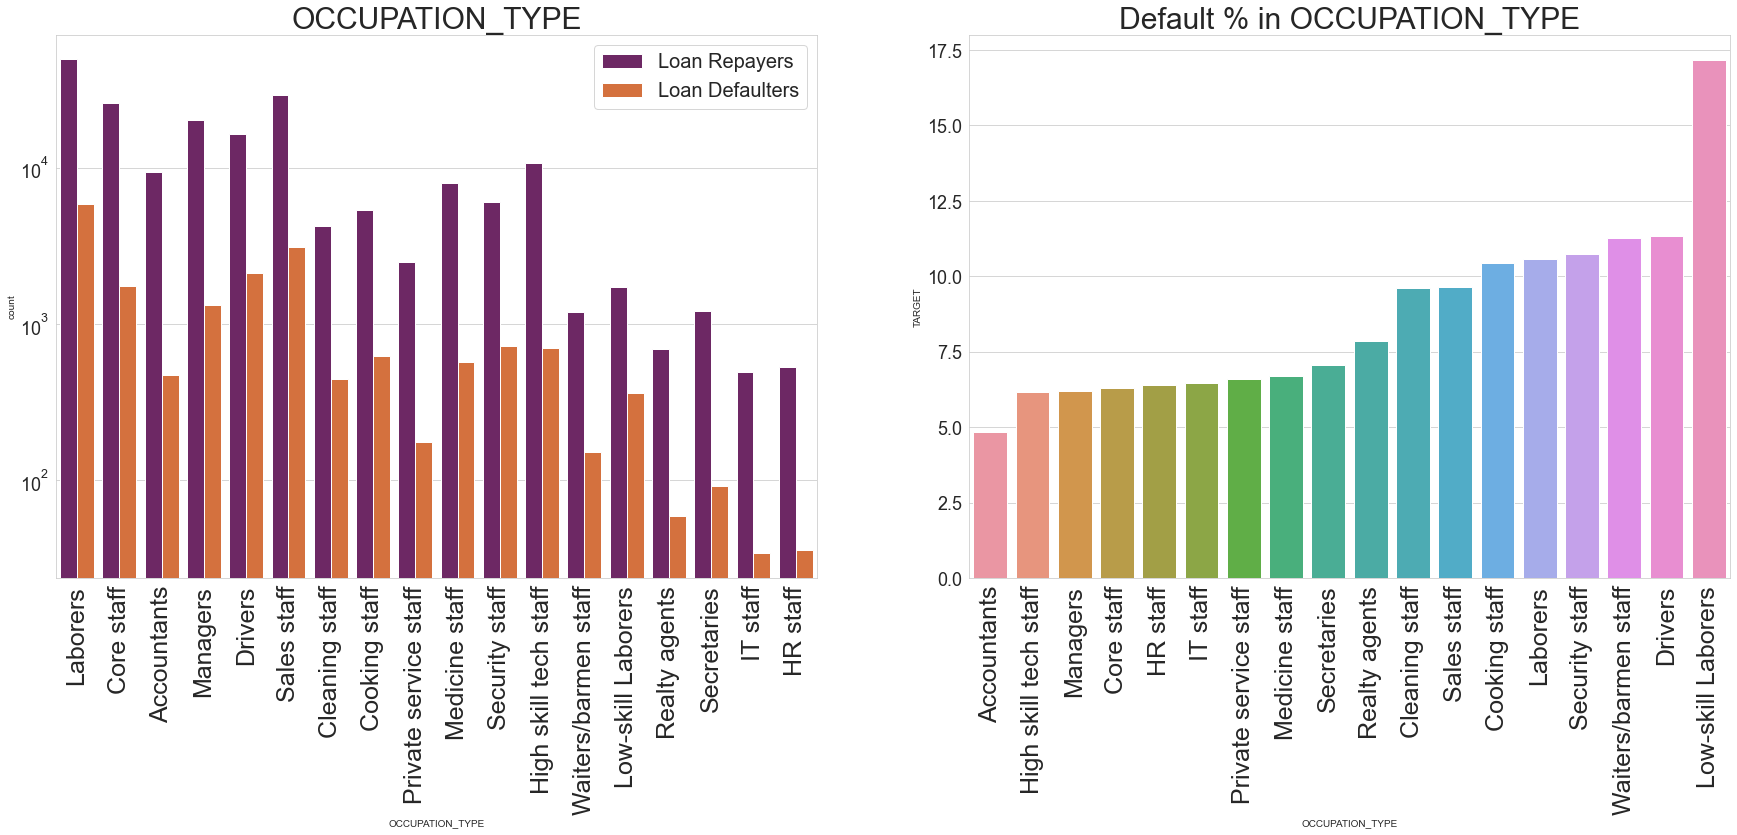

In [90]:
plots('OCCUPATION_TYPE',1,2)

### <font color='purple'>**Comments**</font> :

> It is very risky to consider Low-skilled Laborers when considering clients on giving loans as the percentage of defaulters for this category is the most from other categories. Clients having the occupation such as Accountants,High skill tech staff,Managers,HR and IT staff or the "other" category are pretty much safe to consider for giving out loans and even small amount of loans to labourers can be given.

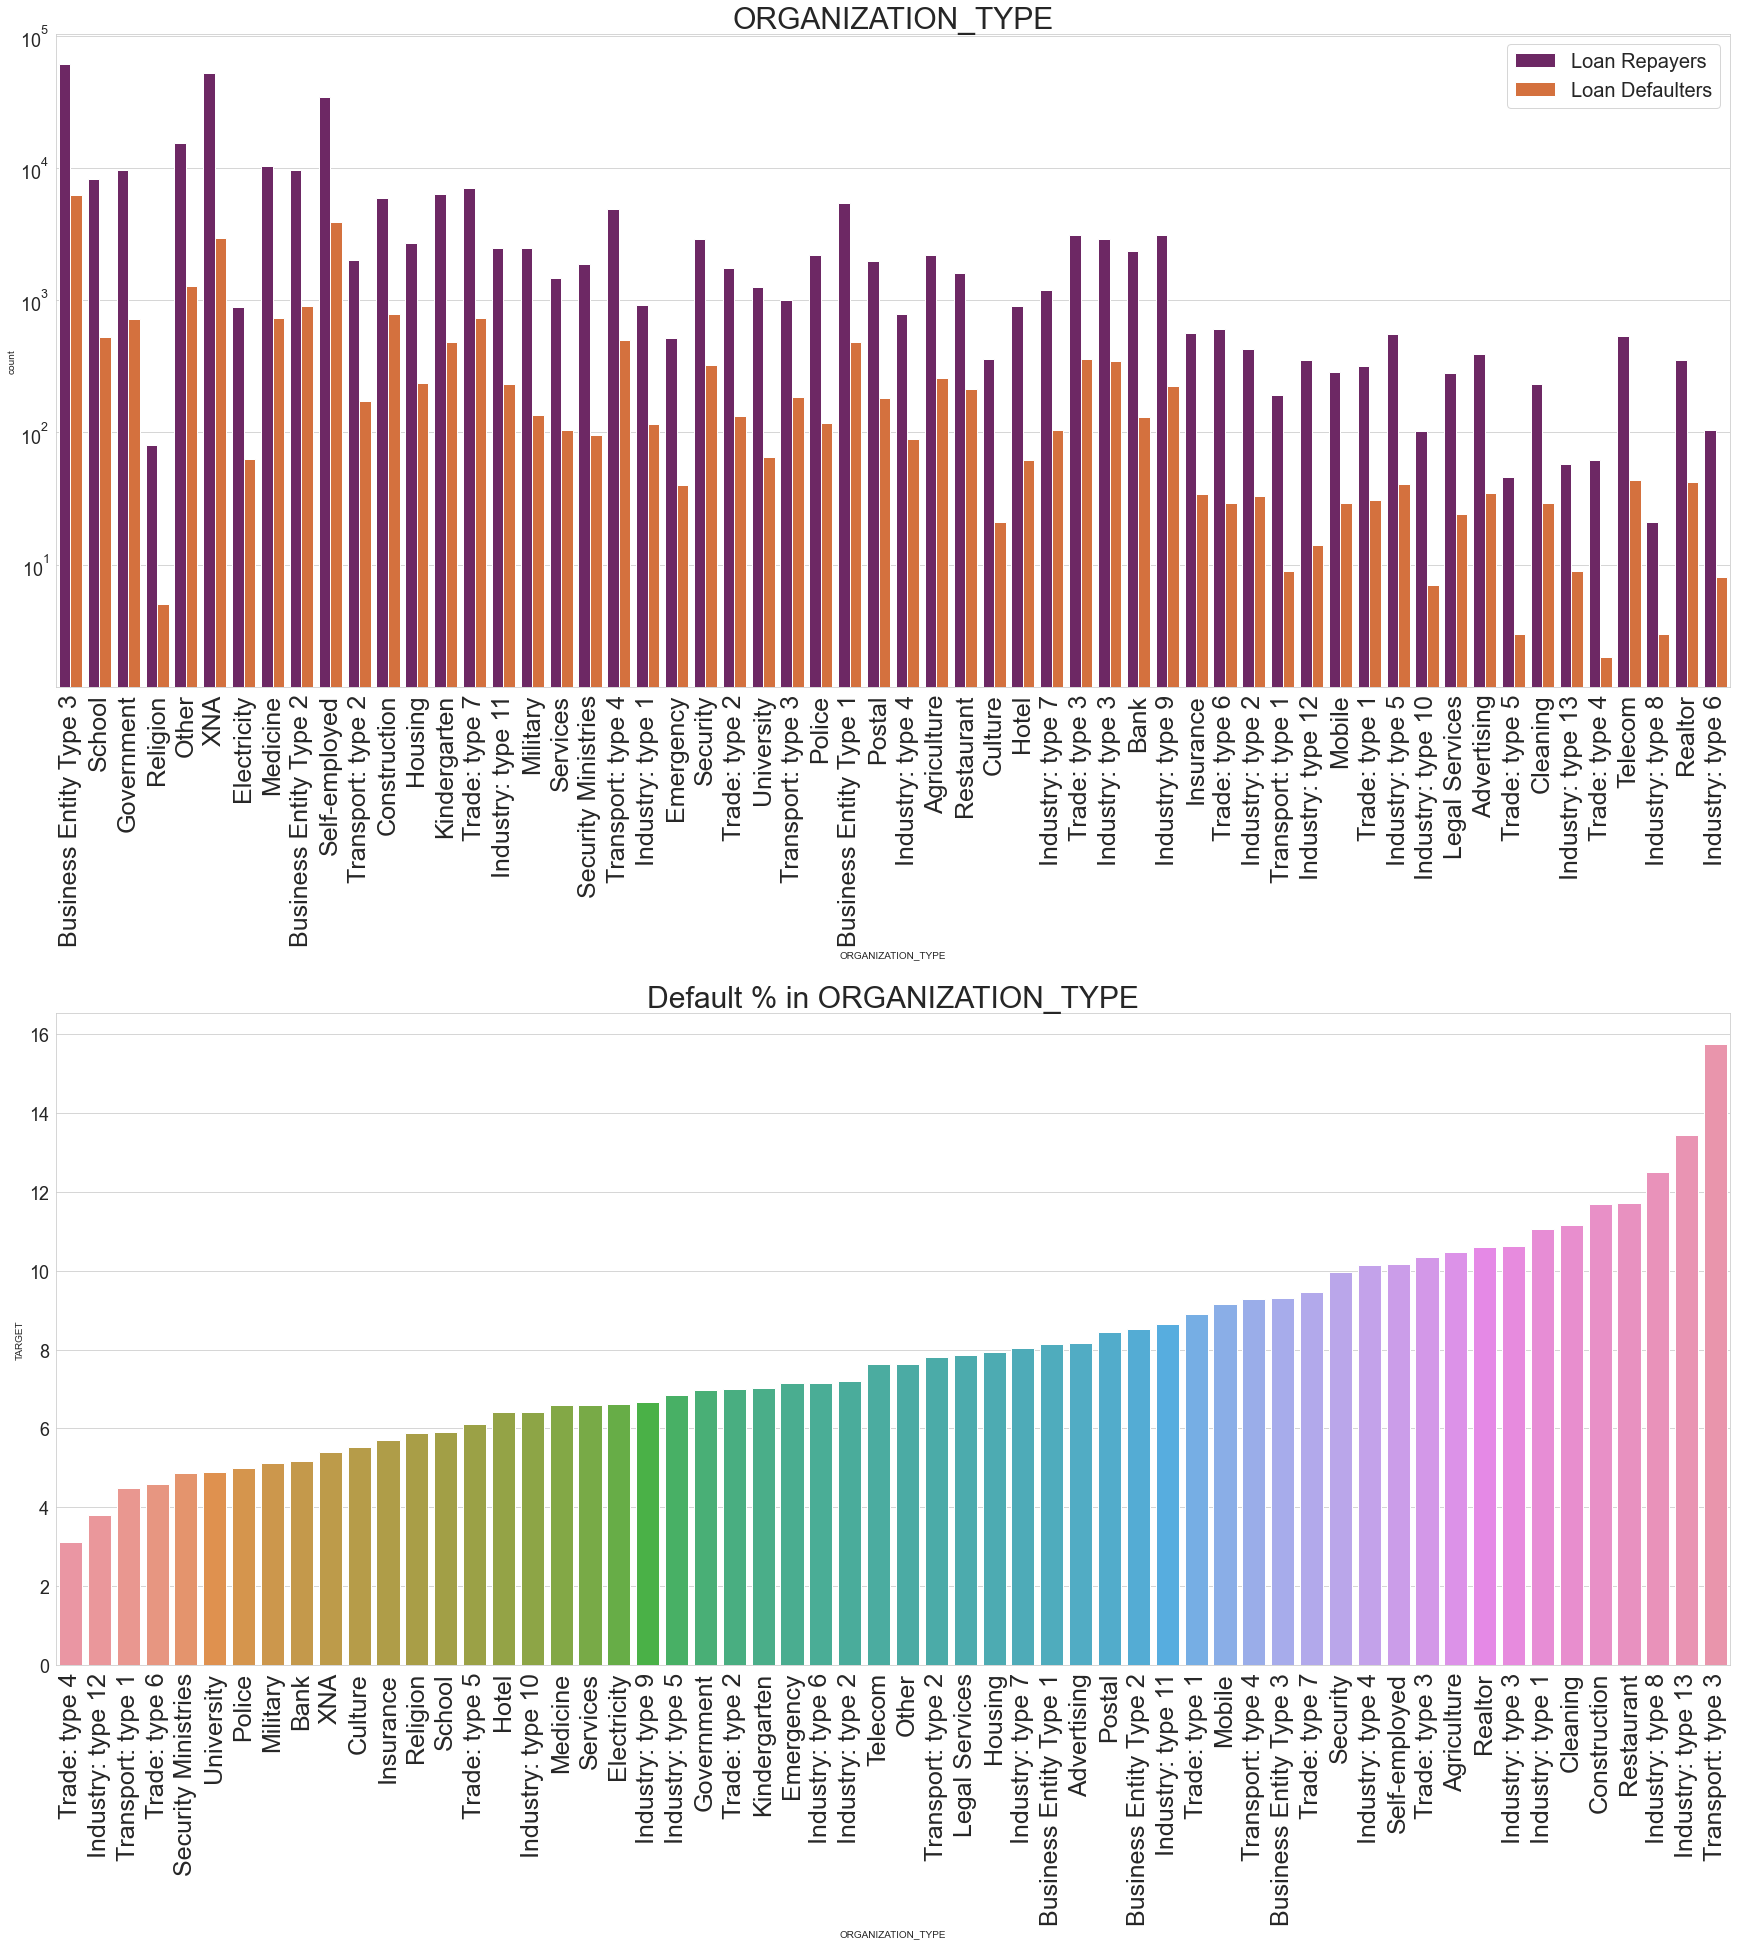

In [91]:
# Plotting the ORGANIZATION_TYPE separately 

plots('ORGANIZATION_TYPE',rows=2)

<font color='purple'>**Comment**</font>: 

> 1. By looking at the graph:

>> **a)** Industry Type : All industries except type 1,3,4,8,13 can be chosen for giving out loans more frequently as their default % is lower than these 5.

>> **b)** Transport Type : Bank should focus more on giving out loans to the transport type 1 and 2 as they are more likely to repay the loans on time than others.

>> **c)** It can be seen that organizations such as  Universities,Schools,Government can be beneficial ones to target for giving out loans as their chances to default out on loans are quite less.

> 2. Those organizations should be targeted more for the loans whose default % are quite lower than 10% when compared to other organizations.

### **3.2.3 Numeric - Categorical Variables**

In [92]:
# Dividing the data set into 2 parts target_0 : Loan Repayers and target_1 : Loan Defaulters

target_0 = app1[app1['TARGET']==0]

target_1 = app1[app1['TARGET']==1]

In [93]:
# Creating a function for bivariate analysis

def cat_num_bivar(x=None,y=None,hue=None,est=np.mean,rot=90):
    plt.style.use('dark_background')
    fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    first = sns.barplot(data=target_0,x=x,y=y,hue=hue,palette='Set3',estimator=est,ax=ax1)
    first.set_title(f'Target 0 : {x} vs {y}',fontsize=20)
    plt.setp(first.xaxis.get_majorticklabels(),rotation=rot,fontsize=25)
    plt.setp(first.yaxis.get_majorticklabels(),fontsize=18)

    sec  = sns.barplot(data=target_1,x=x,y=y,hue=hue,palette='Set3',estimator=est,ax=ax2)
    sec.set_title(f'Target 1 : {x} vs {y}',fontsize=20)
    plt.setp(sec.xaxis.get_majorticklabels(),rotation=rot,fontsize=25)
    plt.setp(sec.yaxis.get_majorticklabels(),fontsize=18)

    plt.show()
    return None

**Education vs Income**

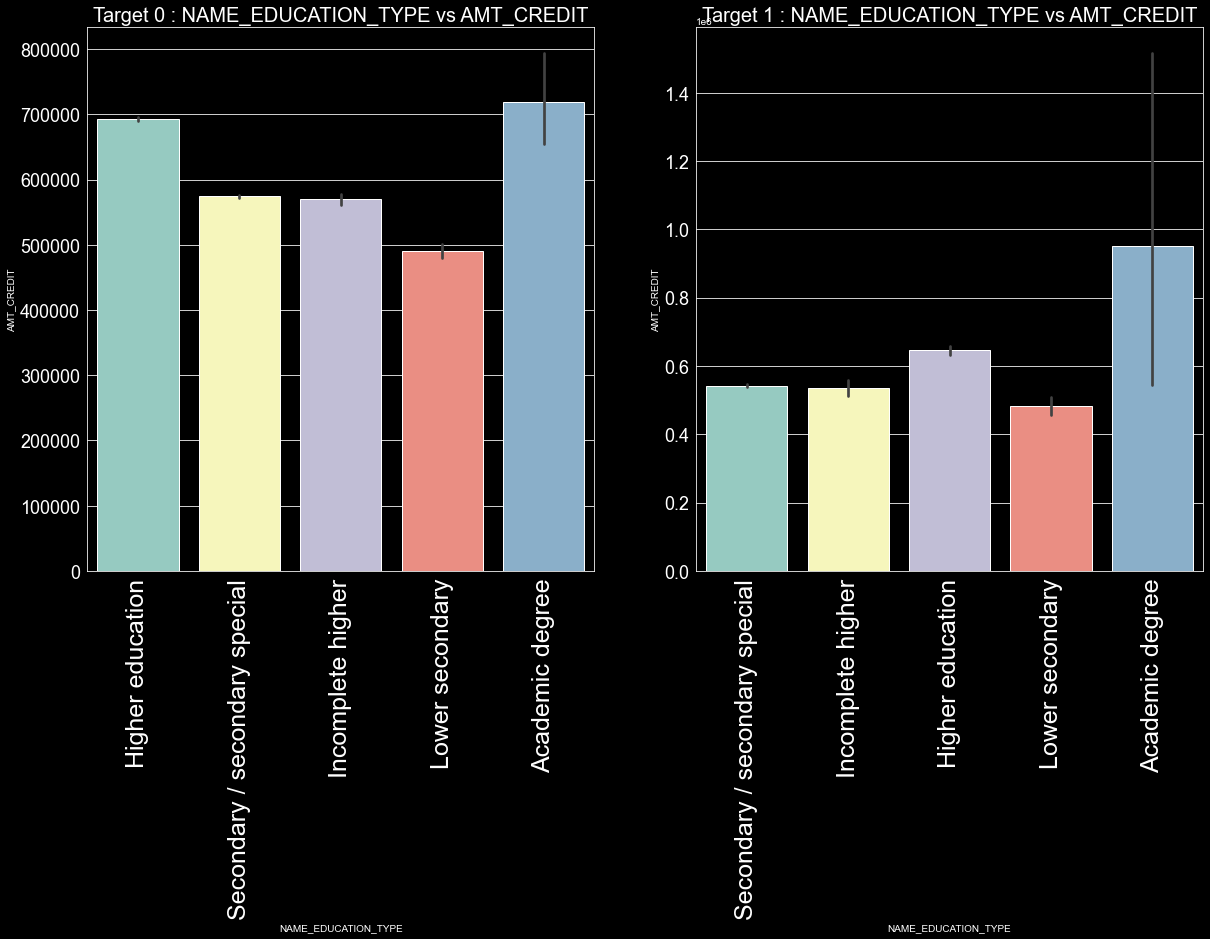

In [94]:
cat_num_bivar(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT')

<font color='purple'>**Comment :** </font> Candidates who are having the academic degrees or higher education atleast are most likey to repay the loans where the credit amount that they have taken is less than 720000. On the other hand, some of these clients from these two categories are also the ones are defaulting and moreover the ones with values over 720000 are mostly defaulting. So, clients having secondary/ special secondary or with incompletely higher are pretty much safe to approach for loans.

**Occupation vs Income**

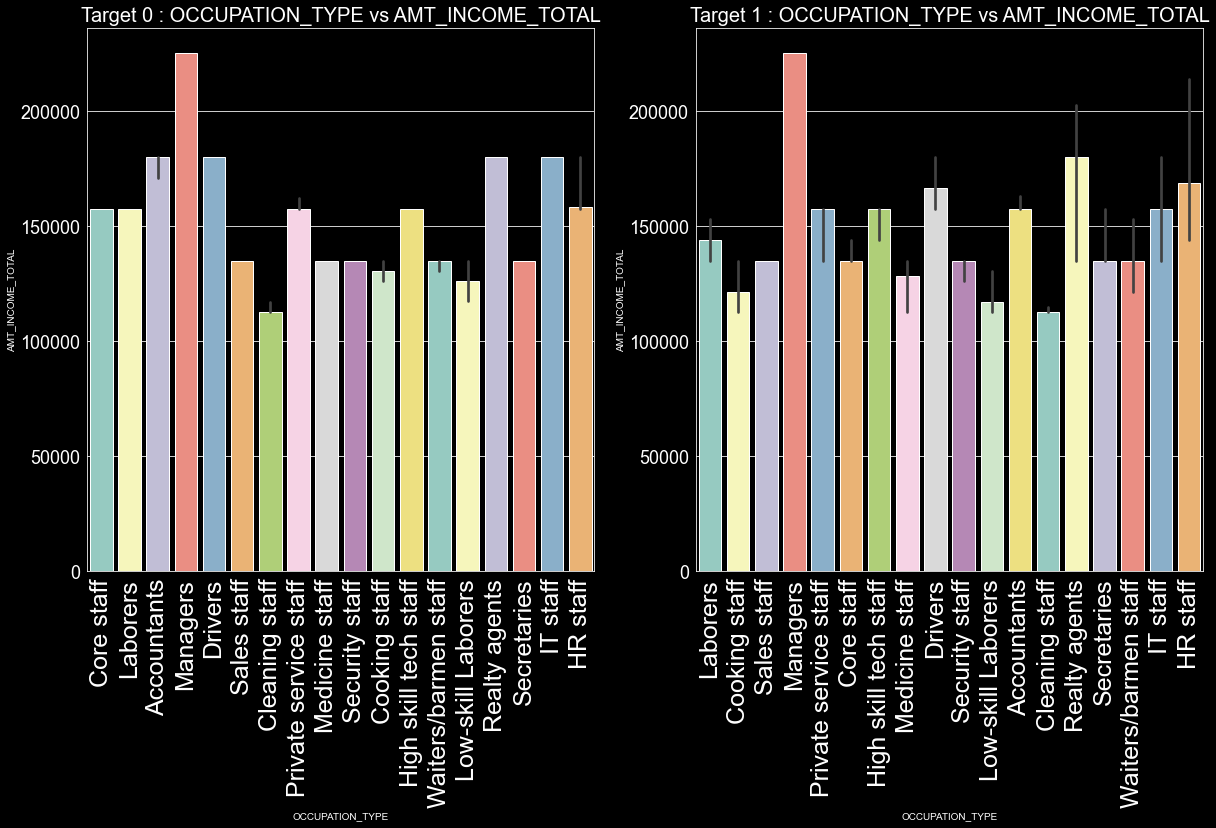

In [95]:
# Plotting the graphs with estimator as median

cat_num_bivar('OCCUPATION_TYPE','AMT_INCOME_TOTAL',est=np.median)

<font color='purple'>**Comment :**</font> As Income variable has outliers so it is better to choose median than mean estimator, clients with occupations such as Managers, accountants, realty agents, IT staff, drivers are having good income. So out of these categories Managers and realty agents must not be chosen much for loan approvals as they are more likeyly to default on the loans. Moreover, categories with income lower than 150000 can be considered more for loans.

**Income type vs Credit**

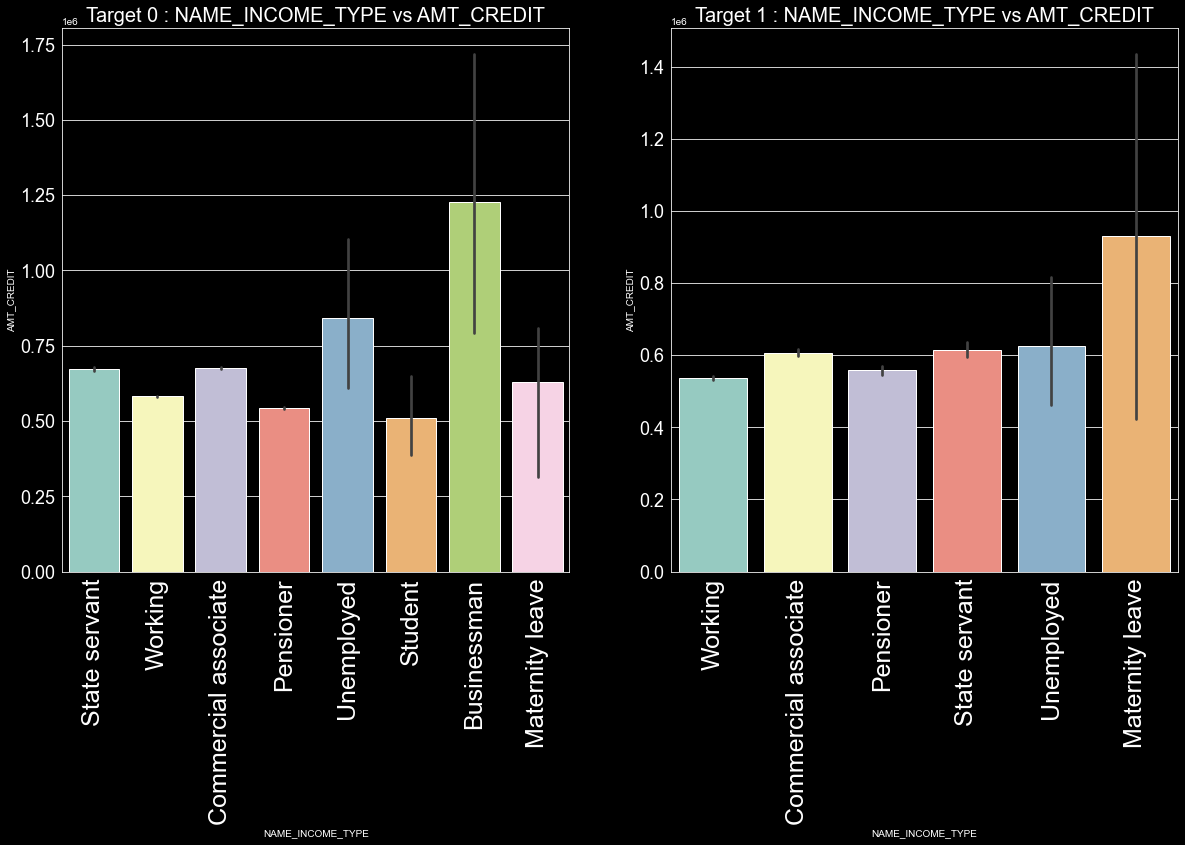

In [96]:
# Plotting the graphs

cat_num_bivar('NAME_INCOME_TYPE','AMT_CREDIT')

<font color='purple'>**Comments**</font> : 

1. The credit amount is the highest for the businessman while clients who are having pensions are taking low credit amount from the bank.

2. Clients having their own businesses or are students, repaying the loans completely whereas clients who are on maternity leave are least ones to be considered for giving out the loans. Care should be taken for State servants and for commercial clients while considering for loan approval.

**Housing type  vs Income**

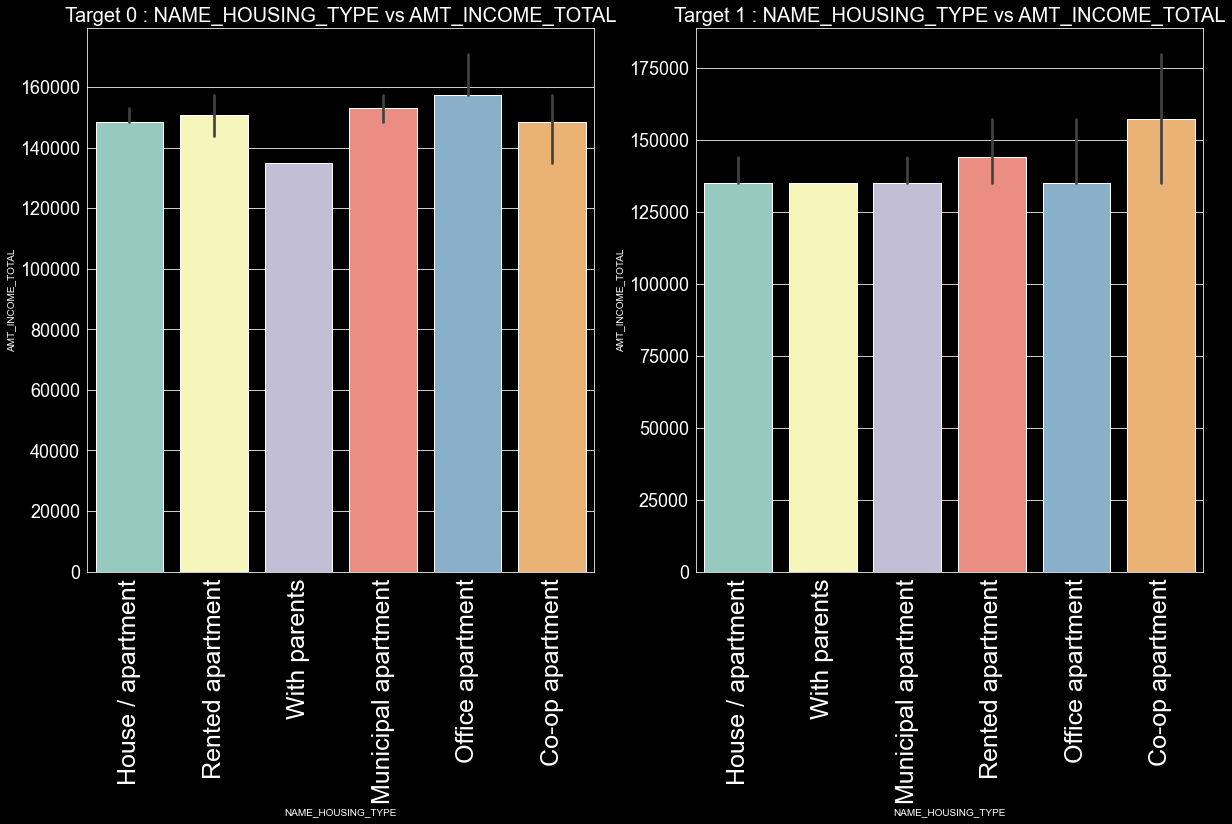

In [97]:
# Plotting the graph with estimator as median

cat_num_bivar('NAME_HOUSING_TYPE','AMT_INCOME_TOTAL',est=np.median)

<font color='purple'>**Comment :**</font> The clients having the highest incomes are living in office apartments and the clients living with parents are earning quite less than others but are more prone to default the loans. The clients living in CO-OP apartments are much likely to default the most. Hence, bank should focus more towards clients having their own house/apartment or living in office apartments.

**CODE_GENDER vs AMT_INCOME_TOTAL**

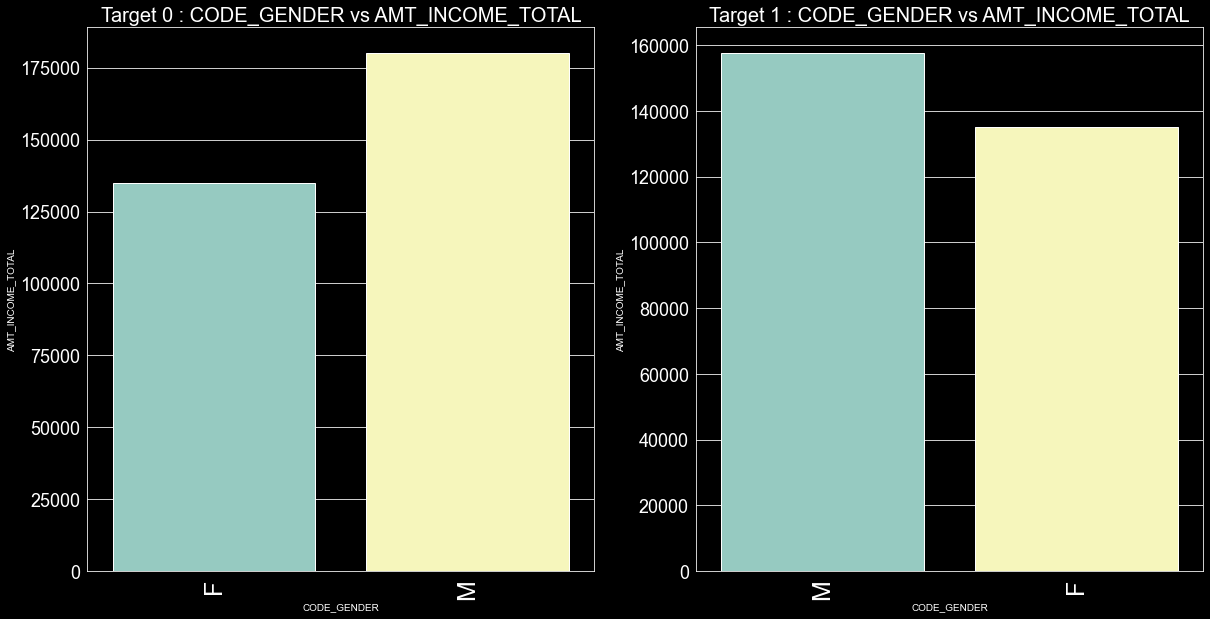

In [98]:
cat_num_bivar('CODE_GENDER','AMT_INCOME_TOTAL',est=np.median)

<font color='purple'>**Comment :**</font> Fromt the above plots, we can say that males are earning more than females, on the other hand the default rate for the males are much higher.

### 3.2.4 Categorical - Categorical Variables

In [99]:
def cat_cat(data1,data2,x,hue,scale='linear',order=None,rot=90):
    plt.style.use('dark_background')
    fig= plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)

    sns.countplot(data = data1,x=x,hue=hue,hue_order=order,palette='Spectral')
    plt.title(f'target 0 :{x} vs {hue}',fontsize=20)
    plt.yscale(scale)
    plt.xticks(rotation=rot,fontsize=25)
    plt.legend(fontsize=16)
    
    plt.subplot(1,2,2)
    sns.countplot(data = data2,x=x,hue=hue,hue_order=order,palette='Spectral')
    plt.title(f'target 1 :{x} vs {hue}',fontsize=20)
    plt.yscale(scale)
    plt.xticks(rotation=rot,fontsize=25)
    plt.legend(fontsize=16)
    plt.show()
    return None
    

**Name_housing vs Gender**

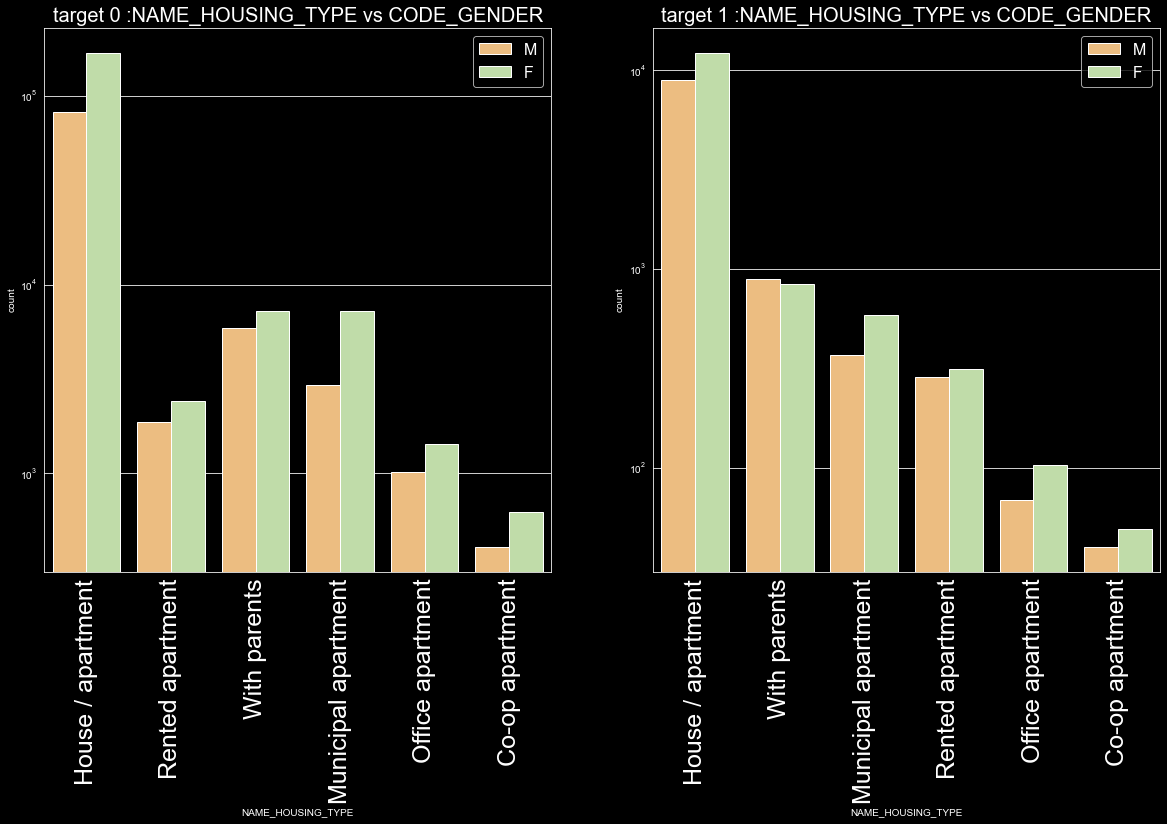

In [100]:
cat_cat(target_0,target_1,'NAME_HOUSING_TYPE','CODE_GENDER','log',['M','F'])

<font color='purple'>**Comment :**</font>

From the above plots it can be seen that males living with thier parents are much more likely to default than females. Females are more defaulting on the loans but the recovery rate is much better as compared to males.

**Occupation vs Family Status**

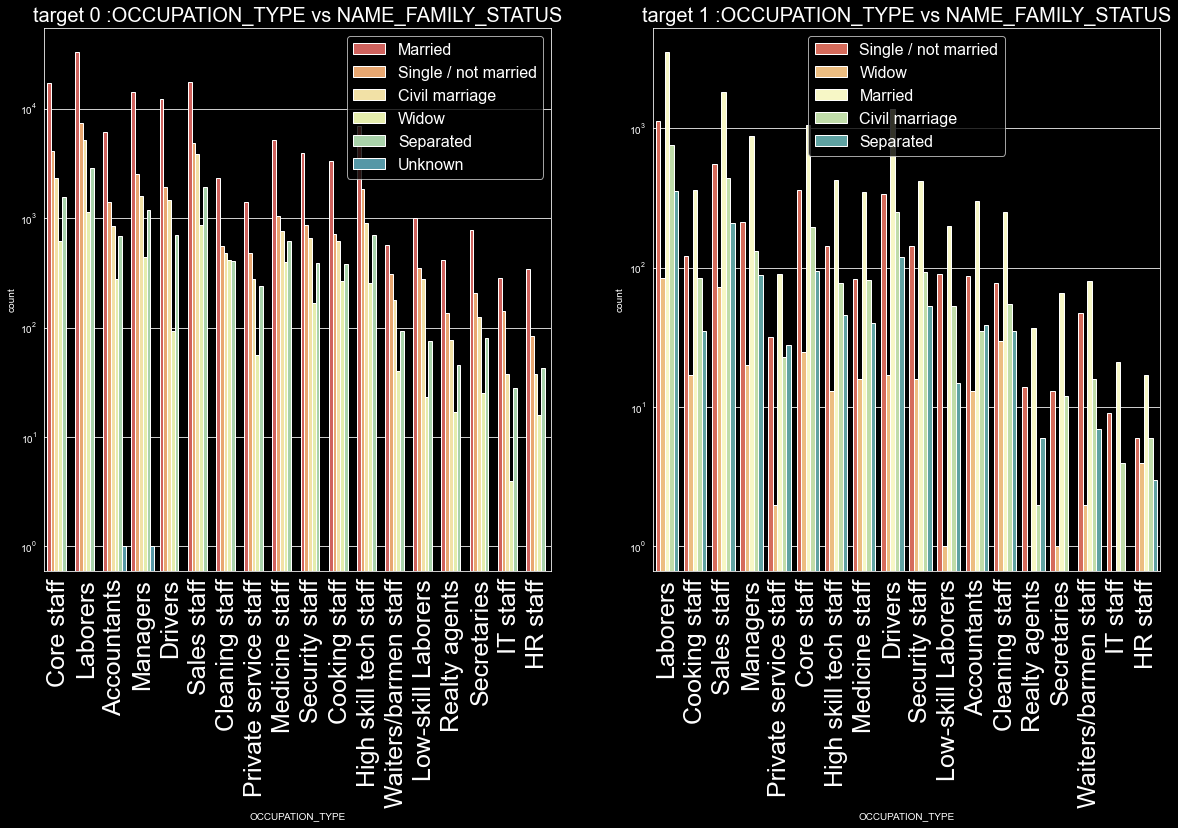

In [101]:
cat_cat(target_0,target_1,'OCCUPATION_TYPE','NAME_FAMILY_STATUS',scale='log')

<font color='purple'>**Comment :**</font> Married and single clients are approaching the bank more for the loans on the other hand widows are approaching the less for the loans and are less likely to default. Married laborers are defaulting more as compared to single/not married.

**Income type vs Education type**

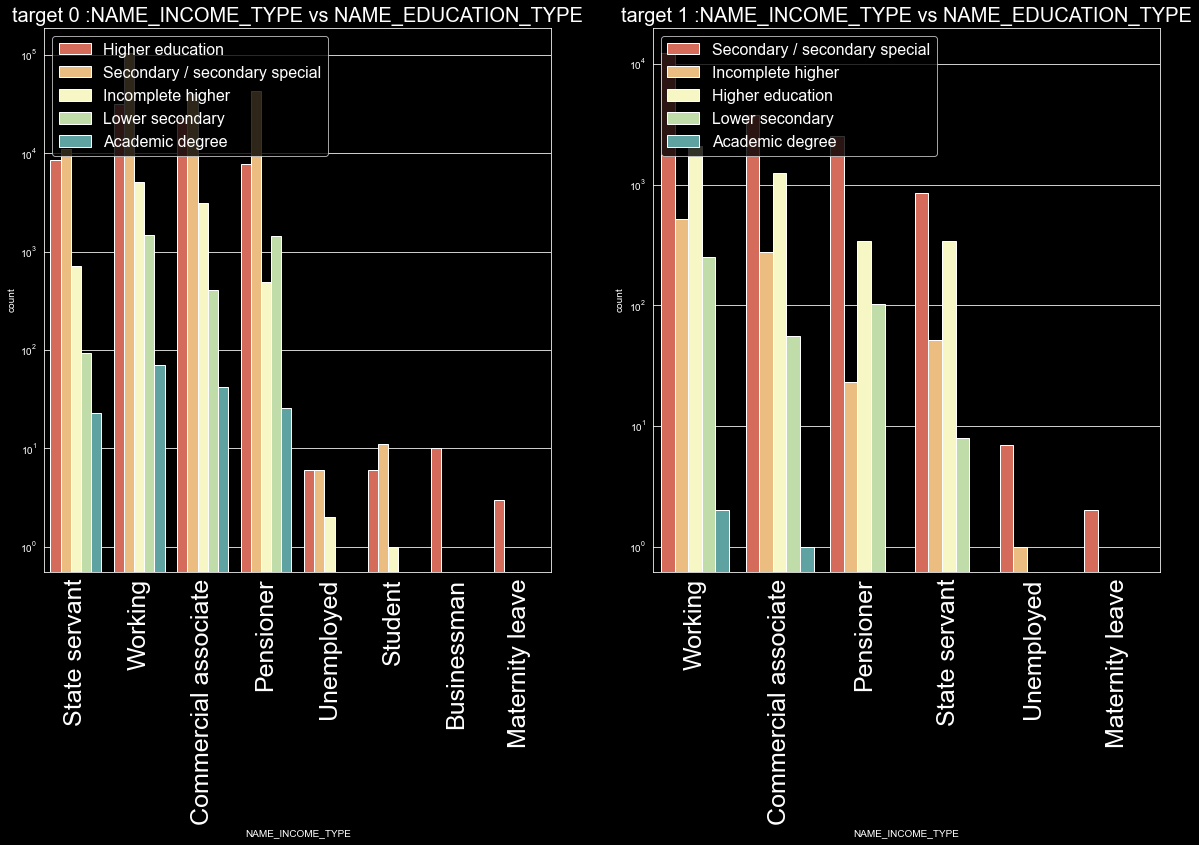

In [102]:
cat_cat(target_0,target_1,'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','log')

<font color='purple'>**Comment :**</font> Clients with higher education who are on the maternity leave are less in number for taking loans and defaulting the most, so they should be less considered and for the unemployed ones clients with Secondary/ secondary special are mostly at default.

**NAME_FAMILY_STATUS vs FLAG_OWN_REALTY**

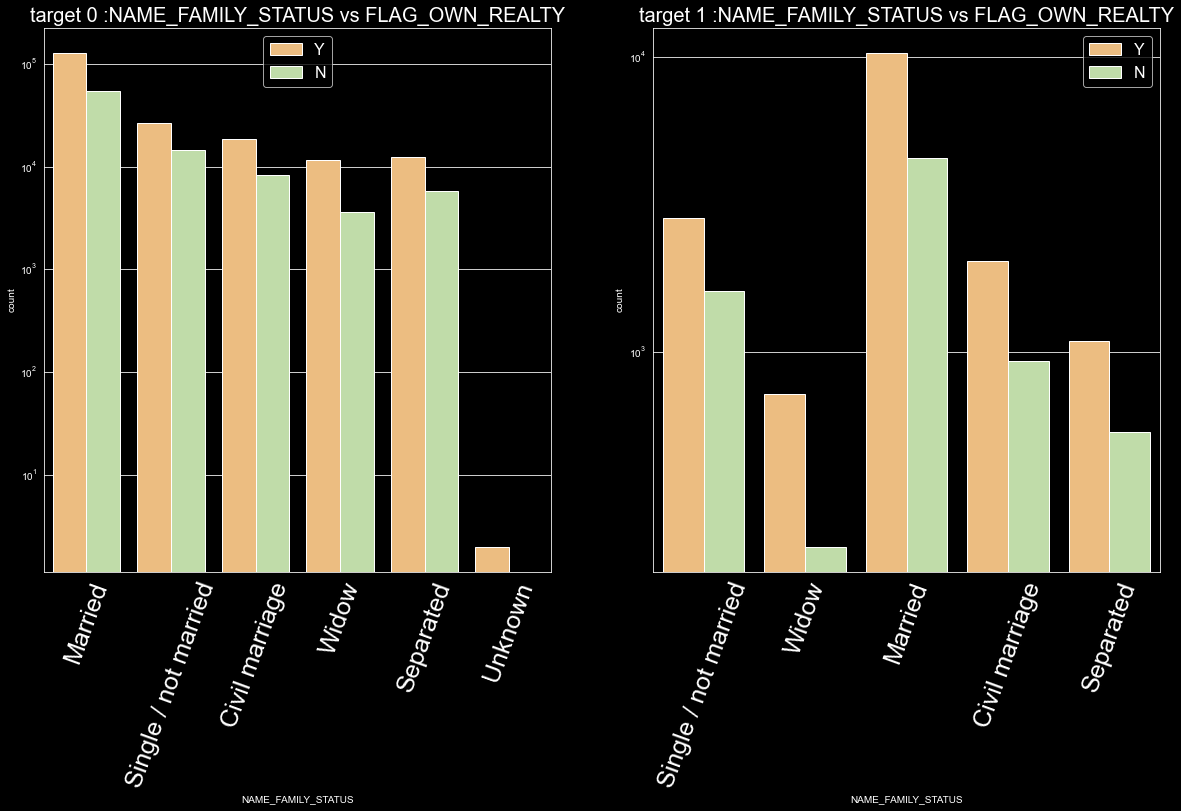

In [103]:
cat_cat(target_0,target_1,'NAME_FAMILY_STATUS',hue='FLAG_OWN_REALTY',scale='log',order=['Y','N'],rot=70)

<font color='purple'>**Comment -**</font> From the above plot it can be seen that clients who own their own realty are approaching the bank more often for the loans and are more prone to default than those who do not own the realty.

**INCOME_RANGE vs CODE_GENDER**

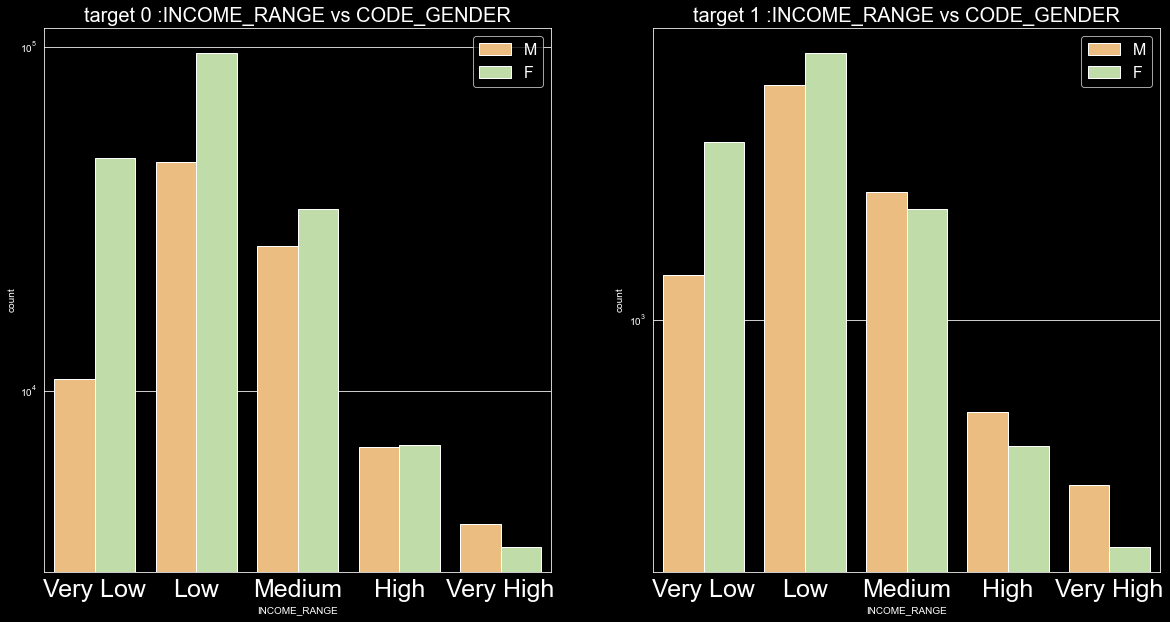

In [104]:
cat_cat(target_0,target_1,'INCOME_RANGE',hue='CODE_GENDER',scale='log',order=['M','F'],rot=0)

<font color='purple'>**Comment :**</font> Females are earning more than the males and there are more number of males that are earning very high amount. Females with either low or very low incomes are much likely to default than males but on the other hand males with higher incomes are defaulting more than females.

## <font color='purple'>3.3 Numerical Variables</font>

### 3.3.1 Univariate Analysis

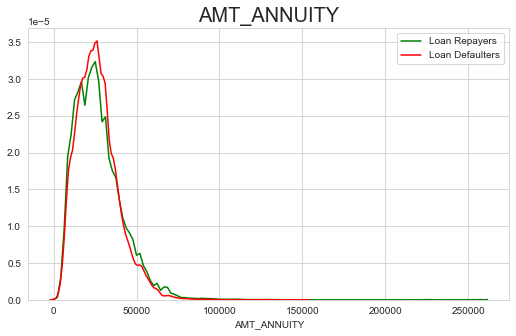

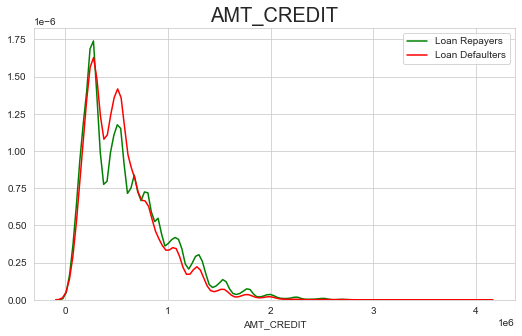

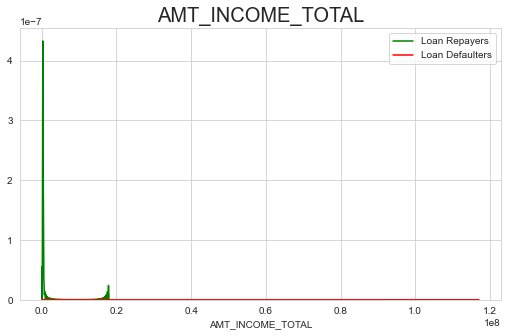

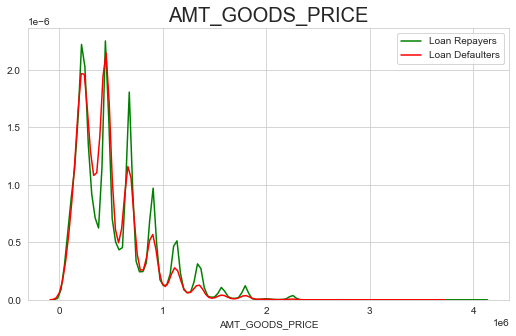

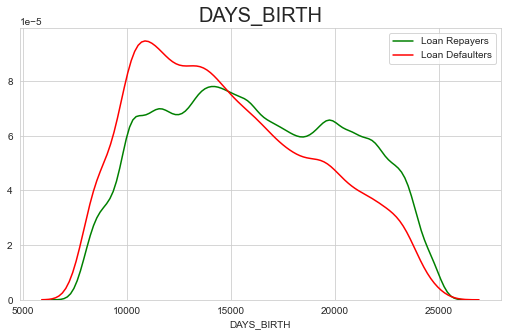

In [105]:
list_numerics=['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','DAYS_BIRTH']

def plots_numeric_univ(l):
        sns.set_style(style='whitegrid')
        fig=plt.figure(figsize=(50,5))
        plt.subplot(1,5,1)
        sns.distplot(target_0[l],hist=False,label='Loan Repayers',color='green')
        sns.distplot(target_1[l],hist=False,label='Loan Defaulters',color='red')
        plt.title(l,fontsize=20)
        plt.show()
        
for i in list_numerics:
    plots_numeric_univ(i)

<font color='purple'> **Comments :**</font>

> 1. For AMT_ANNUITY variable, most of the clients have the amount less than 50000 and default rate is higher than repayer rate. 

> 2. The clients having the Credit value less than 1M are applying more for the loans.

> 3. The clients are applying more for the loans for the goods price less than 1M and for the higher goods price clients are repaying loans

> 4. For DAYS_BIRTH variable, clients who are less than 40yrs of age are more prone to default on loans than the others.


### 3.3.2 Bivariate Analysis

In [106]:
# Creating the function for the numeric bivariate analysis

def plots_numeric_biv(x,y):
    sns.set_style(style='whitegrid')
    fig=plt.figure(figsize=(15,6))
    sns.scatterplot(data=target_0, y = y, x = x,label='Loan Repayers',color='darkcyan')
    sns.scatterplot(data=target_1, y = y, x = x,label='Loan Defaulters',color='red')
    plt.title(f'{x} vs {y}',fontsize=20)
    plt.show()

**AMT_ANNUITY vs AMT_GOODS_PRICE**

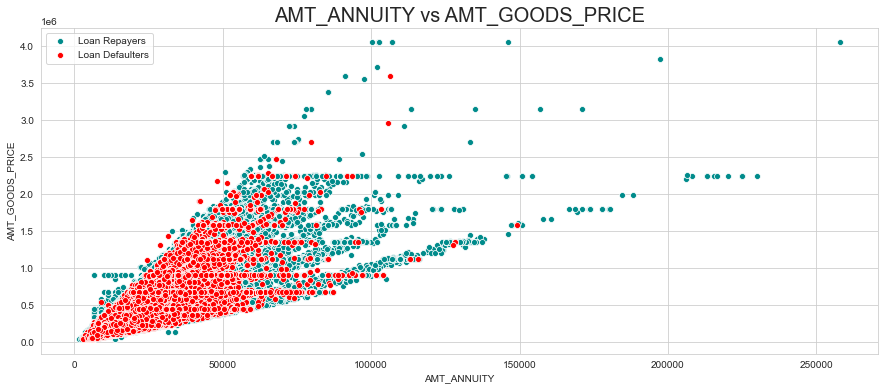

In [107]:
plots_numeric_biv('AMT_ANNUITY','AMT_GOODS_PRICE')

<font color='purple'>**Comment :**</font> The AMT_ANNUITY and AMT_GOODS_PRICE are correlated but the correlation is not that strong as the values are pretty much distributed for higher Annuity and Goods price values. Hence, for AMT_ANNUITY less than 70000 are more prone to default while values greater than 70000 the defaulters tend to decrease.

**AMT_ANNUITY vs AMT_CREDIT**

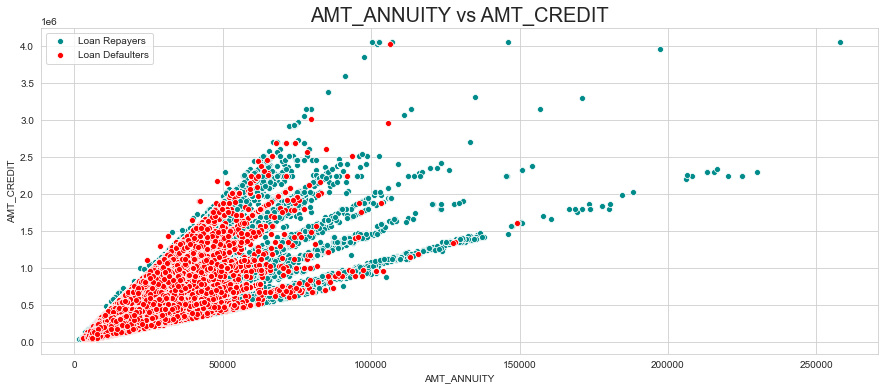

In [108]:
plots_numeric_biv('AMT_ANNUITY','AMT_CREDIT')

<font color='purple'>**Comment :**</font> The AMT_ANNUITY and AMT_CREDIT are fairly correlated with each other and the number of defaulters tend to go down as the  AMT_ANNUITY increases. Most of the defaulters are having AMT_ANNUITY values less than 60000.

**AMT_GOODS_PRICE vs AMT_CREDIT**

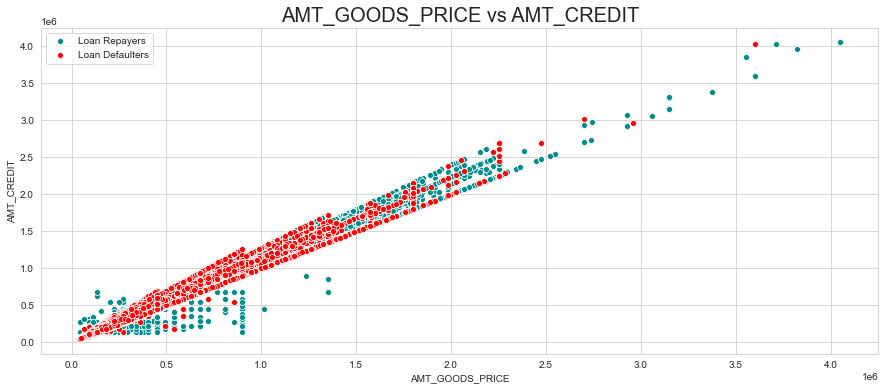

In [109]:
plots_numeric_biv('AMT_GOODS_PRICE','AMT_CREDIT')

<font color='purple'> **Comment :** </font> The graph show a pretty strong correlation between AMT_GOODS_PRICE and AMT_CREDIT, clients having high goods price are most likely to repay the loans as majority of defaulters are having goods price less than 1.4 million. 

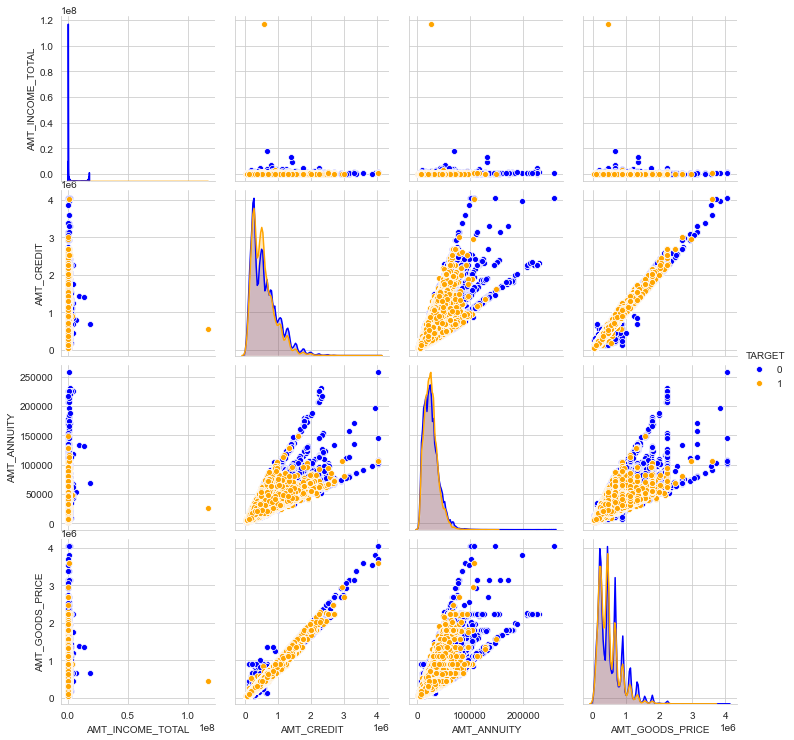

In [110]:
# PLotting the pairplot 
l=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
sns.pairplot(data = app1, vars=l,hue='TARGET',palette=['b','orange'])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

## 4. Correlation : Application Dataset

### <font color='purple'>TARGET 0 : Loan Repayer</font>

In [111]:
# Dropping the columns which are not required
cols_drop = ['SK_ID_CURR','AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

In [112]:
target_0 = target_0.drop(columns=cols_drop)

In [113]:
# Correlation matrix

corr = target_0.corr().abs()
corr

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                         NaN           NaN               NaN   
CNT_CHILDREN                   NaN      1.000000          0.027397   
AMT_INCOME_TOTAL               NaN      0.027397          1.000000   
AMT_CREDIT                     NaN      0.003081          0.342799   
AMT_ANNUITY                    NaN      0.020905          0.418953   
AMT_GOODS_PRICE                NaN      0.000525          0.349462   
REGION_POPULATION_RELATIVE     NaN      0.024363          0.167851   
DAYS_BIRTH                     NaN      0.336966          0.062609   
DAYS_EMPLOYED                  NaN      0.245174          0.140392   
DAYS_REGISTRATION              NaN      0.185792          0.064937   
DAYS_ID_PUBLISH                NaN      0.028751          0.022896   
CNT_FAM_MEMBERS                NaN      0.878571          0.034256   
REGION_RATING_CLIENT           NaN      0.022842          0.186573   
HOUR_APPR_PROCESS_START        NaN      0.005244          0.076743   

                            AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                             NaN          NaN              NaN   
CNT_CHILDREN                  0.003081     0.020905         0.000525   
AMT_INCOME_TOTAL              0.342799     0.418953         0.349462   
AMT_CREDIT                    1.000000     0.771309         0.987250   
AMT_ANNUITY                   0.771309     1.000000         0.776686   
AMT_GOODS_PRICE               0.987250     0.776686         1.000000   
REGION_POPULATION_RELATIVE    0.100604     0.120988         0.103827   
DAYS_BIRTH                    0.047378     0.012263         0.044565   
DAYS_EMPLOYED                 0.070104     0.104978         0.068609   
DAYS_REGISTRATION             0.013477     0.039436         0.015916   
DAYS_ID_PUBLISH               0.001464     0.014113         0.003649   
CNT_FAM_MEMBERS               0.064536     0.075787         0.062814   
REGION_RATING_CLIENT          0.103337     0.132128         0.104382   
HOUR_APPR_PROCESS_START       0.053619     0.053589         0.062766   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
TARGET                                             NaN         NaN   
CNT_CHILDREN                                  0.024363    0.336966   
AMT_INCOME_TOTAL                              0.167851    0.062609   
AMT_CREDIT                                    0.100604    0.047378   
AMT_ANNUITY                                   0.120988    0.012263   
AMT_GOODS_PRICE                               0.103827    0.044565   
REGION_POPULATION_RELATIVE                    1.000000    0.025244   
DAYS_BIRTH                                    0.025244    1.000000   
DAYS_EMPLOYED                                 0.007198    0.626114   
DAYS_REGISTRATION                             0.052083    0.333151   
DAYS_ID_PUBLISH                               0.001071    0.271314   
CNT_FAM_MEMBERS                               0.023425    0.285825   
REGION_RATING_CLIENT                          0.539005    0.002332   
HOUR_APPR_PROCESS_START                       0.172814    0.095916   

                            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
TARGET                                NaN                NaN              NaN   
CNT_CHILDREN                     0.245174           0.185792         0.028751   
AMT_INCOME_TOTAL                 0.140392           0.064937         0.022896   
AMT_CREDIT                       0.070104           0.013477         0.001464   
AMT_ANNUITY                      0.104978           0.039436         0.014113   
AMT_GOODS_PRICE                  0.068609           0.015916         0.003649   
REGION_POPULATION_RELATIVE       0.007198           0.052083         0.001071   
DAYS_BIRTH                       0.626114           0.333151         0.271314   
DAYS_EMPLOYED                    1.000000           0.214511         0.276663   
DAYS_REGISTRATION                0.

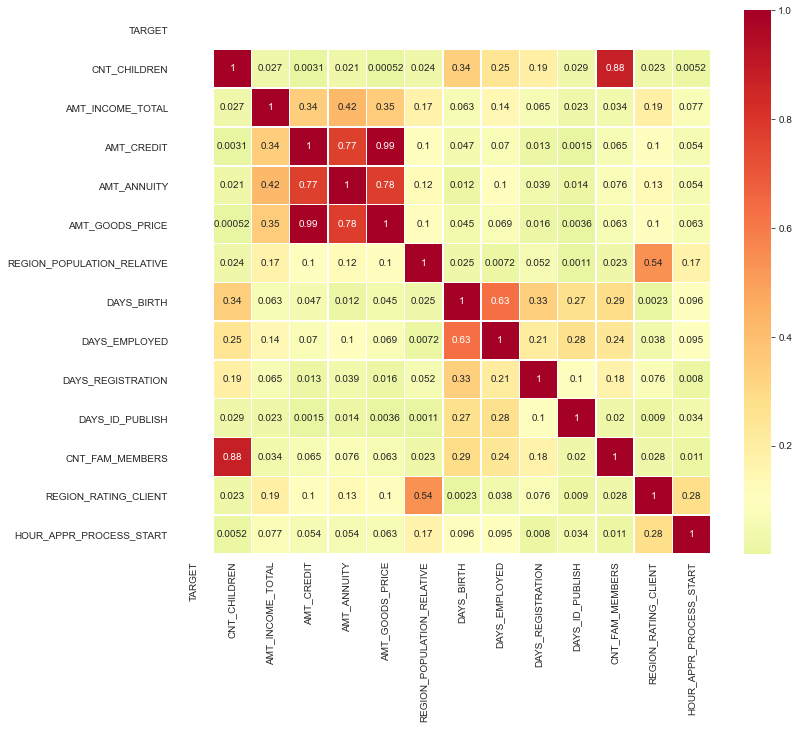

In [114]:
# Visualise the correlation using heatmaps

fig = plt.figure(figsize=(12,10))

sns.heatmap(data=corr,annot=True,cmap='RdYlGn_r',linewidths=.5,center=0.1)

plt.show()

In [115]:
# Unstacking the TARGET_0 variable
c = corr.abs()
s=c.unstack()

In [116]:
# Finding top 10 correlation among the people with no payment issues

target_0_corr = s[s.index.get_level_values(0)!= s.index.get_level_values(1)].sort_values(ascending=False,kind='quicksort').drop_duplicates()

df = pd.DataFrame(target_0_corr)

df = df.reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'}).dropna()

df.head(10)

Var1                  Var2  Correlation
0             AMT_GOODS_PRICE            AMT_CREDIT     0.987250
1                CNT_CHILDREN       CNT_FAM_MEMBERS     0.878571
2             AMT_GOODS_PRICE           AMT_ANNUITY     0.776686
3                  AMT_CREDIT           AMT_ANNUITY     0.771309
4                  DAYS_BIRTH         DAYS_EMPLOYED     0.626114
5  REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT     0.539005
6            AMT_INCOME_TOTAL           AMT_ANNUITY     0.418953
7             AMT_GOODS_PRICE      AMT_INCOME_TOTAL     0.349462
8                  AMT_CREDIT      AMT_INCOME_TOTAL     0.342799
9                  DAYS_BIRTH          CNT_CHILDREN     0.336966

### <font color='purple'>TARGET 1 : Loan Defaulter</font>

In [117]:
# Drop the columns which are not required
target_1 = target_1.drop(columns=cols_drop)

In [118]:
# Creating the correlation matrix for the Loan defaulter data frame
corr_t1 = target_1.corr().abs()

corr_t1

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                         NaN           NaN               NaN   
CNT_CHILDREN                   NaN      1.000000          0.004796   
AMT_INCOME_TOTAL               NaN      0.004796          1.000000   
AMT_CREDIT                     NaN      0.001675          0.038131   
AMT_ANNUITY                    NaN      0.031257          0.046421   
AMT_GOODS_PRICE                NaN      0.008112          0.037583   
REGION_POPULATION_RELATIVE     NaN      0.031975          0.009135   
DAYS_BIRTH                     NaN      0.259109          0.003096   
DAYS_EMPLOYED                  NaN      0.192864          0.014977   
DAYS_REGISTRATION              NaN      0.149154          0.000158   
DAYS_ID_PUBLISH                NaN      0.032299          0.004215   
CNT_FAM_MEMBERS                NaN      0.885484          0.006654   
REGION_RATING_CLIENT           NaN      0.040680          0.021486   
HOUR_APPR_PROCESS_START        NaN      0.023899          0.013775   

                            AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                             NaN          NaN              NaN   
CNT_CHILDREN                  0.001675     0.031257         0.008112   
AMT_INCOME_TOTAL              0.038131     0.046421         0.037583   
AMT_CREDIT                    1.000000     0.752195         0.983103   
AMT_ANNUITY                   0.752195     1.000000         0.752699   
AMT_GOODS_PRICE               0.983103     0.752699         1.000000   
REGION_POPULATION_RELATIVE    0.069161     0.071690         0.076049   
DAYS_BIRTH                    0.135316     0.014303         0.135810   
DAYS_EMPLOYED                 0.001930     0.081207         0.006642   
DAYS_REGISTRATION             0.025854     0.034279         0.025679   
DAYS_ID_PUBLISH               0.052329     0.016767         0.056086   
CNT_FAM_MEMBERS               0.051224     0.075711         0.047388   
REGION_RATING_CLIENT          0.059193     0.073784         0.066390   
HOUR_APPR_PROCESS_START       0.031782     0.031236         0.044315   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
TARGET                                             NaN         NaN   
CNT_CHILDREN                                  0.031975    0.259109   
AMT_INCOME_TOTAL                              0.009135    0.003096   
AMT_CREDIT                                    0.069161    0.135316   
AMT_ANNUITY                                   0.071690    0.014303   
AMT_GOODS_PRICE                               0.076049    0.135810   
REGION_POPULATION_RELATIVE                    1.000000    0.048190   
DAYS_BIRTH                                    0.048190    1.000000   
DAYS_EMPLOYED                                 0.015532    0.582185   
DAYS_REGISTRATION                             0.056222    0.289114   
DAYS_ID_PUBLISH                               0.015537    0.252863   
CNT_FAM_MEMBERS                               0.030163    0.203267   
REGION_RATING_CLIENT                          0.443236    0.033928   
HOUR_APPR_PROCESS_START                       0.142744    0.062172   

                            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
TARGET                                NaN                NaN              NaN   
CNT_CHILDREN                     0.192864           0.149154         0.032299   
AMT_INCOME_TOTAL                 0.014977           0.000158         0.004215   
AMT_CREDIT                       0.001930           0.025854         0.052329   
AMT_ANNUITY                      0.081207           0.034279         0.016767   
AMT_GOODS_PRICE                  0.006642           0.025679         0.056086   
REGION_POPULATION_RELATIVE       0.015532           0.056222         0.015537   
DAYS_BIRTH                       0.582185           0.289114         0.252863   
DAYS_EMPLOYED                    1.000000           0.192455         0.229090   
DAYS_REGISTRATION                0.

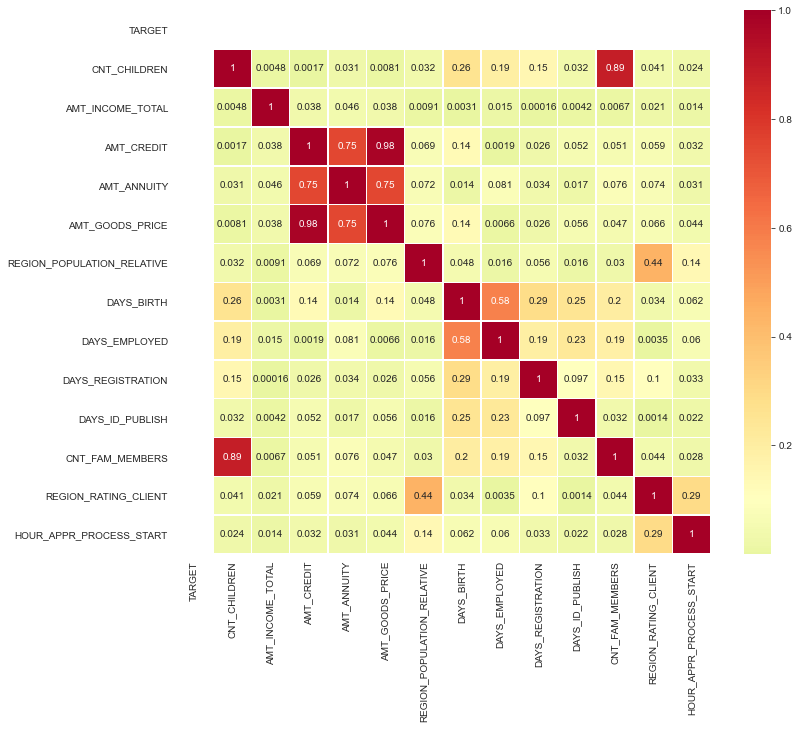

In [119]:
# PLotting the heatmap 
fig = plt.figure(figsize=(12,10))

sns.heatmap(data=corr_t1,annot=True,cmap='RdYlGn_r',linewidths=0.5,center=0.1)

plt.show()

In [120]:
c1 = corr_t1

s1 = c1.unstack()

In [121]:
# Top 10 Correlations from target_1 : Loan Defaulter data frame

target_1_corr = s1[s1.index.get_level_values(0)!= s1.index.get_level_values(1)].sort_values(ascending=False,kind='quicksort').drop_duplicates()

df = pd.DataFrame(target_1_corr)

df = df.reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'}).dropna()

df.head(10)

Var1                  Var2  Correlation
0             AMT_GOODS_PRICE            AMT_CREDIT     0.983103
1             CNT_FAM_MEMBERS          CNT_CHILDREN     0.885484
2                 AMT_ANNUITY       AMT_GOODS_PRICE     0.752699
3                 AMT_ANNUITY            AMT_CREDIT     0.752195
4                  DAYS_BIRTH         DAYS_EMPLOYED     0.582185
5  REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT     0.443236
6     HOUR_APPR_PROCESS_START  REGION_RATING_CLIENT     0.293908
7           DAYS_REGISTRATION            DAYS_BIRTH     0.289114
8                CNT_CHILDREN            DAYS_BIRTH     0.259109
9                  DAYS_BIRTH       DAYS_ID_PUBLISH     0.252863

#### <font color='purple'>Comments </font>:

> For target variable there is no correlation as there are empty space in the graph and NAN in the tables while comparing with other variables.

> Credit amount is highly correlated with amount of goods price which is slightly different from target 0 i.e Loan Repayers.

> The correlation is strong between family member and children counts, although the correlation increases for the defaulters.

> The loan annuity correlation with credit amount and also with goods price has slightly reduced in defaulters(0.748) when compared to repayers(0.777)

> We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).

> Days_birth and number of children correlation has reduced to 0.256 in defaulters when compared to 0.336 in repayers.

## 5. Previous Application Dataset

### <font color='purple'>**5.1 Loading the Data**</font>

In [122]:
# Fetching the dataset

## 'app' variable takes the dataset application_data.csv as Data Frame

f = path2
# Count the lines
num_lines = sum(1 for l in open(f))
# Sample size - in this case ~50%
size = int(num_lines // 2)
# The row indices to skip - make sure 0 is not included to keep the header!
rd.seed(100)
skip_idx = rd.sample(range(1, num_lines), num_lines - size)
# Read the data
prev_app = pd.read_csv(f, skiprows=skip_idx)

prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2819243      176158         Cash loans    47041.335         450000.0   
1     1784265      202054         Cash loans    31924.395         337500.0   
2     1383531      199383         Cash loans    23703.930         315000.0   
3     2315218      175704         Cash loans          NaN              0.0   
4     2367563      342292         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0    470790.0               NaN         450000.0                     MONDAY   
1    404055.0               NaN         337500.0                   THURSDAY   
2    340573.5               NaN         315000.0                   SATURDAY   
3         0.0               NaN              NaN                    TUESDAY   
4         0.0               NaN              NaN                     MONDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                        7                           Y   
1                        9                           Y   
2                        8                           Y   
3                       11                           Y   
4                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                NaN                    NaN   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       NaN                    XNA             Approved   
1                       NaN                Repairs              Refused   
2                       NaN      Everyday expenses             Approved   
3                       NaN                    XNA             Canceled   
4                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
0           -512  Cash through the bank                XAP             NaN   
1           -781  Cash through the bank                 HC             NaN   
2           -684  Cash through the bank                XAP          Family   
3            -14                    XNA                XAP             NaN   
4           -386                    XNA                XAP             NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater                 XNA           Cash            x-sell   
1         Repeater                 XNA           Cash           walk-in   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA            XNA               XNA   
4         Repeater                 XNA            XNA               XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0  Credit and cash offices                -1                  XNA   
1  Credit and cash offices                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  Cash X-Sell: middle            365243.0   
1         24.0             high    Cash Street: high                 NaN   
2         18.0       low_normal     Cash X-Sell: low            365243.0   
3          NaN              XNA                 Cash                 NaN   
4          NaN              XNA                 Cash                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VER

In [123]:
# Shape of the dataset
prev_app.shape

(835106, 37)

In [124]:
# Missing values check
prev_app.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    186157
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               448144
AMT_GOODS_PRICE                192907
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              448144
RATE_INTEREST_PRIMARY          832160
RATE_INTEREST_PRIVILEGED       832160
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                409907
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_

In [125]:
# Setting the style for the plots
sns.set_style(style='whitegrid')

In [126]:
# Converting the absolute missing values into percentage

missing_prev = ((prev_app.isna().sum() / prev_app.shape[0])*100)

cols1 = missing_prev.index.to_list()

vals1 = missing_prev.to_list()

missing_prev_app = pd.DataFrame({'Columns':cols1,'Missing_prev_Percentage':vals1})

missing_prev_app.sort_values(by='Missing_prev_Percentage')

Columns  Missing_prev_Percentage
0                    SK_ID_PREV                 0.000000
29             NAME_YIELD_GROUP                 0.000000
27         NAME_SELLER_INDUSTRY                 0.000000
26             SELLERPLACE_AREA                 0.000000
25                 CHANNEL_TYPE                 0.000000
24            NAME_PRODUCT_TYPE                 0.000000
23               NAME_PORTFOLIO                 0.000000
22          NAME_GOODS_CATEGORY                 0.000000
21             NAME_CLIENT_TYPE                 0.000000
19           CODE_REJECT_REASON                 0.000000
17                DAYS_DECISION                 0.000000
16         NAME_CONTRACT_STATUS                 0.000000
15       NAME_CASH_LOAN_PURPOSE                 0.000000
18            NAME_PAYMENT_TYPE                 0.000000
4               AMT_APPLICATION                 0.000000
11       NFLAG_LAST_APPL_IN_DAY                 0.000000
10  FLAG_LAST_APPL_PER_CONTRACT                 0.000000
9       HOUR_APPR_PROCESS_START                 0.000000
8    WEEKDAY_APPR_PROCESS_START                 0.000000
2            NAME_CONTRACT_TYPE                 0.000000
1                    SK_ID_CURR                 0.000000
5                    AMT_CREDIT                 0.000120
30          PRODUCT_COMBINATION                 0.020237
28                  CNT_PAYMENT                22.290943
3                   AMT_ANNUITY                22.291422
7               AMT_GOODS_PRICE                23.099702
34                DAYS_LAST_DUE                40.332844
33    DAYS_LAST_DUE_1ST_VERSION                40.332844
32               DAYS_FIRST_DUE                40.332844
31           DAYS_FIRST_DRAWING                40.332844
36    NFLAG_INSURED_ON_APPROVAL                40.332844
35             DAYS_TERMINATION                40.332844
20              NAME_TYPE_SUITE                49.084428
6              AMT_DOWN_PAYMENT                53.663128
12            RATE_DOWN_PAYMENT                53.663128
13        RATE_INTEREST_PRIMARY                99.647230
14     RATE_INTEREST_PRIVILEGED                99.647230

### <font color='purple'>5.2 Missing Values check</font>

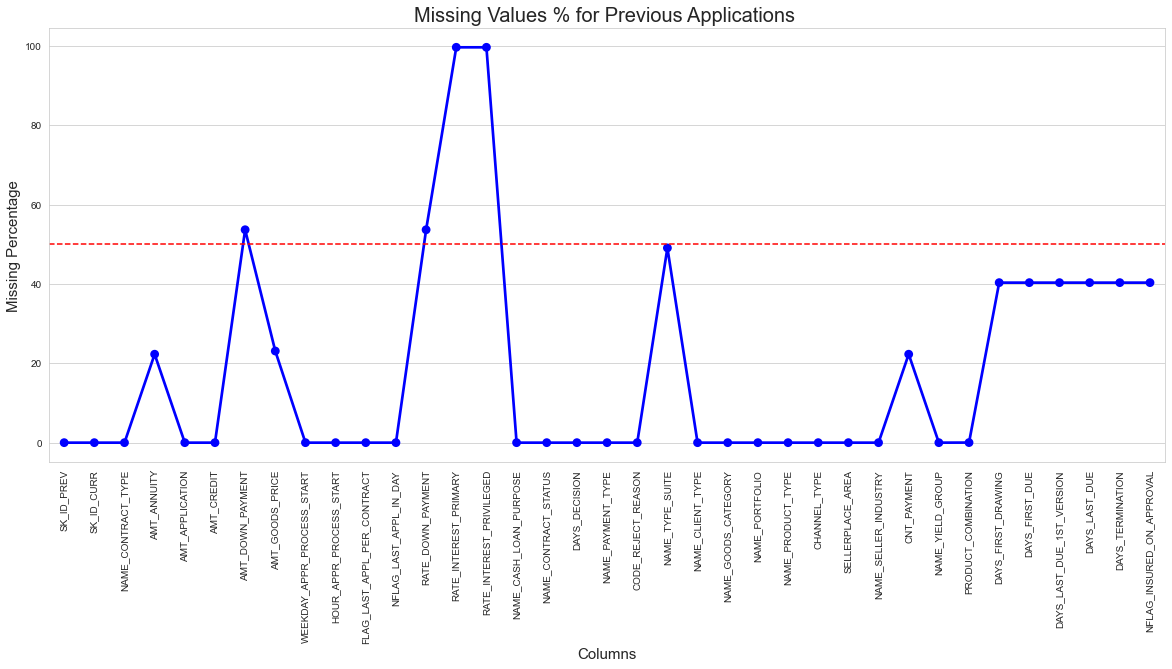

In [127]:
# Plot for missing values in previous application data frame
fig = plt.figure(figsize=(20,8))

ax = sns.pointplot(data = missing_prev_app, x='Columns', y = missing_prev_app.Missing_prev_Percentage,color='blue')

ax.axhline(50,color='red',linestyle='--')

ax.set_title('Missing Values % for Previous Applications ',fontsize=20)

ax.set_xlabel('Columns',fontsize=15)

ax.set_ylabel('Missing Percentage',fontsize=15)

ax.set_xticklabels(labels=cols1,rotation=90)


plt.show()


In [128]:
# Dropping the columns with more than 50 % missing values
prev_app.drop(columns=missing_prev[missing_prev>=50].index,inplace=True)

In [129]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835106 entries, 0 to 835105
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   835106 non-null  int64  
 1   SK_ID_CURR                   835106 non-null  int64  
 2   NAME_CONTRACT_TYPE           835106 non-null  object 
 3   AMT_ANNUITY                  648949 non-null  float64
 4   AMT_APPLICATION              835106 non-null  float64
 5   AMT_CREDIT                   835105 non-null  float64
 6   AMT_GOODS_PRICE              642199 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   835106 non-null  object 
 8   HOUR_APPR_PROCESS_START      835106 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  835106 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       835106 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       835106 non-null  object 
 12  NAME_CONTRACT_STATUS         835106 non-null  object 
 13 

In [130]:
prev_app.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  8.351060e+05  835106.000000  648949.000000     8.351060e+05   
mean   1.922362e+06  278445.936472   15942.954125     1.752367e+05   
std    5.324559e+05  102793.282294   14794.574856     2.928972e+05   
min    1.000002e+06  100001.000000       0.000000     0.000000e+00   
25%    1.461144e+06  189425.250000    6315.300000     1.862550e+04   
50%    1.921814e+06  278828.000000   11250.000000     7.104600e+04   
75%    2.382905e+06  367725.000000   20631.420000     1.801755e+05   
max    2.845379e+06  456255.000000  418058.145000     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  8.351050e+05     6.421990e+05            835106.000000   
mean   1.960678e+05     2.279025e+05                12.486569   
std    3.185849e+05     3.155521e+05                 3.335357   
min    0.000000e+00     0.000000e+00                 0.000000   
25%    2.412000e+04     5.080050e+04                10.000000   
50%    8.055450e+04     1.124460e+05                12.000000   
75%    2.162430e+05     2.340000e+05                15.000000   
max    4.509688e+06     5.850000e+06                23.000000   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA    CNT_PAYMENT  \
count           835106.000000  835106.000000      8.351060e+05  648953.000000   
mean                 0.996429    -880.686149      3.181121e+02      16.047421   
std                  0.059649     778.563336      7.771325e+03      14.557805   
min                  0.000000   -2922.000000     -1.000000e+00       0.000000   
25%                  1.000000   -1301.000000     -1.000000e+00       6.000000   
50%                  1.000000    -582.000000      3.000000e+00      12.000000   
75%                  1.000000    -280.000000      8.200000e+01      24.000000   
max                  1.000000      -1.000000      4.000000e+06      84.000000   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       498284.000000   498284.000000              498284.000000   
mean        342063.161045    13807.887273               33870.447082   
std          89179.482184    72400.969919              106999.045756   
min          -2922.000000    -2892.000000               -2801.000000   
25%         365243.000000    -1626.000000               -1241.000000   
50%         365243.000000     -831.000000                -361.000000   
75%         365243.000000     -412.000000                 130.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  498284.000000     498284.000000              498284.000000  
mean    76721.798621      82084.980212                   0.332937  
std    149745.143326     153363.423831                   0.471265  
min     -2889.000000      -2870.000000                   0.000000  
25%     -1312.000000      -1269.000000                   0.000000  
50%      -537.000000       -498.000000                   0.000000  
75%       -73.000000        -43.000000                   1.000000  
max    365243.000000     365243.000000                   1.000000

## 6. Merged Dataset

In [131]:
# Merge the datasets
merged_df = app1.merge(right=prev_app,on='SK_ID_CURR')

In [132]:
# Check the shape of the data
merged_df.shape

(706801, 73)

In [133]:
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100004       0      Revolving loans           M            Y   
4      100006       0           Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               Y             0           67500.0      135000.0   
4               Y             0          135000.0      312682.5   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3         6750.0           135000.0     Unaccompanied          Working   
4        29686.5           297000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.003541       16765           1188               1186   
3                    0.010032       19046            225               4260   
4                    0.008019       19005           3039               9833   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2              291      Core staff              2.0                     1   
3             2531        Laborers              1.0                     2   
4             2437        Laborers              2.0                     2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                          9   
4                    WEDNESDAY                         17   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                         2                         2   
1                  School                         1                         0   
2                  School                         1                         0   
3              Government                         0                         0   
4  Business Entity Type 3                         2                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         1                         0   
3                         0                         0   
4                         2                         0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1         

<font color='purple'>**Comment :**</font> After merging the datasets if was found that some columns have the name for example, `abc_x` and `abc_y`  so `x` - **means that the column represents the application dataset columns** and `y` - **represents the columns from the previous application dataset**.

**DAYS_DECISION Variable**

In [134]:
merged_df['DAYS_DECISION'] = merged_df['DAYS_DECISION'].abs()

<font color='purple'>**Comment :**</font> The values has some negative values so let's convert them into positive

In [135]:
merged_df.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
TARGET                               2
NAME_CONTRACT_TYPE_x                 2
CODE_GENDER                          2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_PRODUCT_TYPE                    3
REGION_RATING_CLIENT                 3
NAME_PAYMENT_TYPE                    4
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_TYPE_y                 4
NAME_CONTRACT_STATUS                 4
ANNUITY_RANGE                        5
AGE_RANGE                            5
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   5
NAME_YIELD_GROUP                     5
NAME_PORTFOLIO                       5
AMT_REQ_CREDIT_BUREAU_HOUR           5
CREDIT_RANGE                         5
INCOME_RANGE                         5
NAME_HOUSING_TYPE                    6
WEEKDAY_APPR_PROCESS_START_y         7
WEEKDAY_APPR_PROCESS_STAR

## <font color='purple'>6.1 Categorical Variables</font>

In [136]:
# Dividing the merged dataset into two parts on the basis of Loan Approval and Loan Refusal

df1= merged_df[merged_df['NAME_CONTRACT_STATUS']=='Approved']

df2= merged_df[merged_df['NAME_CONTRACT_STATUS']=='Refused']

df3= merged_df[merged_df['NAME_CONTRACT_STATUS']=='Canceled']

In [137]:
# Function to analyze the categorical columns

def cat_1(x,hue,scale='linear',order=None,rot=90,hspc=0.3):
    plt.figure(figsize=(25,25))
    
    plt.subplots_adjust(wspace=0.3,hspace=hspc)
    plt.subplot(2,2,1)
    sns.countplot(data = df1,x=x,hue=hue,hue_order=order,palette=['darkcyan','darkgrey'])
    plt.title(f'Approved :{x} ',fontsize=20)
    plt.yscale(scale)
    plt.xticks(rotation=rot,fontsize=18)
    plt.yticks(fontsize=15)
    plt.legend(labels=['Loan Repayers','Loan Defaulters'],fontsize=16)
        
    plt.subplot(2,2,2)
    sns.countplot(data = df2,x=x,hue=hue,hue_order=order,palette=['darkcyan','darkgrey'])
    plt.title(f'Refused :{x} ',fontsize=20)
    plt.yscale(scale)
    plt.xticks(rotation=rot,fontsize=18)
    plt.yticks(fontsize=15)
    plt.legend(labels=['Loan Repayers','Loan Defaulters'],fontsize=16)
    
    # default % in approval
    ax=(df1.groupby(by=x)['TARGET'].mean()*100).sort_values()
    
    
    plt.subplot(2,2,3)
    a = sns.barplot(x=ax.index,y=ax)
    a.set_title(f'Default % in Approval : {x}',fontsize=20)
    a.set_yscale('linear')
    plt.setp(a.xaxis.get_majorticklabels(), rotation=rot,fontsize=18)
    plt.setp(a.yaxis.get_majorticklabels(),fontsize=18)
    
    
    # default % in refused
    ax1=(df2.groupby(by=x)['TARGET'].mean()*100).sort_values()
    
    plt.subplot(2,2,4)
    a = sns.barplot(x=ax1.index,y=ax1)
    a.set_title(f'Default % in Refusal : {x}',fontsize=20)
    a.set_yscale('linear')
    plt.setp(a.xaxis.get_majorticklabels(), rotation=rot,fontsize=18)
    plt.setp(a.yaxis.get_majorticklabels(),fontsize=18)
    
    plt.show()
    return None

**NAME_CLIENT_TYPE**

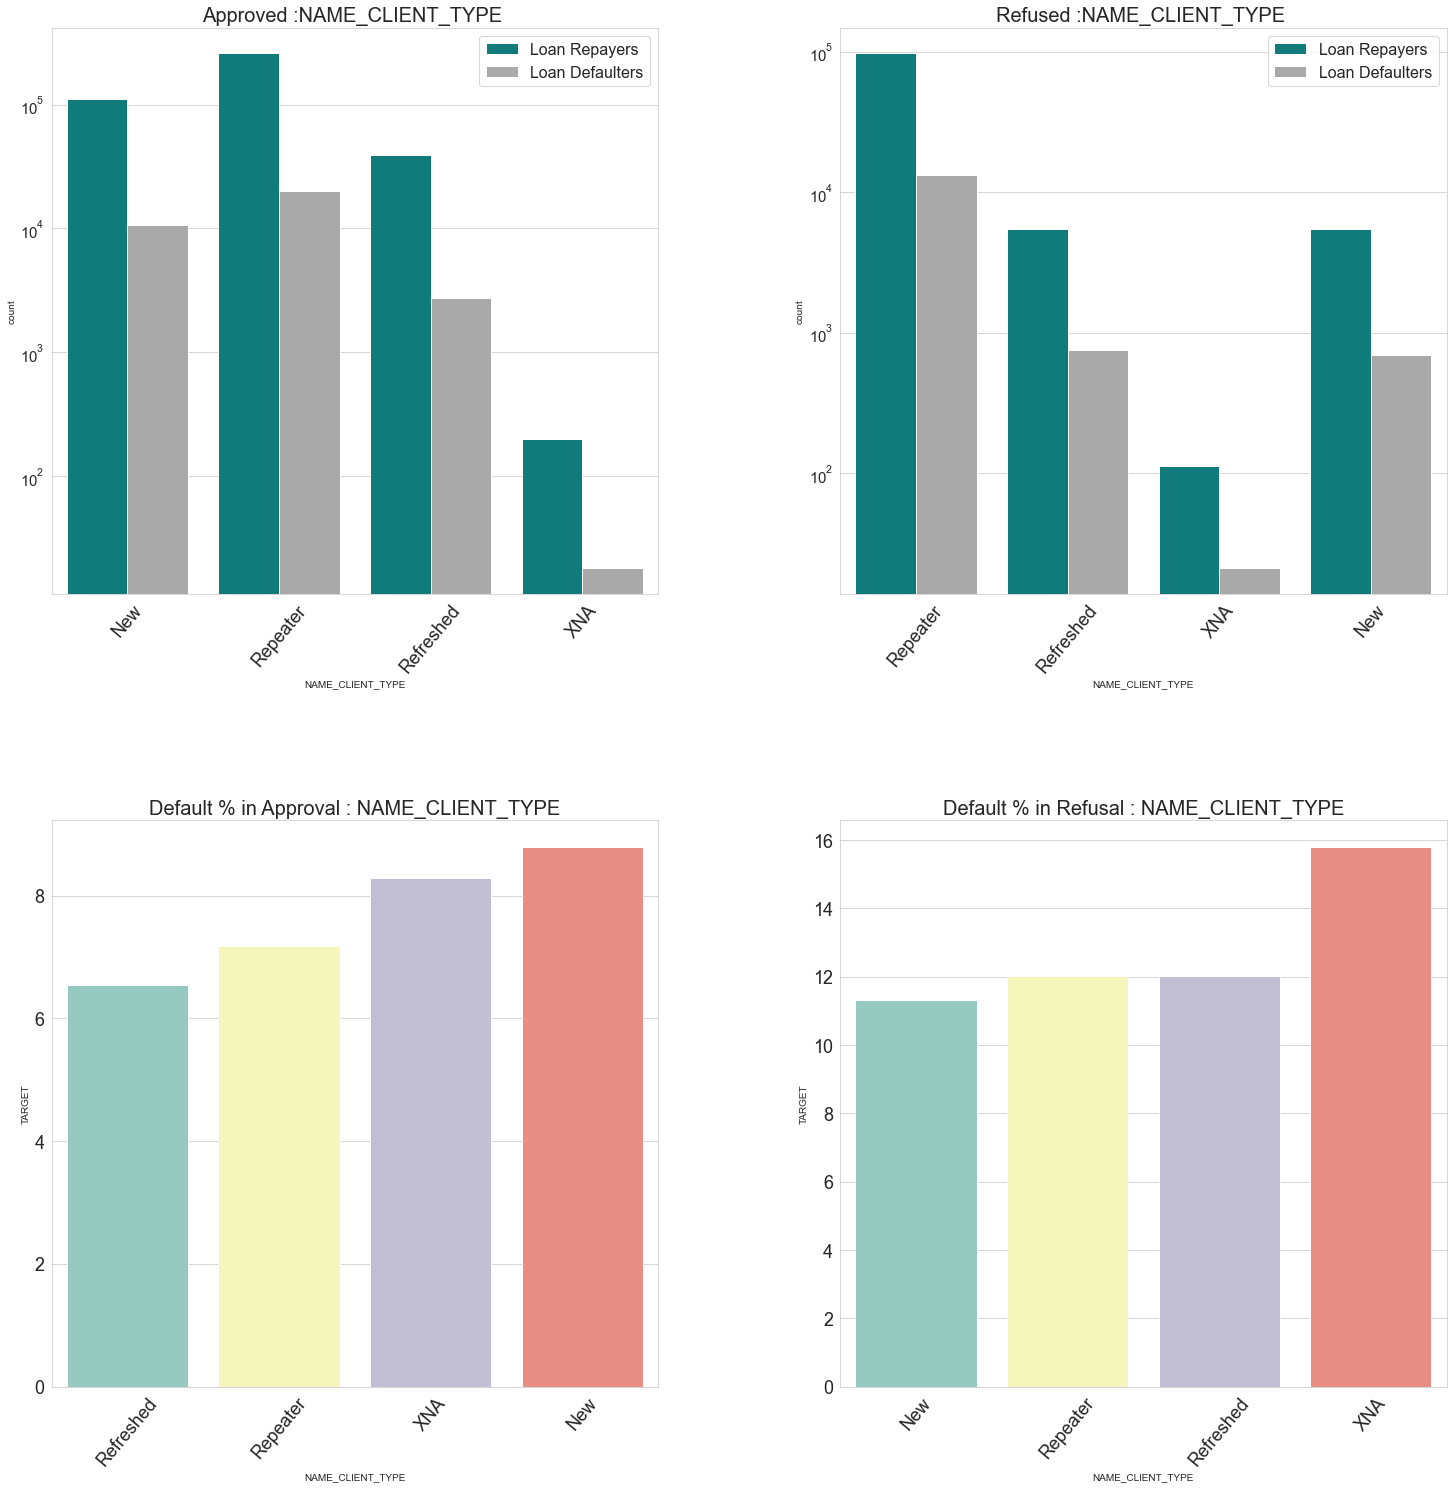

In [138]:
cat_1(x='NAME_CLIENT_TYPE',hue='TARGET',scale='log',rot=50,hspc=0.4)

<font color='purple'>**Comment :**</font> The bank is approving loans for repeater and new clients where new clients are actually making more defaults than the repeaters. So, bank should primarily focus more on refreshed/repeaters.

**PRODUCT_COMBINATION**

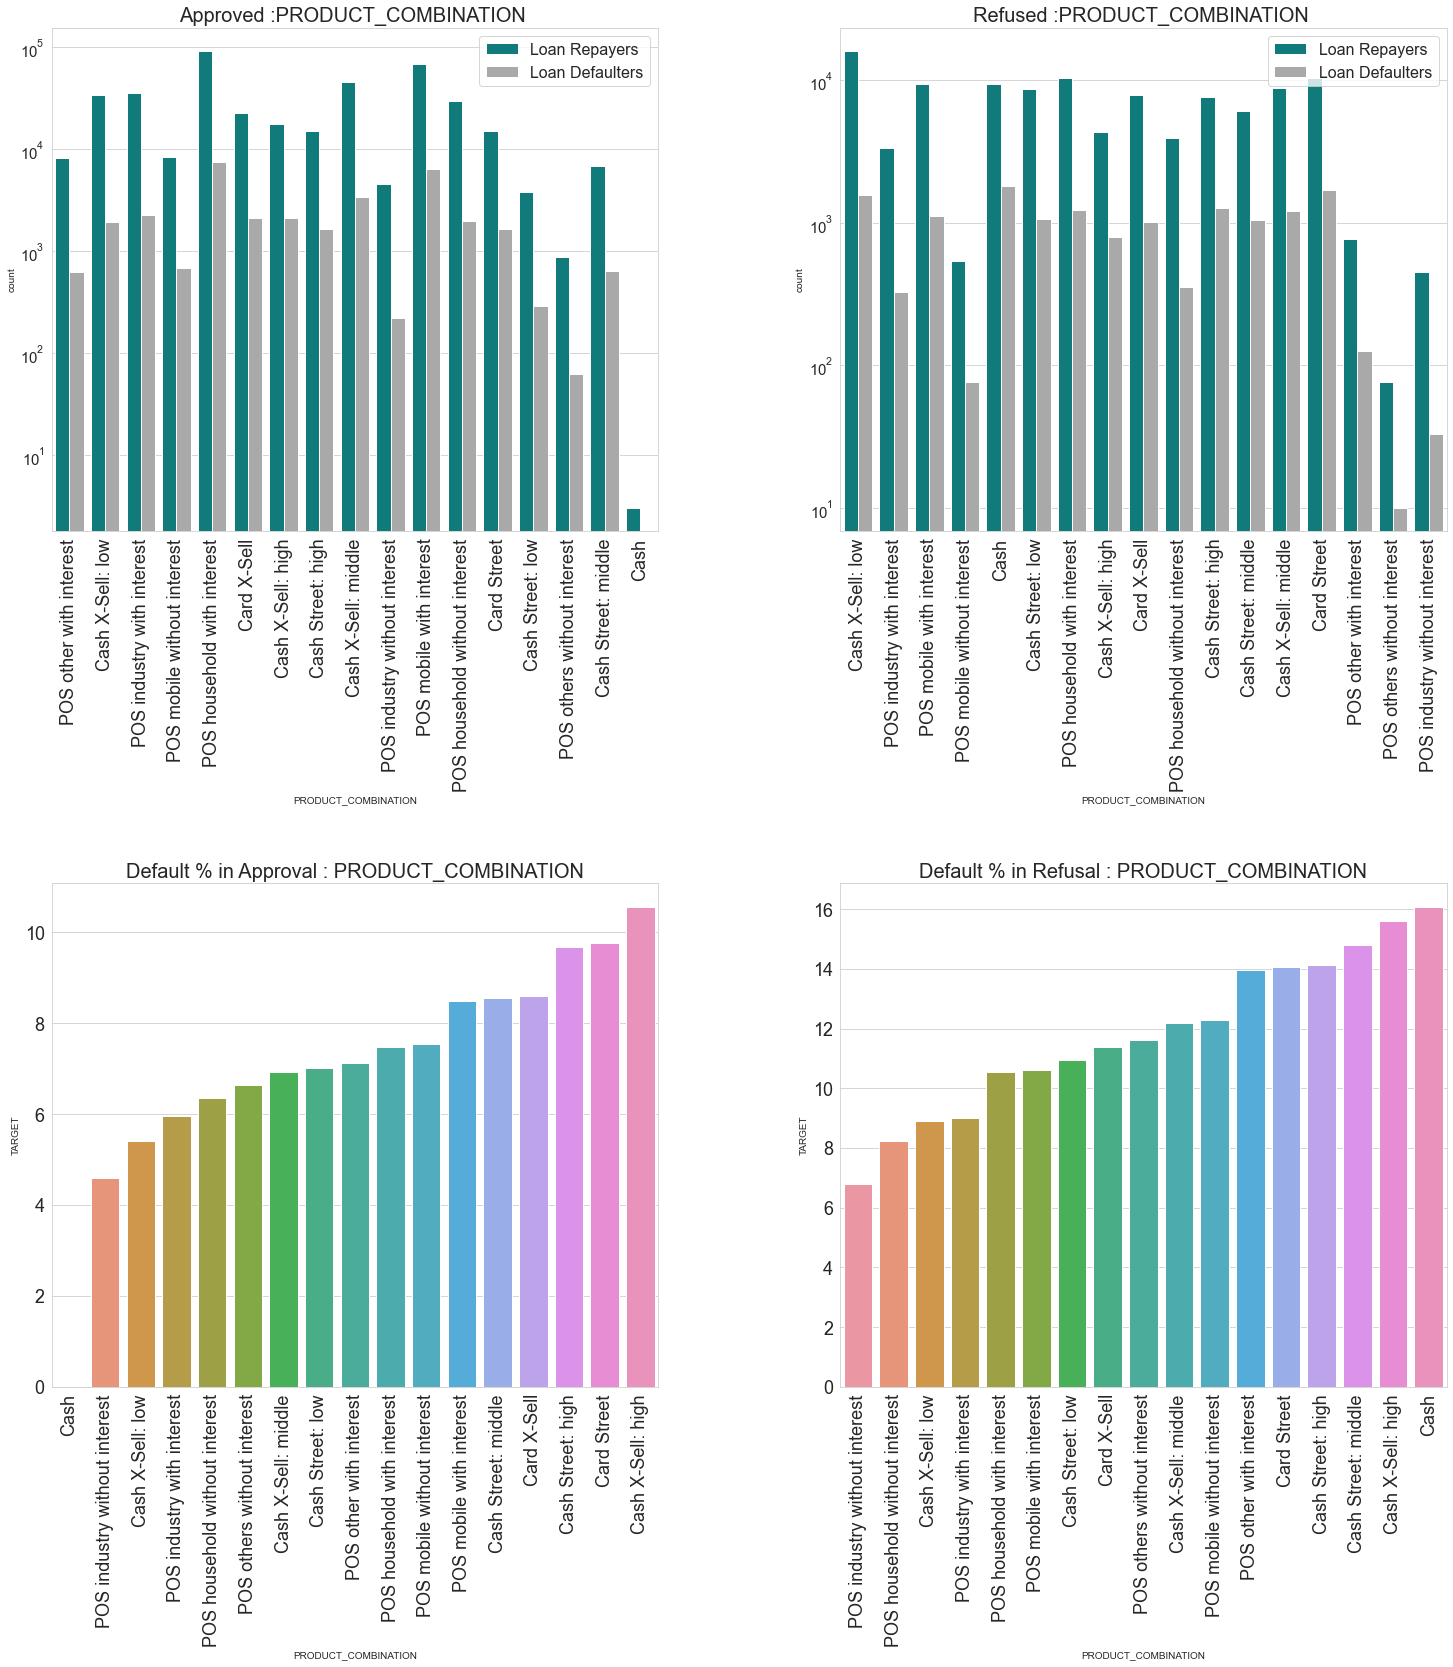

In [139]:
cat_1(x='PRODUCT_COMBINATION',hue='TARGET',scale='log',hspc=0.7)

<font color='purple'>**Comment :**</font> Bank has approved the loans highly for POS categories and they are less likely to default than other categories like cash X / car, hence, bank can consider to give out loans POS categories more.

**NAME_SELLER_INDUSTRY**

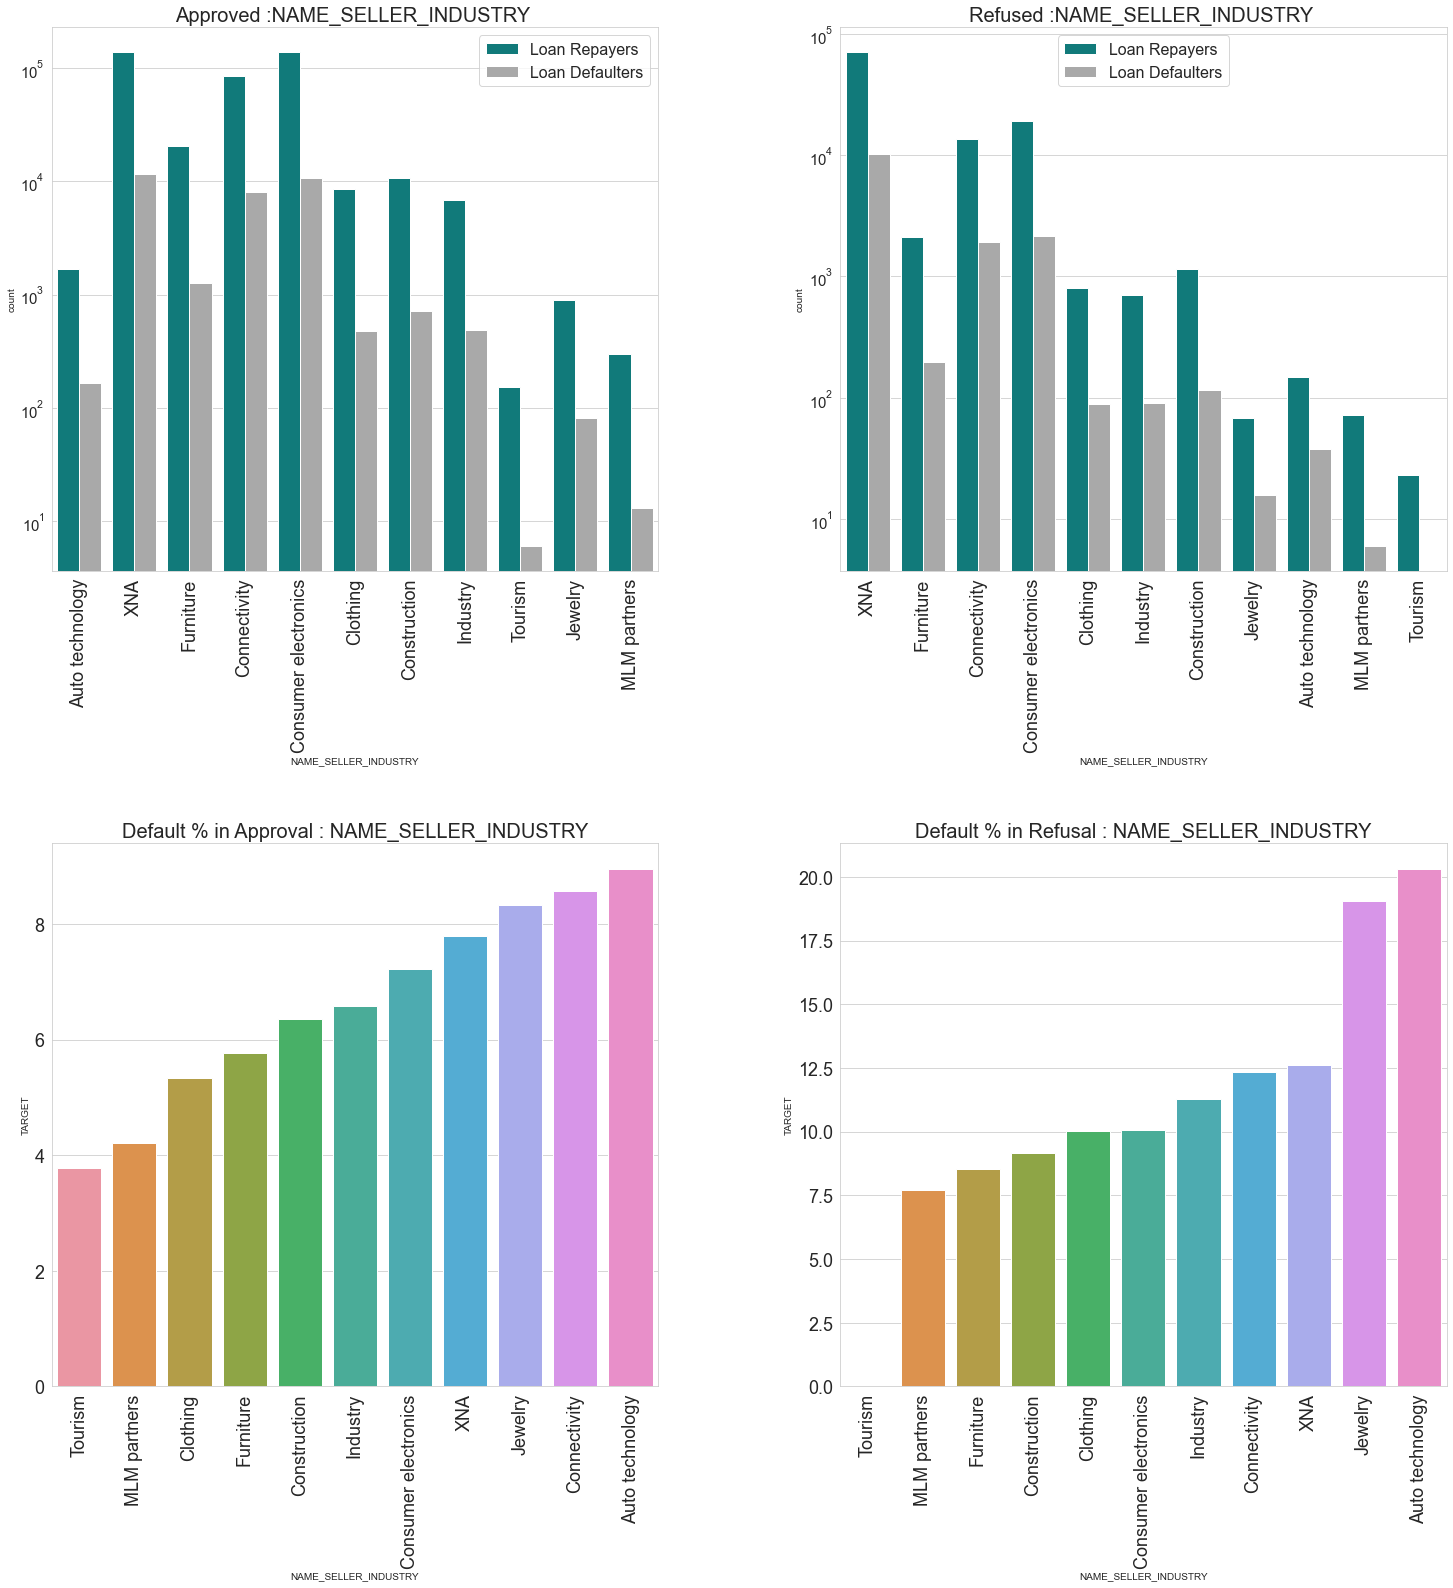

In [140]:
cat_1(x='NAME_SELLER_INDUSTRY',hue='TARGET',scale='log',hspc=0.5)

<font color='purple'>**Comment :**</font> While looking at the distribution graphs, bank is giving loans more towards the categories like consumer electronics,connectivity,furniture. The most of the default done by the category is Auto technology. Hence, banks should approve more loans for the categories like tourism, furniture, clothing, consumer electronics.

**NAME_PRODUCT_TYPE**

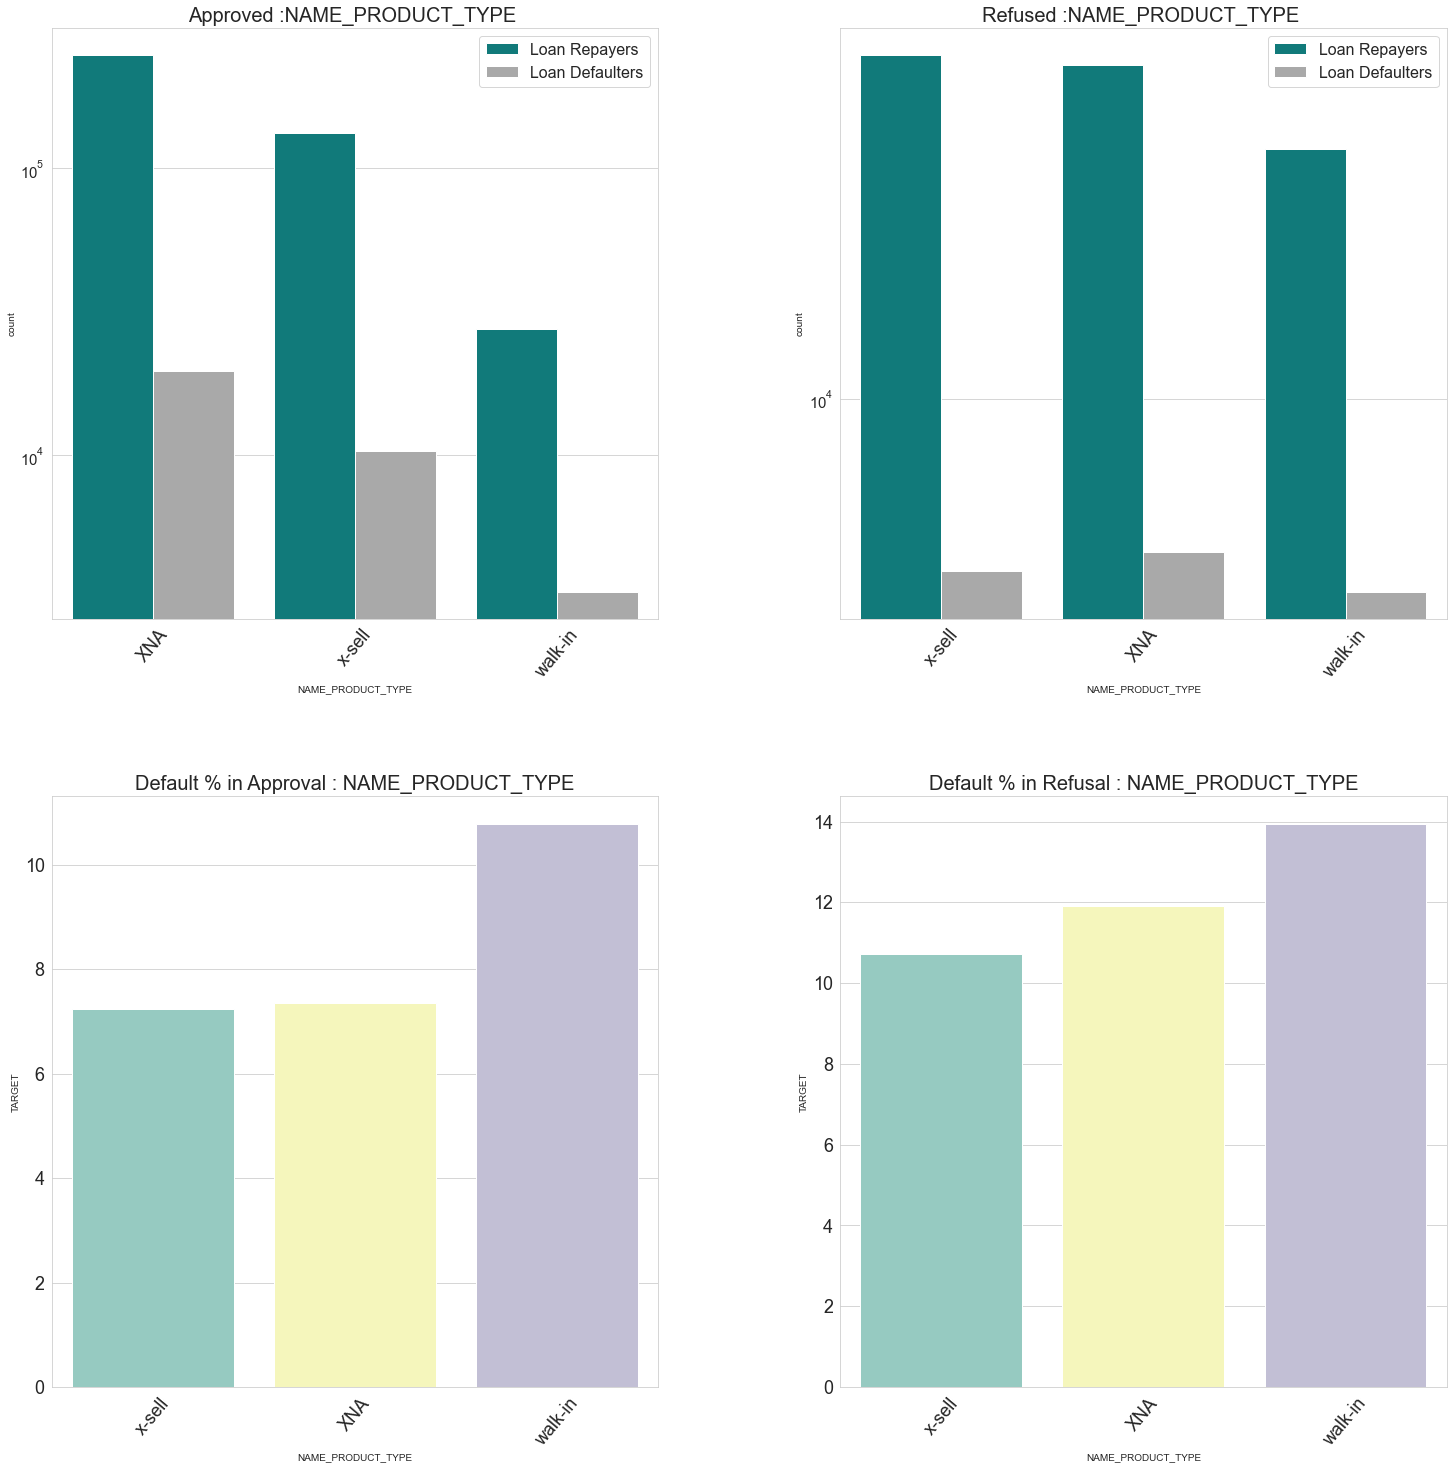

In [141]:
cat_1(x='NAME_PRODUCT_TYPE',hue='TARGET',scale='log',rot=50)

<font color='purple'>**Comment :**</font> Bank is approving loans more for the product type category X-sell and can be considered more to give out loans. Bank is actually refusing the loans to X- sell more than walk-ins and it can be seen form the graphs that walk-ins are more prone to default than X-sell.

**NAME_CASH_LOAN_PURPOSE**

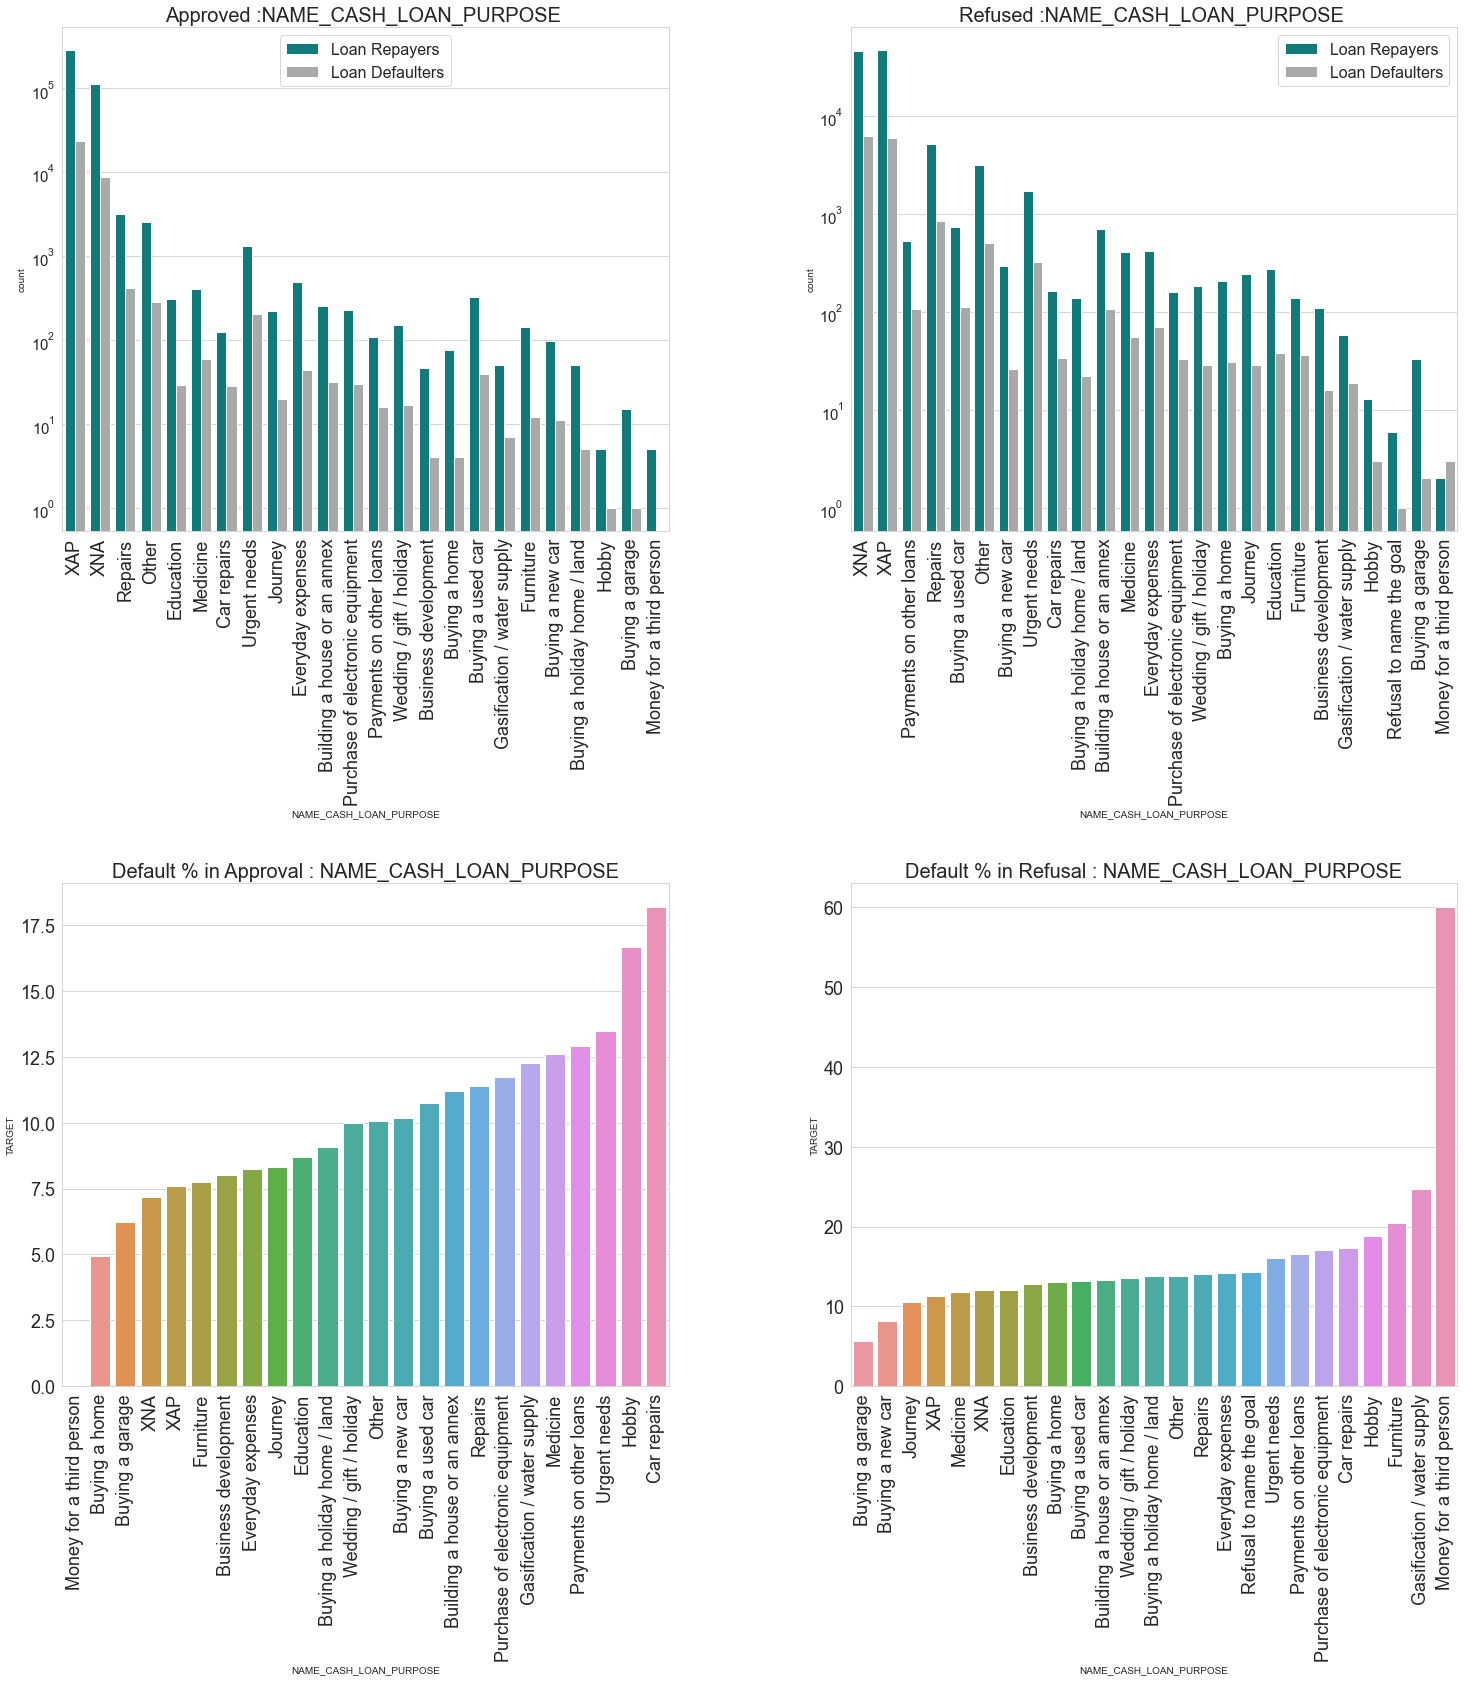

In [142]:
cat_1(x='NAME_CASH_LOAN_PURPOSE',hue='TARGET',scale='log',hspc=0.7)

<font color='purple'>**Comment :**</font> Categories like repairs, other, urgent needs, buying a used car are getting more approvals from the bank, out of which urgent needs is most at default. Bank is approving the loans for a particular category Money for a third person which a very risky driving factor for the bank to give out loans on. Bank is on the other hand has refused to give the loans for the Money for a third person which is the correct step taken by the bank but on the other hand bank is also refusing the categories which may turn out to be beneficial for the bank itself, those categories are - Buying a new car/used car, garage, home or a holiday home/ land.

**NAME_CONTRACT_TYPE**

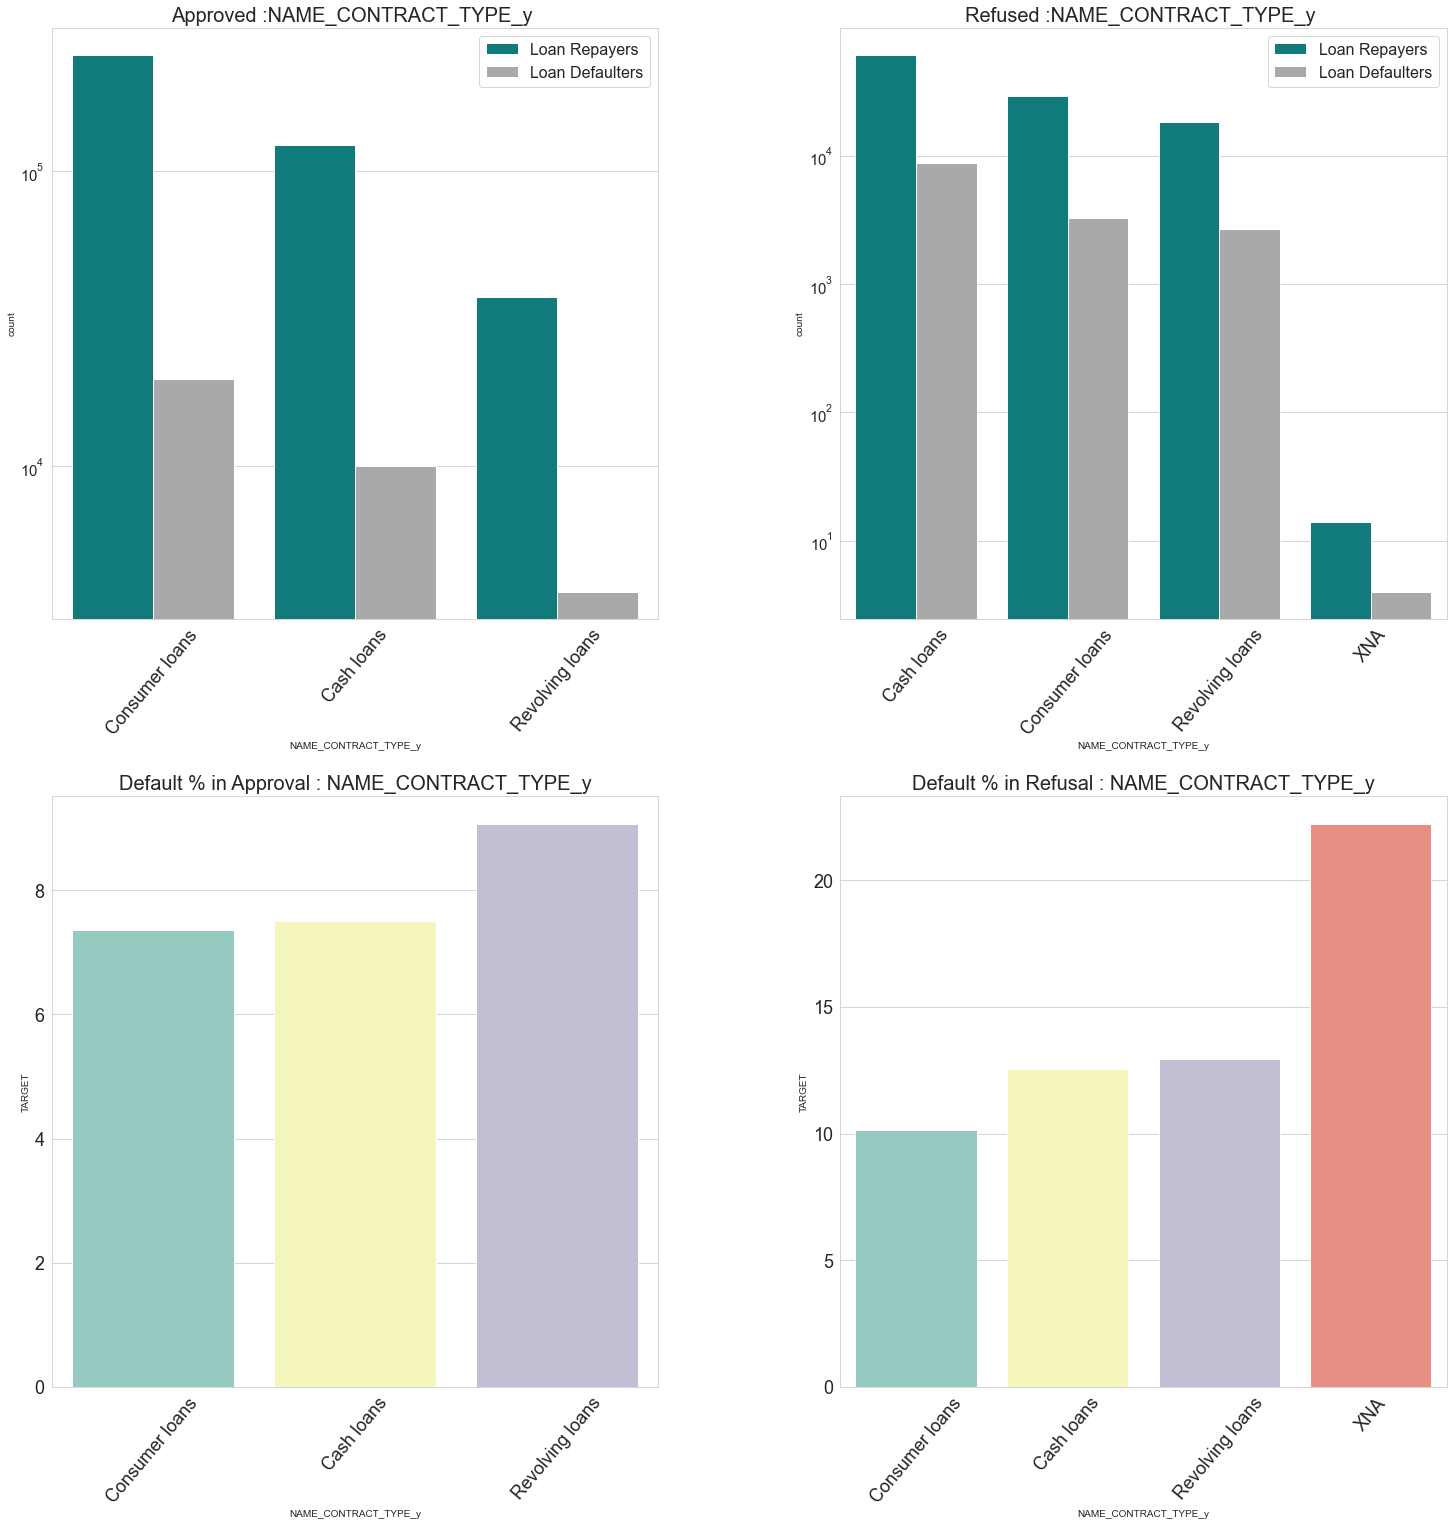

In [143]:
cat_1(x='NAME_CONTRACT_TYPE_y',hue='TARGET',scale='log',rot=50)

<font color='purple'>**Comment :**</font> Bank is approving loans more in general for consumer loans and refusing the loans more oftenly for the cash loans. From the above graphs, it is clearly visible that revolving loans should be considered less for the approval whereas consumer loans / cash loans can be considered more oftenly for the loans.

In [144]:
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100004       0      Revolving loans           M            Y   
4      100006       0           Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               Y             0           67500.0      135000.0   
4               Y             0          135000.0      312682.5   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3         6750.0           135000.0     Unaccompanied          Working   
4        29686.5           297000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.003541       16765           1188               1186   
3                    0.010032       19046            225               4260   
4                    0.008019       19005           3039               9833   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2              291      Core staff              2.0                     1   
3             2531        Laborers              1.0                     2   
4             2437        Laborers              2.0                     2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                          9   
4                    WEDNESDAY                         17   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                         2                         2   
1                  School                         1                         0   
2                  School                         1                         0   
3              Government                         0                         0   
4  Business Entity Type 3                         2                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         1                         0   
3                         0                         0   
4                         2                         0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1         

In [145]:
# Funciton for numerical - categorical analysis

def cat_num_bivar_merged(x=None,y=None,hue=None,est=np.median,rot=90):
    plt.style.use('dark_background')
    
    fig = plt.figure(figsize=(30,13))
    plt.subplots_adjust(wspace=0.3)
    
    plt.subplot(1,3,1)
    first = sns.barplot(data=df1,x=x,y=y,hue=hue,palette='Set3',estimator=est)
    first.set_title(f'Approval : {x} vs {y}',fontsize=18)
    plt.setp(first.xaxis.get_majorticklabels(),rotation=rot,fontsize=25)
    plt.setp(first.yaxis.get_majorticklabels(),fontsize=18)
    

    plt.subplot(1,3,2)
    sec = sns.barplot(data=df2,x=x,y=y,hue=hue,palette='Set3',estimator=est)
    sec.set_title(f'Refusal : {x} vs {y}',fontsize=18)
    plt.setp(sec.xaxis.get_majorticklabels(),rotation=rot,fontsize=25)
    plt.setp(sec.yaxis.get_majorticklabels(),fontsize=18)
    
    plt.subplot(1,3,3)
    third = sns.barplot(data=df3,x=x,y=y,hue=hue,palette='Set3',estimator=est)
    third.set_title(f'Cancelled : {x} vs {y}',fontsize=18)
    plt.setp(third.xaxis.get_majorticklabels(),rotation=rot,fontsize=25)
    plt.setp(third.yaxis.get_majorticklabels(),fontsize=18) 
    
    plt.show()
    return None

**NAME_PRODUCT_TYPE vs AMT_GOODS_PRICE_y**

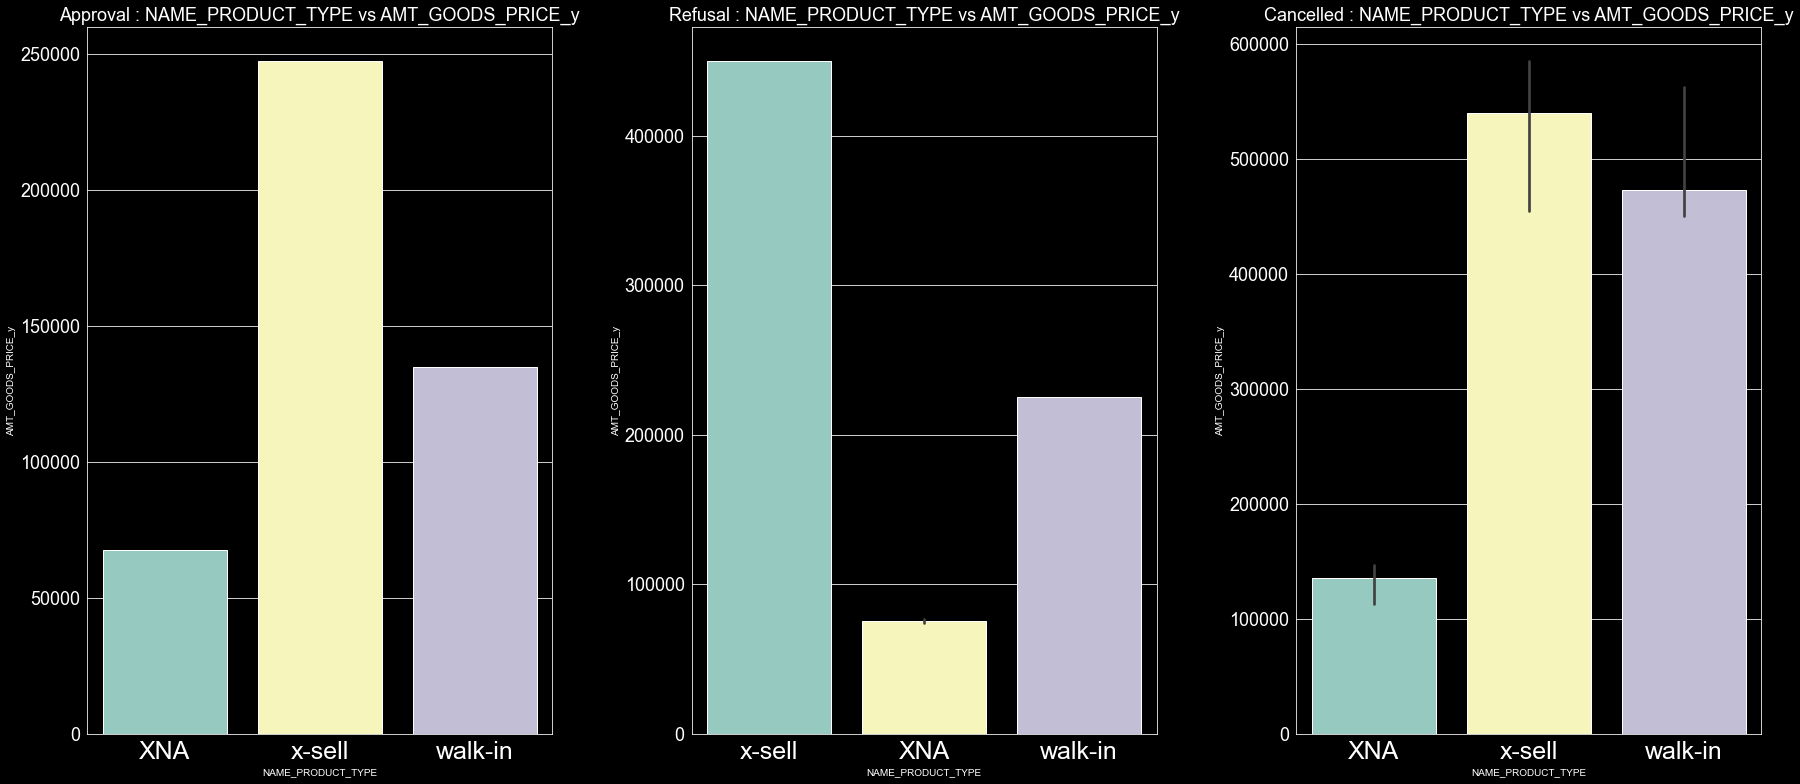

In [146]:
cat_num_bivar_merged(x='NAME_PRODUCT_TYPE',y='AMT_GOODS_PRICE_y',rot=0)

<font color='purple'>**Comment :**</font> Banks are giving most approvals to X-sell type goods on the basis of price but it can be seen from the refusal section that X-sell is getting more rejections as the clients are not able to cope up with the price which is the strong reason. Hence, that is why clients are mostly cancelling their applications of the loan due to this reason as it can be seen graphically, the of most rejections from the clients are for the higher priced goods. Lastly, a driving solution is to lower the goods price from the seller's side.

**NAME_SELLER_INDUSTRY vs AMT_GOODS_PRICE_y**

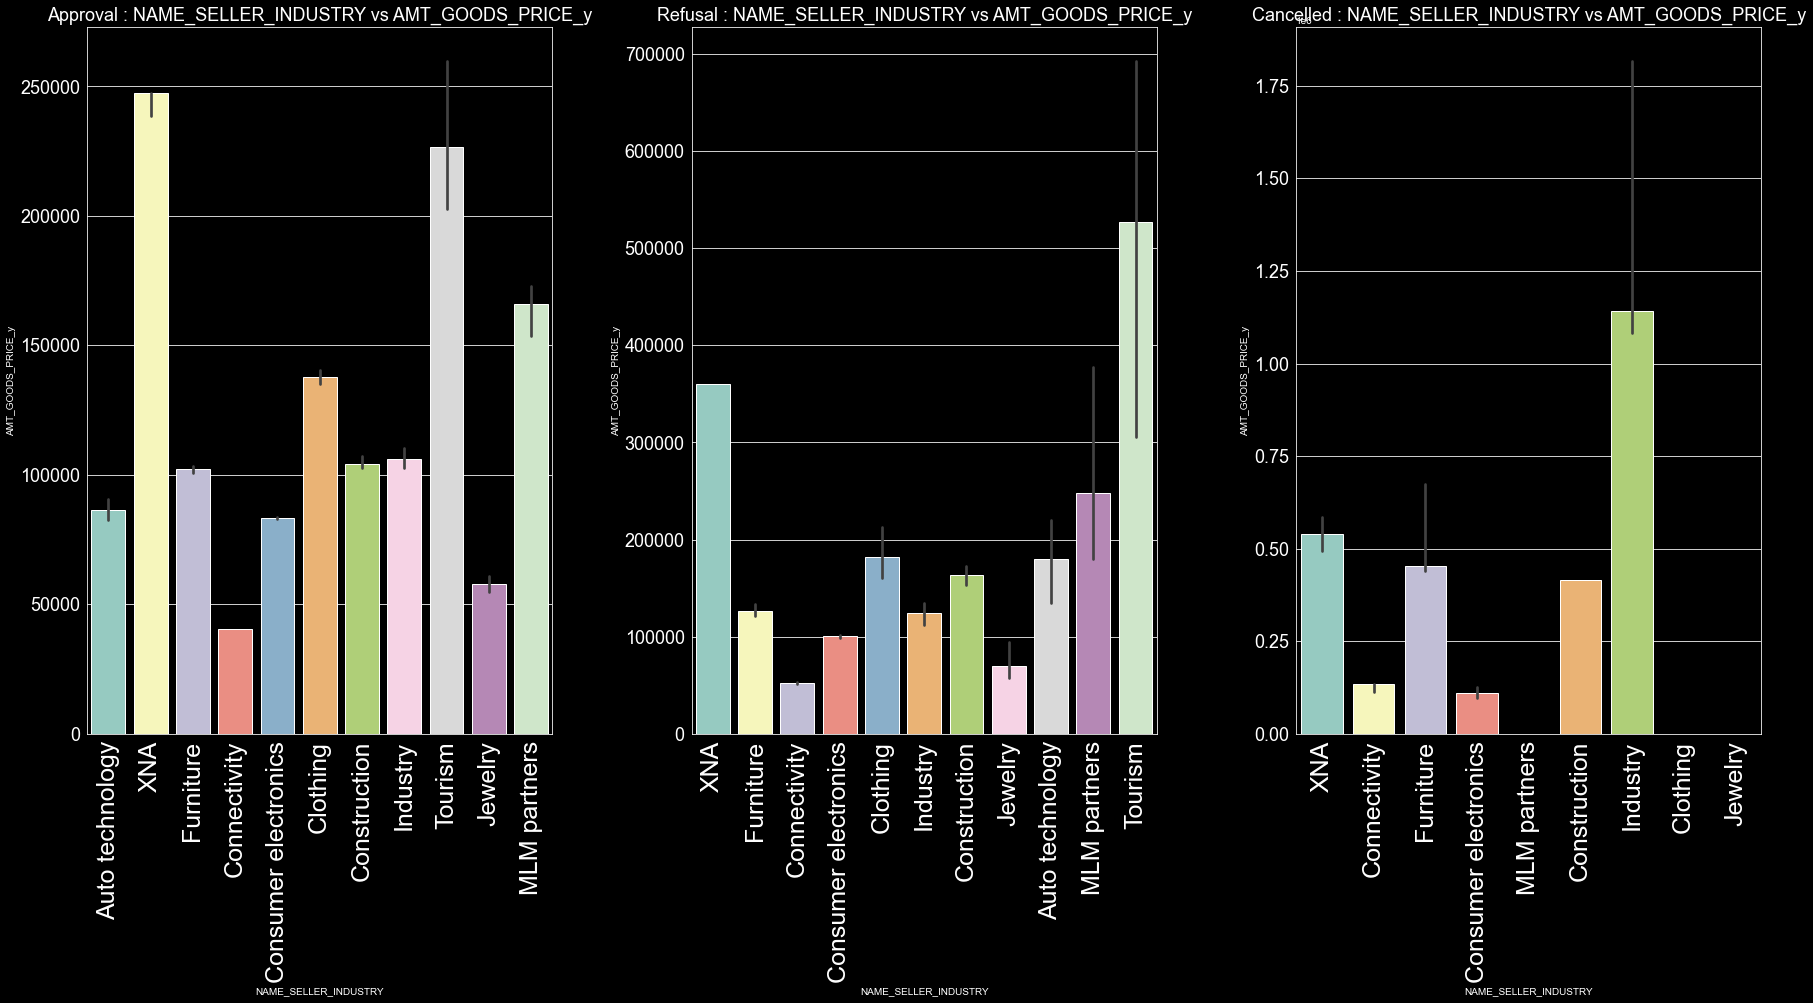

In [147]:
cat_num_bivar_merged(x='NAME_SELLER_INDUSTRY',y='AMT_GOODS_PRICE_y',rot=90)

<font color='purple'>**Comment :**</font> For 'XNA' we will ignore the observation as they are missing values or Unknowns.
From the above plots, it can be seen that tourism is getting the highest number of approvals followed by MLM partners from the bank. The loan applications for the tourism of many clients is rejected as they are not capable of repaying the loan due to the high package prices most probably. So, the tourism industry should lower the prices so that more clients can be provided with loans and so the bank/industry can make profits.

**PRODUCT_COMBINATION vs AMT_GOODS_PRICE_y**

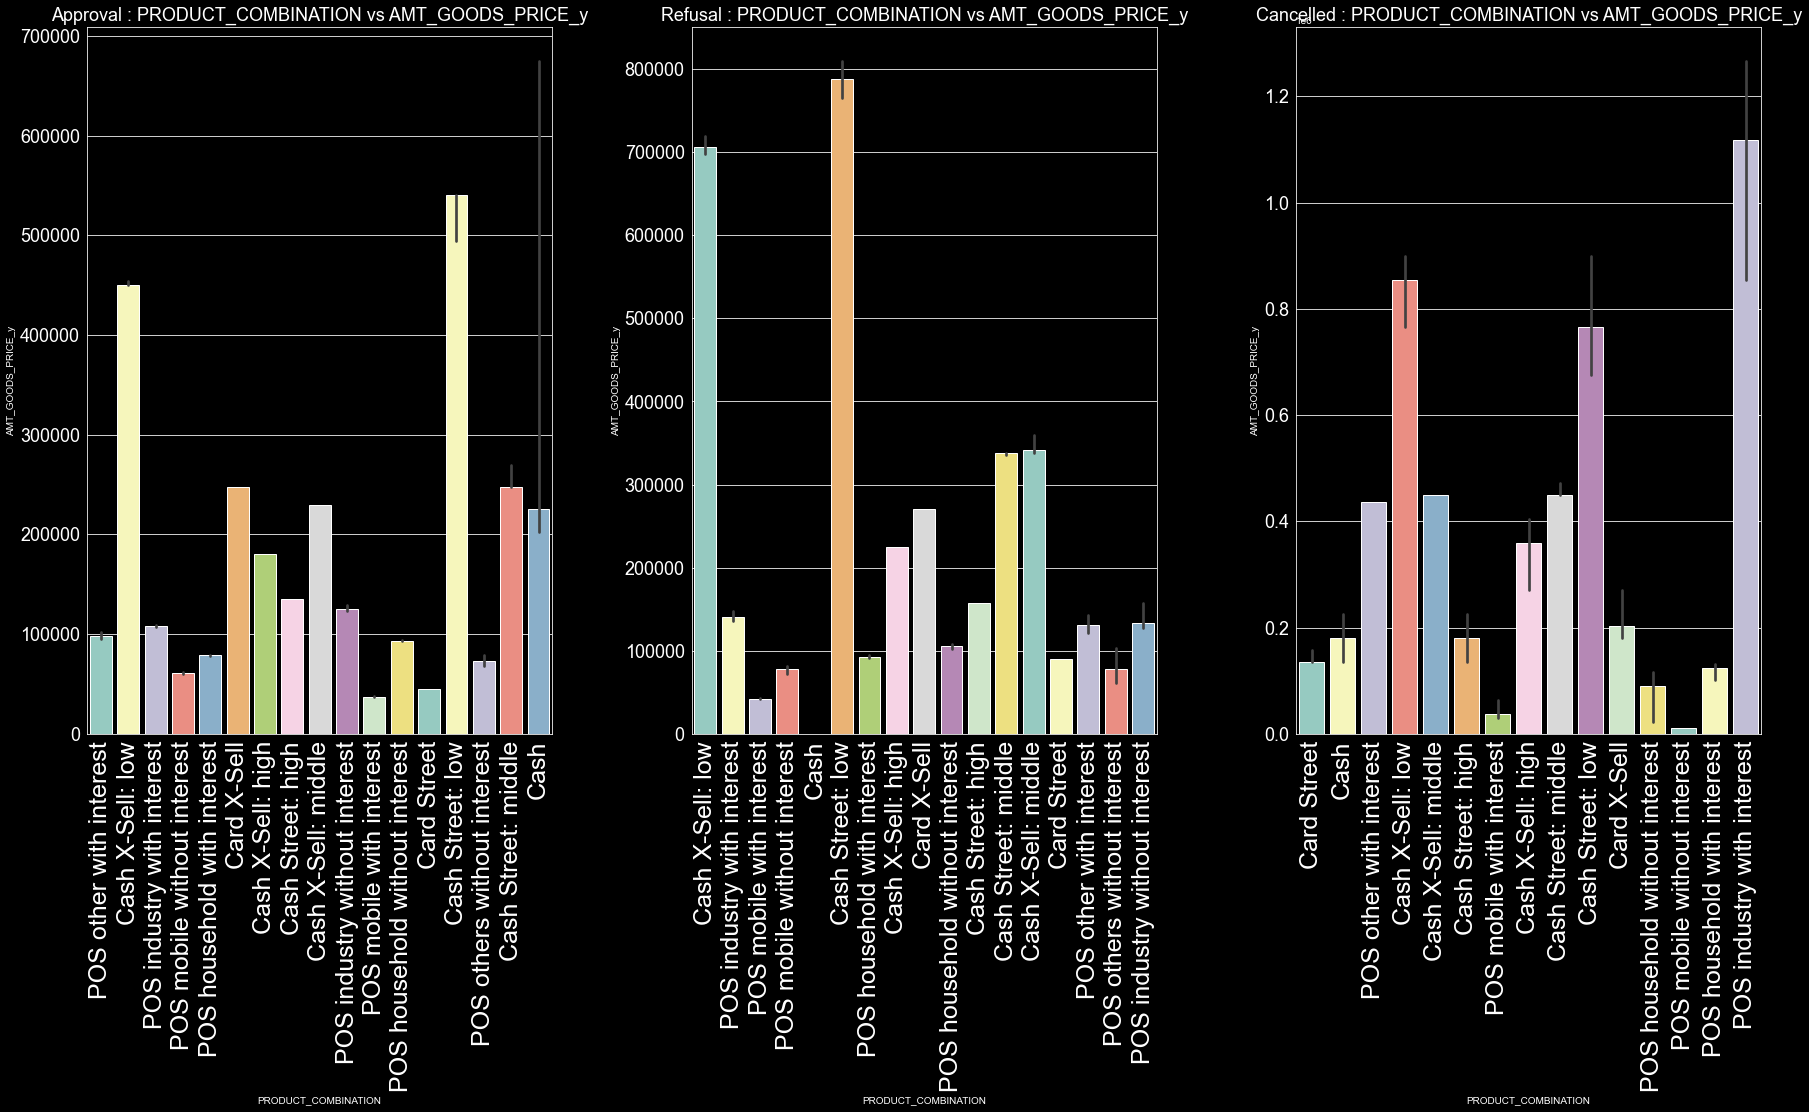

In [148]:
cat_num_bivar_merged(x='PRODUCT_COMBINATION',y='AMT_GOODS_PRICE_y',rot=90)

<font color='purple'>**Comment :**</font> The categories like cash street: low and cash X-sell: low have the highest price and it can be clearly seen from the graph that banks are giving approvals for those clients that can take the loans but on the refusal side these two are getting mostly refused due to the very high prices as clients are finding difficult to repay the loans on such ammount due to which bank is facing a loss of interest from the clients so bringing down the rates of the combined goods can help the bank to get more approvals on client loan applications. Lastly, POS industry with interest category is also getting cancellations from the client's side as the price of the goods are very much higher as compared to others so clients might have received worst pricing from the sellers which is why they are cancelling their loan applications. However, lowering the price can help getting the bank more approvals.

**NAME_GOODS_CATEGORY vs AMT_GOODS_PRICE_y**

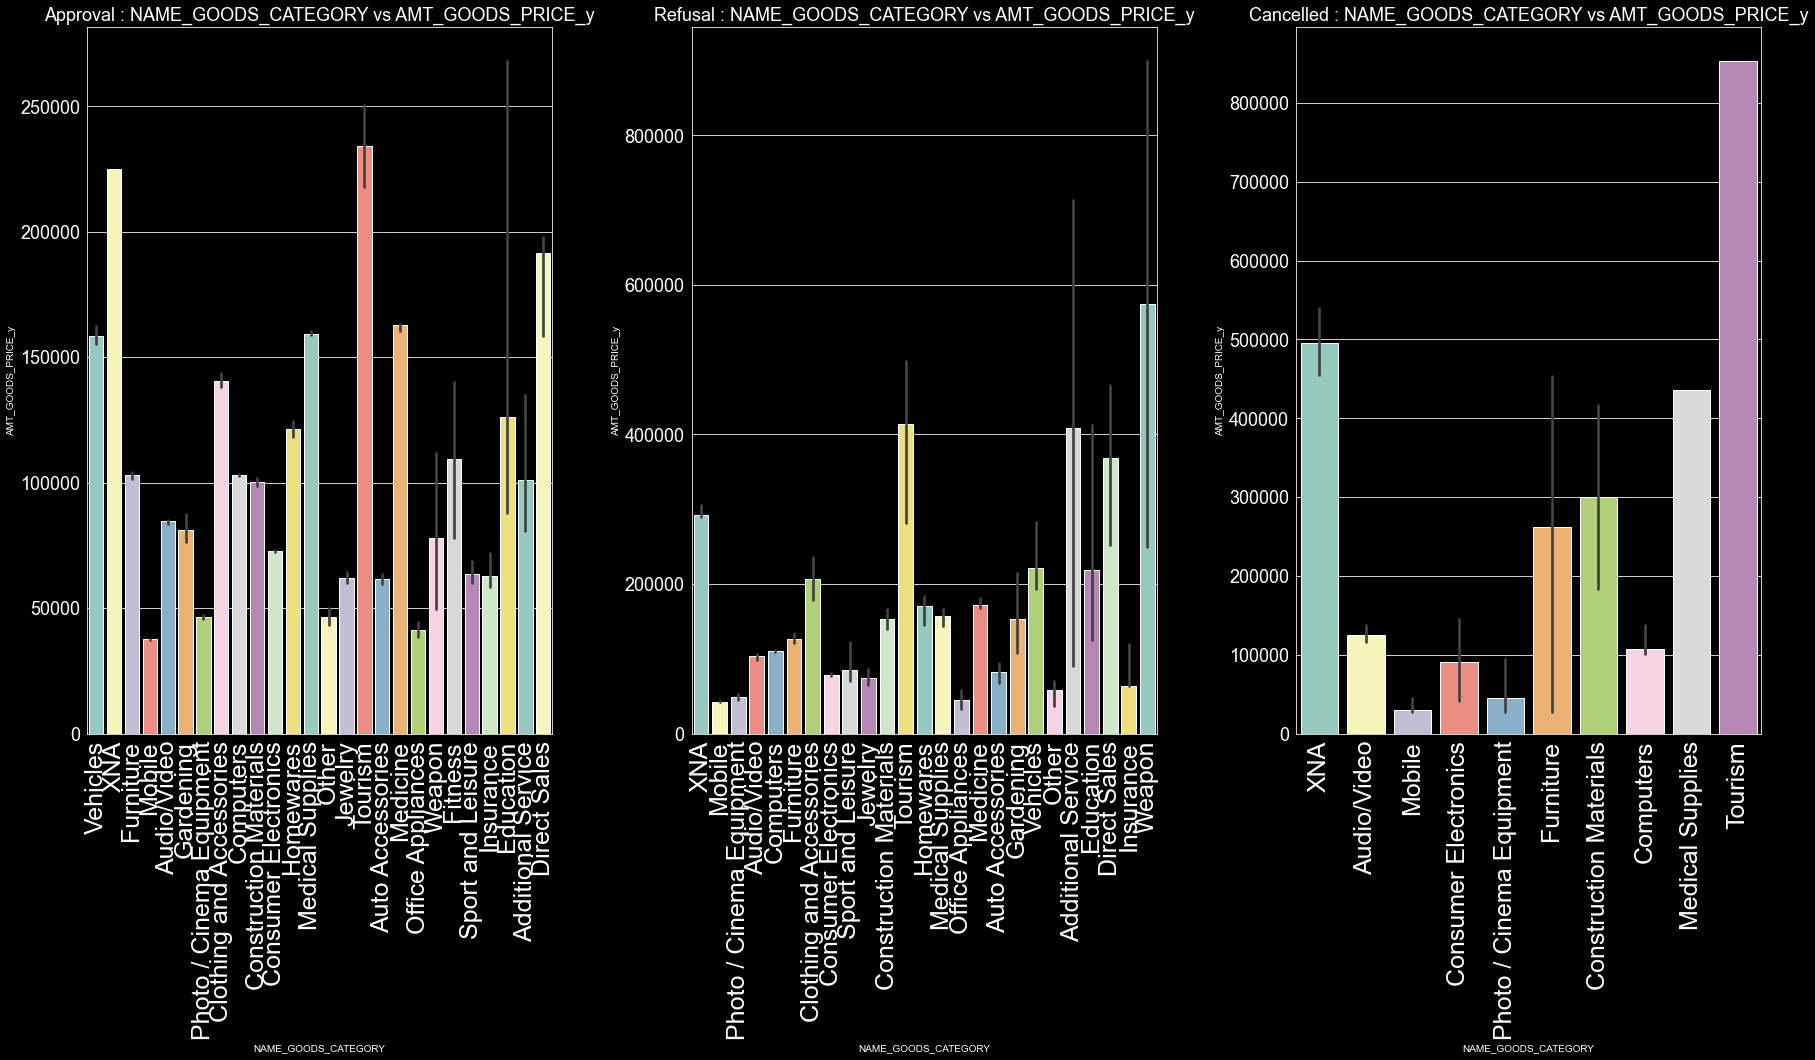

In [149]:
cat_num_bivar_merged(x='NAME_GOODS_CATEGORY',y='AMT_GOODS_PRICE_y',rot=90)

<font color='purple'>**Comment :**</font> The most of the approvals done by the bank are on the categories like vehicles, tourism, Medical supplies, direct sales, medicine. The most of the refusals by the bank are on the categories like weapon, Additional service, tourism, direct sales. The clients are taking their applications down most prabably down to the higher package prices for the tourism and other categories like medical supplies. So, lowering the prices can be a solution.

**NAME_CASH_LOAN_PURPOSE vs AMT_GOODS_PRICE_y**

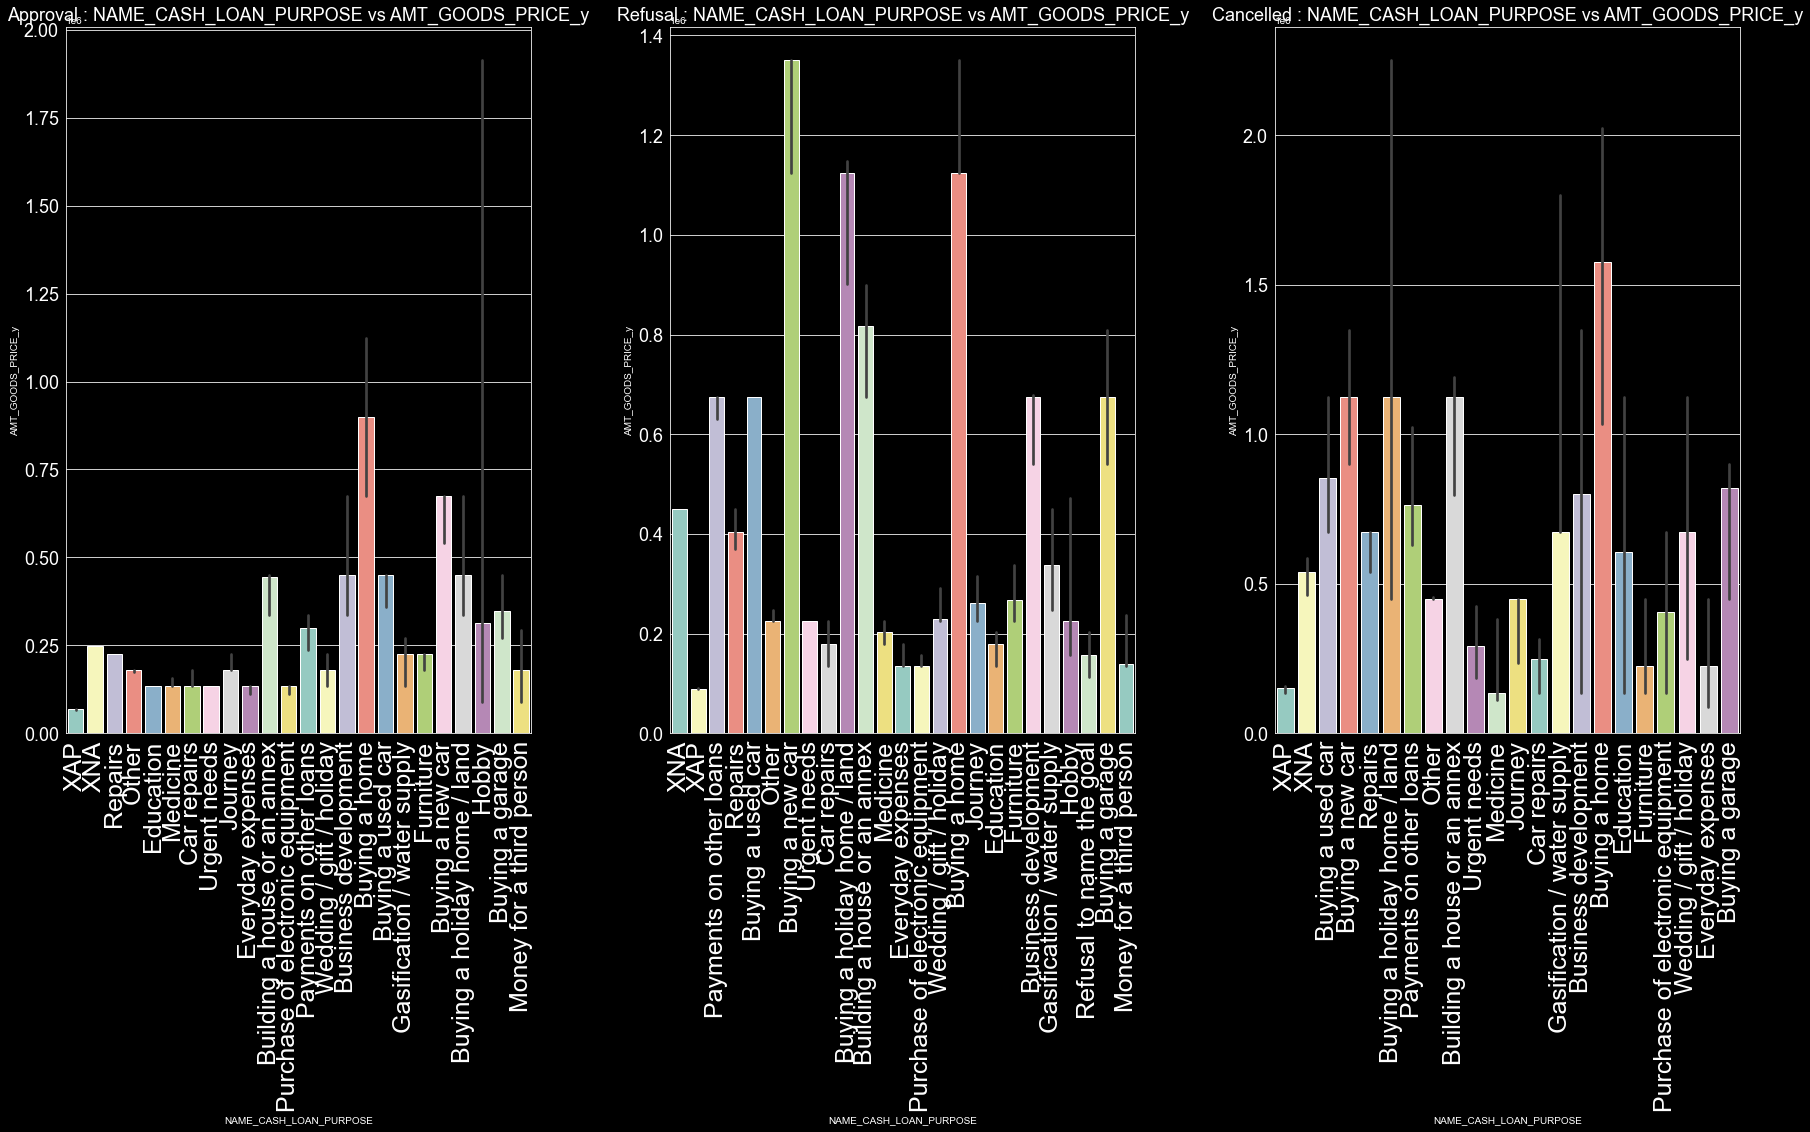

In [150]:
cat_num_bivar_merged(x='NAME_CASH_LOAN_PURPOSE',y='AMT_GOODS_PRICE_y',rot=90)

<font color='purple'>**Comment :**</font> The bank is approving loans for the clients who wants to buy a home or new car mostly and on the other hand the refusals are highest for the categories like buying a new car, buying a home and buying a holiday home or land. The applications cancelled by the clients are fot eh buying a home where the clients are most probably be losing the interest because high price possibility.

## <font color='purple'>6.2 Numerical Variables</font>

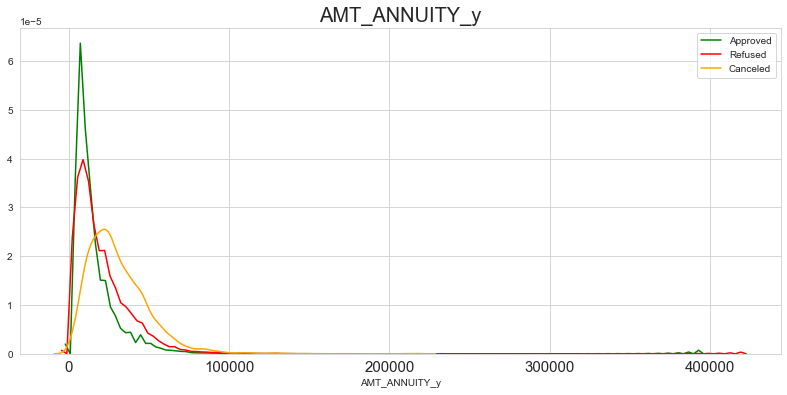

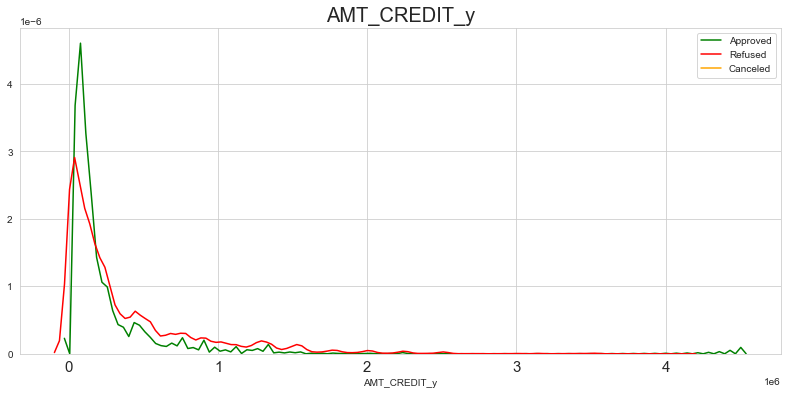

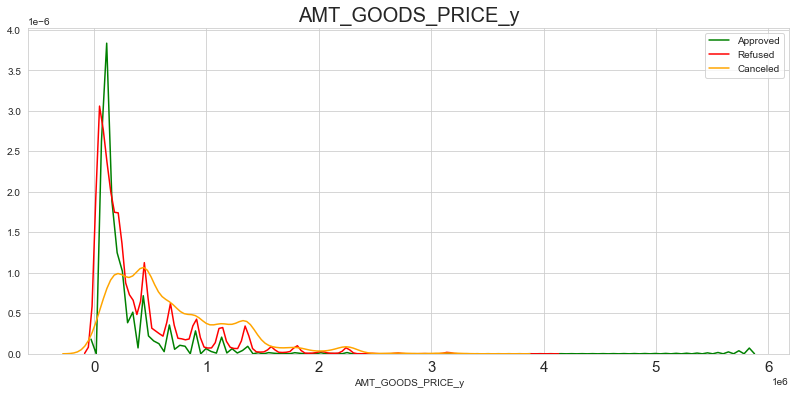

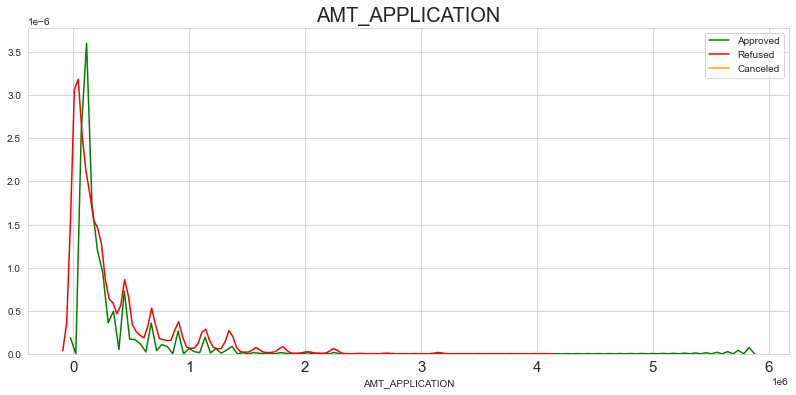

In [151]:
# Plotting the numeric variables 

list_cat = ['AMT_ANNUITY_y','AMT_CREDIT_y','AMT_GOODS_PRICE_y','AMT_APPLICATION']

def plots_numeric_univ_merged(l):
        sns.set_style('whitegrid')
    
        fig=plt.figure(figsize=(30,6))
        plt.subplot(1,2,1)
        ax=sns.distplot(df1[l],hist=False,label='Approved',color='green')
        ax=sns.distplot(df2[l],hist=False,label='Refused',color='red')
        ax=sns.distplot(df3[l],hist=False,label='Canceled',color='orange')
        plt.title(l,fontsize=20)
        plt.xticks(fontsize=15) 
        plt.show()
        return None
        
for i in list_cat:
    plots_numeric_univ_merged(i)

<font color='purple'>**Comment :**</font> 

> 1. Most of the approvals for the amount annuity variable are for the values less than 300000.

> 2. Clients with lower credit amounts are having much approvals than those facing refusals.

> 3. As the price amount of the goods increases there is an increase in loan applicaiton refusal.

> 4. Clients with application amount within 0 to 1M have most number of approvals.

In [152]:
ord1= ['Approved','Refused','Canceled','Unused offer']

def plots_numeric_biv_merged(x,y,order=None):
    
    fig=plt.figure(figsize=(20,10))
    
    plt.subplot(1,2,1)
    
    sns.scatterplot(data=merged_df, y = y, x = x,hue='NAME_CONTRACT_STATUS',palette=['g','r','yellow','white'],hue_order=order)
    
    plt.title(f'{x} vs {y}',fontsize=20)
    
    plt.xticks(fontsize=18)
    
    plt.yticks(fontsize=18)
    
    plt.show()
    
    return None

**AMT_ANNUITY_y vs AMT_CREDIT_y**

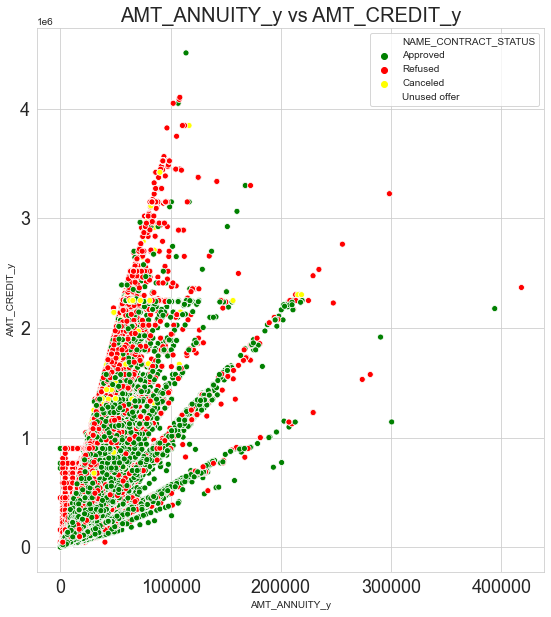

In [153]:
plots_numeric_biv_merged('AMT_ANNUITY_y','AMT_CREDIT_y',order=ord1)

<font color='purple'>**Comment :**</font> AMT_ANNUITY_y and AMT_CREDIT_y have a correlation but not a strong one, most of the loan refusals are less than the amount annuity of 100000.

**AMT_GOODS_PRICE_y vs AMT_CREDIT_y**

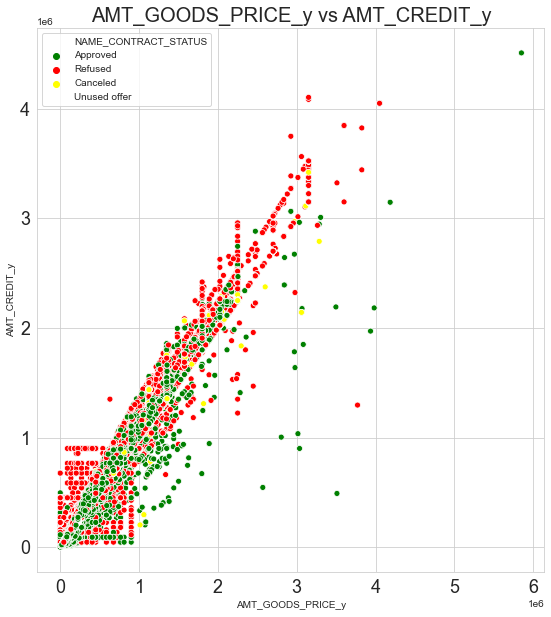

In [154]:
plots_numeric_biv_merged('AMT_GOODS_PRICE_y','AMT_CREDIT_y',order=ord1)

<font color='purple'>**Comment :**</font> The correlation is strong between amount goods and amount credit continous variables and the distribution seems to be nearly equal for approval and refusal of loans. For the cancelled applications, it is more sparsely distributed for higher goods price.

**AMT_ANNUITY_y vs AMT_GOODS_PRICE_y**

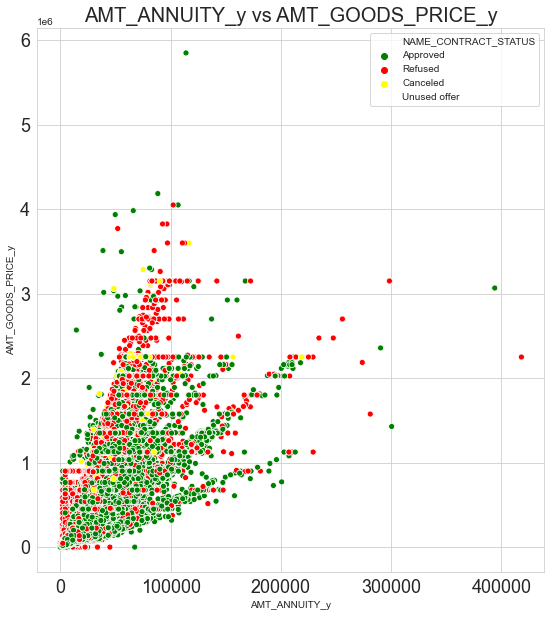

In [155]:
plots_numeric_biv_merged('AMT_ANNUITY_y','AMT_GOODS_PRICE_y',order=ord1)

<font color='purple'>**Comment :**</font> The correlation between AMT_ANNUITY_y and AMT_GOODS_PRICE_y is weak and it can be seen for higher goods price and amount annuity between 0 - 100000 there are highest number of refusals.

**AMT_GOODS_PRICE_y vs AMT_APPLICATION**

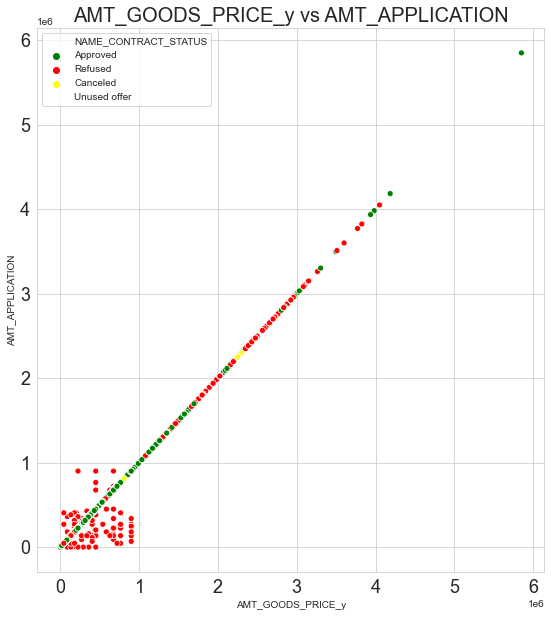

In [156]:
plots_numeric_biv_merged('AMT_GOODS_PRICE_y','AMT_APPLICATION',order=ord1)

<font color='purple'>**Comment :**</font> There is a pretty strong correlation between Goods Price and application. As the goods price amount increases, application amount increases linearly and the distribution of refusal loans seems to increase.

In [157]:
(merged_df.groupby('NAME_CONTRACT_STATUS')['TARGET'].value_counts(normalize=True)*100)

NAME_CONTRACT_STATUS  TARGET
Approved              0         92.440362
                      1          7.559638
Canceled              0         90.853316
                      1          9.146684
Refused               0         88.002048
                      1         11.997952
Unused offer          0         91.367354
                      1          8.632646
Name: TARGET, dtype: float64

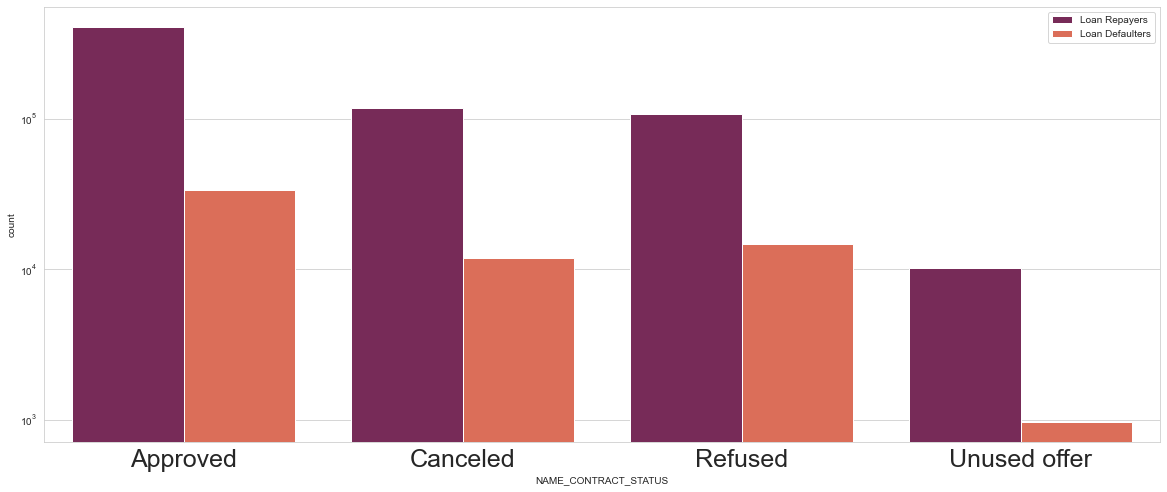

In [158]:
fig = plt.figure(figsize=(20,8))
sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET',palette='rocket')
plt.legend(['Loan Repayers','Loan Defaulters'])
plt.yscale('log')
plt.xticks(fontsize=25)
plt.show()

<font color='purple'>**Comment :**</font>

> 1. Bank has approved the loan for approx 92% clients who can actually repay the loans without any trouble. On the other hand banks are approving loans for the clients who are most likely to default and their percentage is 7.6%.

> 2. The clients are cancelling the applications from their side as they might be losing interest in taking the loan from the bank because of high price issues with the products as most of them are actually capable to pay the loans without any issue, hence dropping the product prices can attract more clients into loans.

> 3. Bank is actually refusing the loans of those clients who can repay their loans easily without any issues and this percentage is 88%. So, bank needs to focus more on the clients like them.

## 7. Conclusion
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. We aim to understand the driving factors behind loan defaults for different types of applicants.

Analysis was conducted on the prospective clients based on the their current as well as previous application data. Recommendations and insights were provided for the same.